## Temat : Analiza podobieństw między państwami na podstawie danych ekonomicznych i socjologicznych Banku Światowego
## Autorzy: Agata Dratwa, Majka Miezianko, Szczepan Polak

# Przygotowanie danych

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbgapi as wb
from sklearn.manifold import TSNE
from dtaidistance import dtw
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
pd.set_option('display.max_columns', None)

In [4]:
# listy ze wskaźnikami

# wskaźniki skróty
all_indicators = ['BX.KLT.DINV.CD.WD', 'NV.IND.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'NV.AGR.TOTL.ZS', 'NY.GDP.PCAP.CD', 'SP.ADO.TFRT', 'SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN', 'SP.DYN.TFRT.IN', 'SP.DYN.LE00.FE.IN', 'SP.DYN.LE00.IN', 'SP.DYN.LE00.MA.IN', 'SH.IMM.IDPT', 'SH.IMM.MEAS', 'SH.DYN.NMRT', 'SP.DYN.IMRT.IN', 'SH.DYN.MORT', 'SH.DYN.NMRT', 'SP.DYN.CDRT.IN', 'SP.DYN.TFRT.IN', 'SM.POP.NETM', 'SP.POP.0014.TO.ZS', 'SP.POP.65UP.TO.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.GROW', 'SP.URB.TOTL.IN.ZS', 'SP.URB.TOTL.IN.ZS', 'SP.URB.TOTL.IN.ZS', 'SP.POP.1564.TO.ZS', 'SP.POP.0014.TO.ZS', 'SP.POP.TOTL.FE.ZS']
economic_indicators = ['BX.KLT.DINV.CD.WD', 'NV.IND.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'NV.AGR.TOTL.ZS', 'NY.GDP.PCAP.CD']
health_indicators = ['SP.ADO.TFRT', 'SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN','SP.DYN.TFRT.IN', 'SP.DYN.LE00.FE.IN', 'SP.DYN.LE00.IN', 'SP.DYN.LE00.MA.IN', 'SH.IMM.IDPT', 'SH.IMM.MEAS', 'SH.DYN.NMRT', 'SP.DYN.IMRT.IN', 'SH.DYN.MORT', 'SH.DYN.NMRT']
sociodemographic_indicators = ['SP.DYN.CDRT.IN', 'SP.DYN.TFRT.IN', 'SM.POP.NETM', 'SP.POP.0014.TO.ZS', 'SP.POP.65UP.TO.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.GROW', 'SP.URB.TOTL.IN.ZS', 'SP.URB.TOTL.IN.ZS',  'SP.URB.TOTL.IN.ZS', 'SP.POP.1564.TO.ZS', 'SP.POP.0014.TO.ZS', 'SP.POP.TOTL.FE.ZS']

In [5]:
# lista krajów
all_countries = ['ALB', 'AGO', 'AUS', 'AUT', 'AZE', 'BHS', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BOL', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'TCD', 'CHL', 'CHN', 'COL', 'CRI', 'CIV', 'HRV', 'CYP', 'CZE', 'DNK', 'DMA', 'DOM', 'ECU', 'EGY', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KOR', 'KGZ', 'LAO', 'LVA', 'LTU', 'MWI', 'MYS', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR', 'NPL', 'NLD', 'NZL', 'NER', 'NGA', 'MKD', 'NOR', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'RWA', 'WSM', 'SAU', 'SEN', 'SYC', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'LKA', 'KNA', 'VCT', 'SDN', 'SUR', 'SWE', 'CHE', 'TZA', 'THA', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'UGA', 'UKR', 'GBR', 'USA', 'URY', 'VUT', 'VNM', 'PSE', 'ZMB']

all_countries_full_name = ['Albania', 'Angola', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China', 'Colombia', 'Congo, Dem. Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, Rep.', 'Kyrgyz Republic', 'Lao PDR', 'Latvia', 'Lithuania', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'Rwanda', 'Samoa', 'Saudi Arabia', 'Senegal', 'Seychelles', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'St. Kitts and Nevis', 'St. Vincent and the Grenadines', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Tanzania', 'Thailand', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkiye', 'Uganda', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay', 'Vanuatu', 'Vietnam', 'West Bank and Gaza', 'Zambia']

In [6]:
wb.series.info(economic_indicators)

id                 value
-----------------  ----------------------------------------------------------
NV.AGR.TOTL.ZS     Agriculture, forestry, and fishing, value added (% of GDP)
BX.KLT.DINV.CD.WD  Foreign direct investment, net inflows (BoP, current US$)
NY.GDP.PCAP.CD     GDP per capita (current US$)
NV.IND.TOTL.ZS     Industry (including construction), value added (% of GDP)
FP.CPI.TOTL.ZG     Inflation, consumer prices (annual %)
                   5 elements

In [7]:
wb.series.info(health_indicators)

id                 value
-----------------  -------------------------------------------------------------
SP.ADO.TFRT        Adolescent fertility rate (births per 1,000 women ages 15-19)
SP.DYN.CBRT.IN     Birth rate, crude (per 1,000 people)
SP.DYN.CDRT.IN     Death rate, crude (per 1,000 people)
SP.DYN.TFRT.IN     Fertility rate, total (births per woman)
SH.IMM.IDPT        Immunization, DPT (% of children ages 12-23 months)
SH.IMM.MEAS        Immunization, measles (% of children ages 12-23 months)
SP.DYN.LE00.FE.IN  Life expectancy at birth, female (years)
SP.DYN.LE00.MA.IN  Life expectancy at birth, male (years)
SP.DYN.LE00.IN     Life expectancy at birth, total (years)
SP.DYN.IMRT.IN     Mortality rate, infant (per 1,000 live births)
SH.DYN.NMRT        Mortality rate, neonatal (per 1,000 live births)
SH.DYN.MORT        Mortality rate, under-5 (per 1,000 live births)
                   12 elements

In [8]:
wb.series.info(sociodemographic_indicators)

id                 value
-----------------  ----------------------------------------------------
SP.DYN.CDRT.IN     Death rate, crude (per 1,000 people)
SP.DYN.TFRT.IN     Fertility rate, total (births per woman)
SM.POP.NETM        Net migration
SP.POP.0014.TO.ZS  Population ages 0-14 (% of total population)
SP.POP.1564.TO.ZS  Population ages 15-64 (% of total population)
SP.POP.65UP.TO.ZS  Population ages 65 and above (% of total population)
SP.POP.GROW        Population growth (annual %)
SP.POP.TOTL.FE.ZS  Population, female (% of total population)
SP.URB.TOTL.IN.ZS  Urban population (% of total population)
                   9 elements

In [9]:
df = wb.data.DataFrame(all_indicators, all_countries, time=range(1996,2021))
df

YR1996        YR1997        YR1998  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD  1.805590e+08  4.116600e+08  1.113970e+09   
        FP.CPI.TOTL.ZG     4.145106e+03  2.191767e+02  1.072848e+02   
        NV.AGR.TOTL.ZS     7.026869e+00  9.002018e+00  1.291118e+01   
        NV.IND.TOTL.ZS     6.782068e+01  6.075774e+01  5.515729e+01   
        NY.GDP.PCAP.CD     5.232749e+02  5.143099e+02  4.233935e+02   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  4.888049e+01  4.895944e+01  4.906152e+01   
        SP.POP.65UP.TO.ZS  2.451815e+00  2.399242e+00  2.344840e+00   
        SP.POP.GROW        2.478031e+00  2.563320e+00  2.586109e+00   
        SP.POP.TOTL.FE.ZS  5.192238e+01  5.192309e+01  5.191314e+01   
        SP.URB.TOTL.IN.ZS  3.663800e+01  3.617600e+01  3.571600e+01   

                                 YR1999        YR2000        YR2001  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD  2.471460e+09  8.786200e+08  2.145470e+09   
        FP.CPI.TOTL.ZG     2.481959e+02  3.249969e+02  1.525610e+02   
        NV.AGR.TOTL.ZS     6.290257e+00  5.664690e+00  8.156377e+00   
        NV.IND.TOTL.ZS     7.271737e+01  7.212295e+01  6.488381e+01   
        NY.GDP.PCAP.CD     3.876894e+02  5.568842e+02  5.274632e+02   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  4.917833e+01  4.935373e+01  4.962051e+01   
        SP.POP.65UP.TO.ZS  2.288775e+00  2.230042e+00  2.169317e+00   
        SP.POP.GROW        2.620055e+00  2.766606e+00  2.996056e+00   
        SP.POP.TOTL.FE.ZS  5.189251e+01  5.184808e+01  5.177003e+01   
        SP.URB.TOTL.IN.ZS  3.525800e+01  3.480200e+01  3.500200e+01   

                                 YR2002        YR2003        YR2004  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD  1.743504e+09  3.576972e+09  2.197228e+09   
        FP.CPI.TOTL.ZG     1.088974e+02  9.822414e+01  4.354211e+01   
        NV.AGR.TOTL.ZS     5.839550e+00  6.198385e+00  6.250878e+00   
        NV.IND.TOTL.ZS     5.607580e+01  5.311700e+01  5.462993e+01   
        NY.GDP.PCAP.CD     8.726578e+02  9.828056e+02  1.254696e+03   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  4.988455e+01  5.011573e+01  5.032987e+01   
        SP.POP.65UP.TO.ZS  2.111613e+00  2.057248e+00  2.004140e+00   
        SP.POP.GROW        3.056528e+00  3.089114e+00  3.178936e+00   
        SP.POP.TOTL.FE.ZS  5.168635e+01  5.160637e+01  5.152310e+01   
        SP.URB.TOTL.IN.ZS  3.547500e+01  3.595100e+01  3.643000e+01   

                                 YR2005        YR2006        YR2007  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD -1.303837e+09 -3.771486e+07 -8.933422e+08   
        FP.CPI.TOTL.ZG     2.295351e+01  1.330521e+01  1.225150e+01   
        NV.AGR.TOTL.ZS     5.060403e+00  5.191280e+00  5.242278e+00   
        NV.IND.TOTL.ZS     6.040199e+01  5.810933e+01  6.188354e+01   
        NY.GDP.PCAP.CD     1.900725e+03  2.597963e+03  3.121350e+03   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  5.053425e+01  5.074613e+01  5.096907e+01   
        SP.POP.65UP.TO.ZS  1.952054e+00  1.901969e+00  1.855436e+00   
        SP.POP.GROW        3.312670e+00  3.456237e+00  3.532921e+00   
        SP.POP.TOTL.FE.ZS  5.142859e+01  5.132306e+01  5.121521e+01   
        SP.URB.TOTL.IN.ZS  3.691100e+01  3.739500e+01  3.788100e+01   

                                 YR2008        YR2009        YR2010  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD  1.678971e+09  2.205298e+09 -3.227211e+09   
        FP.CPI.TOTL.ZG     1.247583e+01  1.373028e+01  1.446966e+01   
        NV.AGR.TOTL.ZS     4.805339e+00  6.621197e+00

In [10]:
# creating copy of a dataframe 
df_copy = df.copy()


## Uzupełnienie brakujących wartości

In [11]:
# sprawdzanie brakujących wartości dla każego roku
df.isnull().sum()

YR1996    7
YR1997    0
YR1998    0
YR1999    1
YR2000    0
YR2001    0
YR2002    0
YR2003    0
YR2004    0
YR2005    2
YR2006    0
YR2007    0
YR2008    0
YR2009    0
YR2010    0
YR2011    0
YR2012    0
YR2013    0
YR2014    0
YR2015    0
YR2016    0
YR2017    0
YR2018    1
YR2019    5
YR2020    8
dtype: int64

In [12]:
# sprawdzanie ręczne krajów
df[df.isna().sum(axis=1) > 2]

YR1996     YR1997     YR1998     YR1999     YR2000  \
economy series                                                               
CAN     NV.AGR.TOTL.ZS     NaN   2.139498   2.167374   2.196213   2.091653   
        NV.IND.TOTL.ZS     NaN  27.716439  26.833869  27.871739  29.500038   

                           YR2001     YR2002     YR2003     YR2004     YR2005  \
economy series                                                                  
CAN     NV.AGR.TOTL.ZS   2.117891   1.987623   2.053091   2.167813   1.880311   
        NV.IND.TOTL.ZS  28.447535  27.573141  27.907410  28.391120  29.212992   

                           YR2006     YR2007     YR2008     YR2009     YR2010  \
economy series                                                                  
CAN     NV.AGR.TOTL.ZS   1.701018   1.587161   1.768274   1.549893   1.493236   
        NV.IND.TOTL.ZS  28.847554  28.685902  29.342020  25.076018  26.351133   

                           YR2011     YR2012     YR2013     YR2014     YR2015  \
economy series                                                                  
CAN     NV.AGR.TOTL.ZS   1.765664   1.811346   1.894232   1.586548   1.869836   
        NV.IND.TOTL.ZS  27.139341  26.634669  26.613235  27.137942  24.415683   

                           YR2016     YR2017     YR2018  YR2019  YR2020  
economy series                                                           
CAN     NV.AGR.TOTL.ZS   1.862226   1.889995   1.699892     NaN     NaN  
        NV.IND.TOTL.ZS  23.295301  24.027803  24.622306     NaN     NaN

In [13]:
df_filtered = df
df_filtered

YR1996        YR1997        YR1998  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD  1.805590e+08  4.116600e+08  1.113970e+09   
        FP.CPI.TOTL.ZG     4.145106e+03  2.191767e+02  1.072848e+02   
        NV.AGR.TOTL.ZS     7.026869e+00  9.002018e+00  1.291118e+01   
        NV.IND.TOTL.ZS     6.782068e+01  6.075774e+01  5.515729e+01   
        NY.GDP.PCAP.CD     5.232749e+02  5.143099e+02  4.233935e+02   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  4.888049e+01  4.895944e+01  4.906152e+01   
        SP.POP.65UP.TO.ZS  2.451815e+00  2.399242e+00  2.344840e+00   
        SP.POP.GROW        2.478031e+00  2.563320e+00  2.586109e+00   
        SP.POP.TOTL.FE.ZS  5.192238e+01  5.192309e+01  5.191314e+01   
        SP.URB.TOTL.IN.ZS  3.663800e+01  3.617600e+01  3.571600e+01   

                                 YR1999        YR2000        YR2001  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD  2.471460e+09  8.786200e+08  2.145470e+09   
        FP.CPI.TOTL.ZG     2.481959e+02  3.249969e+02  1.525610e+02   
        NV.AGR.TOTL.ZS     6.290257e+00  5.664690e+00  8.156377e+00   
        NV.IND.TOTL.ZS     7.271737e+01  7.212295e+01  6.488381e+01   
        NY.GDP.PCAP.CD     3.876894e+02  5.568842e+02  5.274632e+02   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  4.917833e+01  4.935373e+01  4.962051e+01   
        SP.POP.65UP.TO.ZS  2.288775e+00  2.230042e+00  2.169317e+00   
        SP.POP.GROW        2.620055e+00  2.766606e+00  2.996056e+00   
        SP.POP.TOTL.FE.ZS  5.189251e+01  5.184808e+01  5.177003e+01   
        SP.URB.TOTL.IN.ZS  3.525800e+01  3.480200e+01  3.500200e+01   

                                 YR2002        YR2003        YR2004  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD  1.743504e+09  3.576972e+09  2.197228e+09   
        FP.CPI.TOTL.ZG     1.088974e+02  9.822414e+01  4.354211e+01   
        NV.AGR.TOTL.ZS     5.839550e+00  6.198385e+00  6.250878e+00   
        NV.IND.TOTL.ZS     5.607580e+01  5.311700e+01  5.462993e+01   
        NY.GDP.PCAP.CD     8.726578e+02  9.828056e+02  1.254696e+03   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  4.988455e+01  5.011573e+01  5.032987e+01   
        SP.POP.65UP.TO.ZS  2.111613e+00  2.057248e+00  2.004140e+00   
        SP.POP.GROW        3.056528e+00  3.089114e+00  3.178936e+00   
        SP.POP.TOTL.FE.ZS  5.168635e+01  5.160637e+01  5.152310e+01   
        SP.URB.TOTL.IN.ZS  3.547500e+01  3.595100e+01  3.643000e+01   

                                 YR2005        YR2006        YR2007  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD -1.303837e+09 -3.771486e+07 -8.933422e+08   
        FP.CPI.TOTL.ZG     2.295351e+01  1.330521e+01  1.225150e+01   
        NV.AGR.TOTL.ZS     5.060403e+00  5.191280e+00  5.242278e+00   
        NV.IND.TOTL.ZS     6.040199e+01  5.810933e+01  6.188354e+01   
        NY.GDP.PCAP.CD     1.900725e+03  2.597963e+03  3.121350e+03   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  5.053425e+01  5.074613e+01  5.096907e+01   
        SP.POP.65UP.TO.ZS  1.952054e+00  1.901969e+00  1.855436e+00   
        SP.POP.GROW        3.312670e+00  3.456237e+00  3.532921e+00   
        SP.POP.TOTL.FE.ZS  5.142859e+01  5.132306e+01  5.121521e+01   
        SP.URB.TOTL.IN.ZS  3.691100e+01  3.739500e+01  3.788100e+01   

                                 YR2008        YR2009        YR2010  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD  1.678971e+09  2.205298e+09 -3.227211e+09   
        FP.CPI.TOTL.ZG     1.247583e+01  1.373028e+01  1.446966e+01   
        NV.AGR.TOTL.ZS     4.805339e+00  6.621197e+00

In [14]:
df_filtered[df_filtered.isna().sum(axis=1) > 1]

YR1996     YR1997     YR1998     YR1999     YR2000  \
economy series                                                                  
CAN     NV.AGR.TOTL.ZS        NaN   2.139498   2.167374   2.196213   2.091653   
        NV.IND.TOTL.ZS        NaN  27.716439  26.833869  27.871739  29.500038   
SUR     FP.CPI.TOTL.ZG  -0.701887   7.145112  18.975369  98.773091  59.401687   
VUT     NV.AGR.TOTL.ZS  16.510274  15.709043  26.098006  24.846067  22.964130   
        NV.IND.TOTL.ZS   9.934932   8.507878   8.174126   8.322493  11.222991   

                           YR2001     YR2002     YR2003     YR2004     YR2005  \
economy series                                                                  
CAN     NV.AGR.TOTL.ZS   2.117891   1.987623   2.053091   2.167813   1.880311   
        NV.IND.TOTL.ZS  28.447535  27.573141  27.907410  28.391120  29.212992   
SUR     FP.CPI.TOTL.ZG  38.586288  15.527399  23.002232   9.986325   9.898005   
VUT     NV.AGR.TOTL.ZS  23.529883  24.266134  22.828887  23.598755  22.274497   
        NV.IND.TOTL.ZS   9.047492   8.951386   8.189980   7.597481   7.847409   

                           YR2006     YR2007     YR2008     YR2009     YR2010  \
economy series                                                                  
CAN     NV.AGR.TOTL.ZS   1.701018   1.587161   1.768274   1.549893   1.493236   
        NV.IND.TOTL.ZS  28.847554  28.685902  29.342020  25.076018  26.351133   
SUR     FP.CPI.TOTL.ZG  11.281304   6.426279  14.667143  -0.133637   6.941082   
VUT     NV.AGR.TOTL.ZS  20.984962  20.959205  20.014032  19.390739  19.542741   
        NV.IND.TOTL.ZS   8.094876   7.949261   9.109133  11.195599  12.873100   

                           YR2011     YR2012     YR2013     YR2014     YR2015  \
economy series                                                                  
CAN     NV.AGR.TOTL.ZS   1.765664   1.811346   1.894232   1.586548   1.869836   
        NV.IND.TOTL.ZS  27.139341  26.634669  26.613235  27.137942  24.415683   
SUR     FP.CPI.TOTL.ZG  17.711780   5.006863   1.923436   3.383413   6.893904   
VUT     NV.AGR.TOTL.ZS  20.859154  21.618696  21.521230  23.396025  22.421131   
        NV.IND.TOTL.ZS   9.994921   7.874073   8.211516   7.513672   9.923798   

                           YR2016     YR2017     YR2018  YR2019     YR2020  
economy series                                                              
CAN     NV.AGR.TOTL.ZS   1.862226   1.889995   1.699892     NaN        NaN  
        NV.IND.TOTL.ZS  23.295301  24.027803  24.622306     NaN        NaN  
SUR     FP.CPI.TOTL.ZG  55.412388  21.996943        NaN     NaN  34.889784  
VUT     NV.AGR.TOTL.ZS  21.682978  21.370233  21.219188     NaN        NaN  
        NV.IND.TOTL.ZS   9.977924  10.169777  10.029572     NaN        NaN

Kanada(CAN), Surinam (SUR) oraz Wanuatu (VUT)  posiadają jeszcze brakujęce wartoci dwie pod rząd, mimi to kraje te zostaną w zbiorze a wartości te zostaną uzupełnione w kolejnych krokach.

In [15]:
df_filtered.index.get_level_values('economy').nunique()

134

Usunięto kraje przy których było wiecej niż 3 wartości NAN pod rząd. W tabelii zostały 134 kraje.

In [16]:
# sprawdzanie pozostąłych wartości NAN
df_filtered.isna().any(axis=1).sum()

17

W zbiorze danych nadal są brakujące wartości, ale występują one w pojedynczych latach lub max 2 pod rząd (wspomnine wcześniej przypadki) więc można je zastąpić przy użyciu funkcji interpolate.

In [17]:
df_filled = df_filtered.interpolate()
df_filled

YR1996        YR1997        YR1998  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD  1.805590e+08  4.116600e+08  1.113970e+09   
        FP.CPI.TOTL.ZG     4.145106e+03  2.191767e+02  1.072848e+02   
        NV.AGR.TOTL.ZS     7.026869e+00  9.002018e+00  1.291118e+01   
        NV.IND.TOTL.ZS     6.782068e+01  6.075774e+01  5.515729e+01   
        NY.GDP.PCAP.CD     5.232749e+02  5.143099e+02  4.233935e+02   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  4.888049e+01  4.895944e+01  4.906152e+01   
        SP.POP.65UP.TO.ZS  2.451815e+00  2.399242e+00  2.344840e+00   
        SP.POP.GROW        2.478031e+00  2.563320e+00  2.586109e+00   
        SP.POP.TOTL.FE.ZS  5.192238e+01  5.192309e+01  5.191314e+01   
        SP.URB.TOTL.IN.ZS  3.663800e+01  3.617600e+01  3.571600e+01   

                                 YR1999        YR2000        YR2001  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD  2.471460e+09  8.786200e+08  2.145470e+09   
        FP.CPI.TOTL.ZG     2.481959e+02  3.249969e+02  1.525610e+02   
        NV.AGR.TOTL.ZS     6.290257e+00  5.664690e+00  8.156377e+00   
        NV.IND.TOTL.ZS     7.271737e+01  7.212295e+01  6.488381e+01   
        NY.GDP.PCAP.CD     3.876894e+02  5.568842e+02  5.274632e+02   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  4.917833e+01  4.935373e+01  4.962051e+01   
        SP.POP.65UP.TO.ZS  2.288775e+00  2.230042e+00  2.169317e+00   
        SP.POP.GROW        2.620055e+00  2.766606e+00  2.996056e+00   
        SP.POP.TOTL.FE.ZS  5.189251e+01  5.184808e+01  5.177003e+01   
        SP.URB.TOTL.IN.ZS  3.525800e+01  3.480200e+01  3.500200e+01   

                                 YR2002        YR2003        YR2004  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD  1.743504e+09  3.576972e+09  2.197228e+09   
        FP.CPI.TOTL.ZG     1.088974e+02  9.822414e+01  4.354211e+01   
        NV.AGR.TOTL.ZS     5.839550e+00  6.198385e+00  6.250878e+00   
        NV.IND.TOTL.ZS     5.607580e+01  5.311700e+01  5.462993e+01   
        NY.GDP.PCAP.CD     8.726578e+02  9.828056e+02  1.254696e+03   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  4.988455e+01  5.011573e+01  5.032987e+01   
        SP.POP.65UP.TO.ZS  2.111613e+00  2.057248e+00  2.004140e+00   
        SP.POP.GROW        3.056528e+00  3.089114e+00  3.178936e+00   
        SP.POP.TOTL.FE.ZS  5.168635e+01  5.160637e+01  5.152310e+01   
        SP.URB.TOTL.IN.ZS  3.547500e+01  3.595100e+01  3.643000e+01   

                                 YR2005        YR2006        YR2007  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD -1.303837e+09 -3.771486e+07 -8.933422e+08   
        FP.CPI.TOTL.ZG     2.295351e+01  1.330521e+01  1.225150e+01   
        NV.AGR.TOTL.ZS     5.060403e+00  5.191280e+00  5.242278e+00   
        NV.IND.TOTL.ZS     6.040199e+01  5.810933e+01  6.188354e+01   
        NY.GDP.PCAP.CD     1.900725e+03  2.597963e+03  3.121350e+03   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  5.053425e+01  5.074613e+01  5.096907e+01   
        SP.POP.65UP.TO.ZS  1.952054e+00  1.901969e+00  1.855436e+00   
        SP.POP.GROW        3.312670e+00  3.456237e+00  3.532921e+00   
        SP.POP.TOTL.FE.ZS  5.142859e+01  5.132306e+01  5.121521e+01   
        SP.URB.TOTL.IN.ZS  3.691100e+01  3.739500e+01  3.788100e+01   

                                 YR2008        YR2009        YR2010  \
economy series                                                        
AGO     BX.KLT.DINV.CD.WD  1.678971e+09  2.205298e+09 -3.227211e+09   
        FP.CPI.TOTL.ZG     1.247583e+01  1.373028e+01  1.446966e+01   
        NV.AGR.TOTL.ZS     4.805339e+00  6.621197e+00

In [18]:
df_filled.isna().any(axis=1).sum()

0

Zmodyfikowany zestaw danych nie ma już żadnych wartości NAN

In [19]:
df_filled.index.get_level_values('economy').unique()

Index(['AGO', 'ALB', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD',
       ...
       'UGA', 'UKR', 'URY', 'USA', 'VCT', 'VNM', 'VUT', 'WSM', 'ZAF', 'ZMB'],
      dtype='object', name='economy', length=134)

In [20]:
# lista krajów
countries = ['ALB', 'AGO', 'AUS', 'AUT', 'AZE', 'BHS', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BOL', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'TCD', 'CHL', 'CHN', 'COL', 'CRI', 'CIV', 'HRV', 'CYP', 'CZE', 'DNK', 'DMA', 'DOM', 'ECU', 'EGY', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KOR', 'KGZ', 'LAO', 'LVA', 'LTU', 'MWI', 'MYS', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR', 'NPL', 'NLD', 'NZL', 'NER', 'NGA', 'MKD', 'NOR', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'RWA', 'WSM', 'SAU', 'SEN', 'SYC', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'LKA', 'KNA', 'VCT', 'SDN', 'SUR', 'SWE', 'CHE', 'TZA', 'THA', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'UGA', 'UKR', 'GBR', 'USA', 'URY', 'VUT', 'VNM', 'PSE', 'ZMB']

countries_full_names = ['Albania', 'Angola', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, Rep.', 'Kyrgyz Republic', 'Lao PDR', 'Latvia', 'Lithuania', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'Rwanda', 'Samoa', 'Saudi Arabia', 'Senegal', 'Seychelles', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'St. Kitts and Nevis', 'St. Vincent and the Grenadines', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Tanzania', 'Thailand', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkiye', 'Uganda', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay', 'Vanuatu', 'Vietnam', 'West Bank and Gaza', 'Zambia']
len(all_countries)

134

In [21]:
# dataframe z 134 krajami
# nasz wyjściowy dataset ma 134 krajów w każdym po 31 wskaźników
df_filled = df_filled.loc[countries, :]
df_filled

YR1996        YR1997        YR1998  \
economy series                                                        
ALB     BX.KLT.DINV.CD.WD  9.010000e+07  4.750000e+07  4.501000e+07   
        FP.CPI.TOTL.ZG     1.272548e+01  3.318027e+01  2.064286e+01   
        NV.AGR.TOTL.ZS     3.641086e+01  3.154344e+01  2.878565e+01   
        NV.IND.TOTL.ZS     1.737384e+01  1.810977e+01  1.534684e+01   
        NY.GDP.PCAP.CD     1.009977e+03  7.173800e+02  8.137894e+02   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  4.888049e+01  4.895944e+01  4.906152e+01   
        SP.POP.65UP.TO.ZS  2.451815e+00  2.399242e+00  2.344840e+00   
        SP.POP.GROW        2.478031e+00  2.563320e+00  2.586109e+00   
        SP.POP.TOTL.FE.ZS  5.192238e+01  5.192309e+01  5.191314e+01   
        SP.URB.TOTL.IN.ZS  3.663800e+01  3.617600e+01  3.571600e+01   

                                 YR1999        YR2000        YR2001  \
economy series                                                        
ALB     BX.KLT.DINV.CD.WD  4.120000e+07  1.430000e+08  2.073000e+08   
        FP.CPI.TOTL.ZG     3.894377e-01  5.001814e-02  3.107588e+00   
        NV.AGR.TOTL.ZS     2.591875e+01  2.451541e+01  2.271616e+01   
        NV.IND.TOTL.ZS     1.653674e+01  1.939569e+01  2.173577e+01   
        NY.GDP.PCAP.CD     1.033243e+03  1.126683e+03  1.281660e+03   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  4.917833e+01  4.935373e+01  4.962051e+01   
        SP.POP.65UP.TO.ZS  2.288775e+00  2.230042e+00  2.169317e+00   
        SP.POP.GROW        2.620055e+00  2.766606e+00  2.996056e+00   
        SP.POP.TOTL.FE.ZS  5.189251e+01  5.184808e+01  5.177003e+01   
        SP.URB.TOTL.IN.ZS  3.525800e+01  3.480200e+01  3.500200e+01   

                                 YR2002        YR2003        YR2004  \
economy series                                                        
ALB     BX.KLT.DINV.CD.WD  1.350000e+08  1.780364e+08  3.412851e+08   
        FP.CPI.TOTL.ZG     7.770526e+00  4.840026e-01  2.280019e+00   
        NV.AGR.TOTL.ZS     2.202511e+01  2.197826e+01  2.053749e+01   
        NV.IND.TOTL.ZS     2.310637e+01  2.405561e+01  2.466556e+01   
        NY.GDP.PCAP.CD     1.425124e+03  1.846120e+03  2.373581e+03   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  4.988455e+01  5.011573e+01  5.032987e+01   
        SP.POP.65UP.TO.ZS  2.111613e+00  2.057248e+00  2.004140e+00   
        SP.POP.GROW        3.056528e+00  3.089114e+00  3.178936e+00   
        SP.POP.TOTL.FE.ZS  5.168635e+01  5.160637e+01  5.152310e+01   
        SP.URB.TOTL.IN.ZS  3.547500e+01  3.595100e+01  3.643000e+01   

                                 YR2005        YR2006        YR2007  \
economy series                                                        
ALB     BX.KLT.DINV.CD.WD  2.624790e+08  3.251383e+08  6.522756e+08   
        FP.CPI.TOTL.ZG     2.366582e+00  2.370728e+00  2.932682e+00   
        NV.AGR.TOTL.ZS     1.884531e+01  1.770835e+01  1.715362e+01   
        NV.IND.TOTL.ZS     2.508161e+01  2.530803e+01  2.534033e+01   
        NY.GDP.PCAP.CD     2.673787e+03  2.972743e+03  3.595038e+03   
...                                 ...           ...           ...   
ZMB     SP.POP.1564.TO.ZS  5.053425e+01  5.074613e+01  5.096907e+01   
        SP.POP.65UP.TO.ZS  1.952054e+00  1.901969e+00  1.855436e+00   
        SP.POP.GROW        3.312670e+00  3.456237e+00  3.532921e+00   
        SP.POP.TOTL.FE.ZS  5.142859e+01  5.132306e+01  5.121521e+01   
        SP.URB.TOTL.IN.ZS  3.691100e+01  3.739500e+01  3.788100e+01   

                                 YR2008        YR2009        YR2010  \
economy series                                                        
ALB     BX.KLT.DINV.CD.WD  1.247182e+09  1.345415e+09  1.089898e+09   
        FP.CPI.TOTL.ZG     3.320871e+00  2.266922e+00  3.626047e+00   
        NV.AGR.TOTL.ZS     1.683705e+01  1.679438e+01

## Normalizacja danych

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_filled)
df_scaled = pd.DataFrame(data=scaled, columns=df_filled.columns, index= df_filled.index)

# nasz zeskalowany dataset z 134 krajami i 31 wskaźnikami
df_scaled

YR1996    YR1997    YR1998    YR1999    YR2000  \
economy series                                                                
ALB     BX.KLT.DINV.CD.WD -0.014708 -0.040174 -0.041691 -0.045510 -0.035382   
        FP.CPI.TOTL.ZG    -0.057533 -0.058187 -0.051664 -0.051555 -0.052027   
        NV.AGR.TOTL.ZS    -0.057533 -0.058187 -0.051664 -0.051555 -0.052027   
        NV.IND.TOTL.ZS    -0.057533 -0.058187 -0.051664 -0.051555 -0.052027   
        NY.GDP.PCAP.CD    -0.057532 -0.058187 -0.051664 -0.051555 -0.052027   
...                             ...       ...       ...       ...       ...   
ZMB     SP.POP.1564.TO.ZS -0.057533 -0.058187 -0.051664 -0.051555 -0.052027   
        SP.POP.65UP.TO.ZS -0.057533 -0.058187 -0.051664 -0.051555 -0.052027   
        SP.POP.GROW       -0.057533 -0.058187 -0.051664 -0.051555 -0.052027   
        SP.POP.TOTL.FE.ZS -0.057533 -0.058187 -0.051664 -0.051555 -0.052027   
        SP.URB.TOTL.IN.ZS -0.057533 -0.058187 -0.051664 -0.051555 -0.052027   

                             YR2001    YR2002    YR2003    YR2004    YR2005  \
economy series                                                                
ALB     BX.KLT.DINV.CD.WD -0.012312 -0.026523 -0.009673  0.010654 -0.027251   
        FP.CPI.TOTL.ZG    -0.062035 -0.067752 -0.068302 -0.054958 -0.063624   
        NV.AGR.TOTL.ZS    -0.062035 -0.067752 -0.068302 -0.054958 -0.063624   
        NV.IND.TOTL.ZS    -0.062035 -0.067752 -0.068302 -0.054958 -0.063624   
        NY.GDP.PCAP.CD    -0.062035 -0.067752 -0.068301 -0.054957 -0.063624   
...                             ...       ...       ...       ...       ...   
ZMB     SP.POP.1564.TO.ZS -0.062035 -0.067752 -0.068302 -0.054957 -0.063624   
        SP.POP.65UP.TO.ZS -0.062035 -0.067752 -0.068302 -0.054958 -0.063624   
        SP.POP.GROW       -0.062035 -0.067752 -0.068302 -0.054958 -0.063624   
        SP.POP.TOTL.FE.ZS -0.062035 -0.067752 -0.068302 -0.054957 -0.063624   
        SP.URB.TOTL.IN.ZS -0.062035 -0.067752 -0.068302 -0.054957 -0.063624   

                             YR2006    YR2007    YR2008    YR2009    YR2010  \
economy series                                                                
ALB     BX.KLT.DINV.CD.WD -0.029255 -0.016193  0.054590  0.192963  0.074362   
        FP.CPI.TOTL.ZG    -0.061628 -0.057495 -0.069203 -0.076033 -0.065540   
        NV.AGR.TOTL.ZS    -0.061628 -0.057495 -0.069203 -0.076033 -0.065540   
        NV.IND.TOTL.ZS    -0.061628 -0.057495 -0.069203 -0.076033 -0.065540   
        NY.GDP.PCAP.CD    -0.061627 -0.057495 -0.069202 -0.076032 -0.065540   
...                             ...       ...       ...       ...       ...   
ZMB     SP.POP.1564.TO.ZS -0.061628 -0.057495 -0.069203 -0.076033 -0.065540   
        SP.POP.65UP.TO.ZS -0.061628 -0.057495 -0.069203 -0.076033 -0.065540   
        SP.POP.GROW       -0.061628 -0.057495 -0.069203 -0.076033 -0.065540   
        SP.POP.TOTL.FE.ZS -0.061628 -0.057495 -0.069203 -0.076033 -0.065540   
        SP.URB.TOTL.IN.ZS -0.061628 -0.057495 -0.069203 -0.076033 -0.065540   

                             YR2011    YR2012    YR2013    YR2014    YR2015  \
economy series                                                                
ALB     BX.KLT.DINV.CD.WD  0.039447  0.043473  0.067397  0.082749  0.022497   
        FP.CPI.TOTL.ZG    -0.064343 -0.067193 -0.058013 -0.065427 -0.054522   
        NV.AGR.TOTL.ZS    -0.064343 -0.067193 -0.058013 -0.065427 -0.054522   
        NV.IND.TOTL.ZS    -0.064343 -0.067193 -0.058013 -0.065427 -0.054522   
        NY.GDP.PCAP.CD    -0.064342 -0.067192 -0.058013 -0.065426 -0.054522   
...                             ...       ...       ...       ...       ...   
ZMB     SP.POP.1564.TO.ZS -0.064343 -0.067193 -0.058013 -0.065427 -0.054522   
        SP.POP.65UP.TO.ZS -0.064343 -0.067193 -0.058013 -0.065427 -0.054522   
        SP.POP.GROW       -0.064343 -0.067193 -0.058013 -0.065427 -0.054522   
        SP.POP.TOTL.FE.ZS -0.064343 -0.067193 -0.058013 -0.065427 -0.054522 

## Przekształcenie skumulowanych tabel do szerokiej postaci

Dane znormalizowane

In [23]:
df_all_indicators_normalized = df_scaled.unstack()

In [24]:
df_all_indicators_normalized

YR1996                                               \
series  BX.KLT.DINV.CD.WD FP.CPI.TOTL.ZG NV.AGR.TOTL.ZS NV.IND.TOTL.ZS   
economy                                                                  
AGO              0.028287      -0.057531      -0.057533      -0.057533   
ALB             -0.014708      -0.057533      -0.057533      -0.057533   
AUS              2.111717      -0.057533      -0.057533      -0.057533   
AUT              1.997436      -0.057533      -0.057533      -0.057533   
AZE              0.240612      -0.057533      -0.057533      -0.057533   
...                   ...            ...            ...            ...   
VNM              1.080813      -0.057533      -0.057533      -0.057533   
VUT             -0.041975      -0.057533      -0.057533      -0.057533   
WSM             -0.056981      -0.057533      -0.057533      -0.057533   
ZAF              0.330498      -0.057533      -0.057533      -0.057533   
ZMB              0.002878      -0.057533      -0.057533      -0.057533   

                                                                        \
series  NY.GDP.PCAP.CD SH.DYN.MORT SH.DYN.NMRT SH.IMM.IDPT SH.IMM.MEAS   
economy                                                                  
AGO          -0.057533   -0.057533   -0.057533   -0.057533   -0.057533   
ALB          -0.057532   -0.057533   -0.057533   -0.057533   -0.057533   
AUS          -0.057522   -0.057533   -0.057533   -0.057533   -0.057533   
AUT          -0.057519   -0.057533   -0.057533   -0.057533   -0.057533   
AZE          -0.057533   -0.057533   -0.057533   -0.057533   -0.057533   
...                ...         ...         ...         ...         ...   
VNM          -0.057533   -0.057533   -0.057533   -0.057533   -0.057533   
VUT          -0.057532   -0.057533   -0.057533   -0.057533   -0.057533   
WSM          -0.057532   -0.057533   -0.057533   -0.057533   -0.057533   
ZAF          -0.057531   -0.057533   -0.057533   -0.057533   -0.057533   
ZMB          -0.057533   -0.057533   -0.057533   -0.057533   -0.057533   

                                                                              \
series  SM.POP.NETM SP.ADO.TFRT SP.DYN.CBRT.IN SP.DYN.CDRT.IN SP.DYN.IMRT.IN   
economy                                                                        
AGO       -0.057511   -0.057533      -0.057533      -0.057533      -0.057533   
ALB       -0.057564   -0.057533      -0.057533      -0.057533      -0.057533   
AUS       -0.057493   -0.057533      -0.057533      -0.057533      -0.057533   
AUT       -0.057531   -0.057533      -0.057533      -0.057533      -0.057533   
AZE       -0.057551   -0.057533      -0.057533      -0.057533      -0.057533   
...             ...         ...            ...            ...            ...   
VNM       -0.057509   -0.057533      -0.057533      -0.057533      -0.057533   
VUT       -0.057533   -0.057533      -0.057533      -0.057533      -0.057533   
WSM       -0.057534   -0.057533      -0.057533      -0.057533      -0.057533   
ZAF       -0.057573   -0.057533      -0.057533      -0.057533      -0.057533   
ZMB       -0.057551   -0.057533      -0.057533      -0.057533      -0.057533   

                                                                           \
series  SP.DYN.LE00.FE.IN SP.DYN.LE00.IN SP.DYN.LE00.MA.IN SP.DYN.TFRT.IN   
economy                                                                     
AGO             -0.057533      -0.057533         -0.057533      -0.057533   
ALB             -0.057533      -0.057533         -0.057533      -0.057533   
AUS             -0.057533      -0.057533         -0.057533      -0.057533   
AUT             -0.057533      -0.057533         -0.057533      -0.057533   
AZE             -0.057533      -0.057533         -0.057533      -0.057533   
...                   ...            ...               ...            ...   
VNM             -0.057533      -0.057533         -0.057533      -0.057533   
VUT             -0.057533      -0.057533         -0.05

In [25]:
df_all_indicators_normalized.columns = df_all_indicators_normalized.columns.droplevel(level=0)

In [26]:
df_all_indicators_normalized = df_all_indicators_normalized.loc[:,all_indicators]
df_economic_indicators_normalized = df_all_indicators_normalized.loc[:,economic_indicators]
df_health_indicators_normalized = df_all_indicators_normalized.loc[:,health_indicators]
df_sociodemographic_indicators_normalized = df_all_indicators_normalized.loc[:,sociodemographic_indicators]

Dane oryginalne

In [27]:
df_all_indicators = df_filled.unstack()

In [28]:
df_all_indicators

YR1996                                               \
series  BX.KLT.DINV.CD.WD FP.CPI.TOTL.ZG NV.AGR.TOTL.ZS NV.IND.TOTL.ZS   
economy                                                                  
AGO          1.805590e+08    4145.105982       7.026869      67.820676   
ALB          9.010000e+07      12.725478      36.410864      17.373841   
AUS          4.563952e+09       2.615385       3.379477      25.961568   
AUT          4.323513e+09       1.860971       1.982471      28.752009   
AZE          6.272770e+08      19.794803      24.961575      35.149674   
...                   ...            ...            ...            ...   
VNM          2.395000e+09       5.675000      27.758826      29.729889   
VUT          3.273212e+07       0.906344      16.510274       9.934932   
WSM          1.160000e+06       5.374620      18.134902      26.894962   
ZAF          8.163893e+08       7.354113       3.416588      29.889986   
ZMB          1.271000e+08      43.073098      13.298245      33.201999   

                                                                        \
series  NY.GDP.PCAP.CD SH.DYN.MORT SH.DYN.NMRT SH.IMM.IDPT SH.IMM.MEAS   
economy                                                                  
AGO         523.274940       220.9        53.4        28.0        62.0   
ALB        1009.977275        32.5        12.5        98.0        92.0   
AUS       22020.093721         6.8         3.7        86.0        87.0   
AUT       29809.076773         6.3         3.4        90.0        87.0   
AZE         409.163189        91.9        37.0        74.0        65.0   
...                ...         ...         ...         ...         ...   
VNM         329.001190        37.0        19.0        94.0        96.0   
VUT        1495.987983        30.2        13.3        67.0        61.0   
WSM        1414.208183        24.5        10.2        95.0        96.0   
ZAF        3654.969254        62.6        19.9        73.0        76.0   
ZMB         404.090461       171.6        35.9        84.0        86.0   

                                                                              \
series  SM.POP.NETM SP.ADO.TFRT SP.DYN.CBRT.IN SP.DYN.CDRT.IN SP.DYN.IMRT.IN   
economy                                                                        
AGO         45356.0     192.841         48.860         18.635          130.6   
ALB        -65800.0      21.756         20.987          5.571           28.6   
AUS         82770.0      19.469         13.900          7.000            5.6   
AUT          3969.0      15.970         11.200         10.200            5.3   
AZE        -38092.0      44.595         16.600          6.200           73.6   
...             ...         ...            ...            ...            ...   
VNM         50794.0      37.883         20.457          5.893           28.2   
VUT          -937.0      72.637         34.648          5.725           25.2   
WSM         -3003.0      49.414         32.538          5.429           20.7   
ZAF        -85040.0      72.701         25.214          8.691           46.3   
ZMB        -38331.0     153.561         46.802         17.483           99.7   

                                                                           \
series  SP.DYN.LE00.FE.IN SP.DYN.LE00.IN SP.DYN.LE00.MA.IN SP.DYN.TFRT.IN   
economy                                                                     
AGO                47.960      46.033000            44.118          6.851   
ALB                77.746      74.592000            71.669          2.615   
AUS                81.100      78.078049            75.200          1.796   
AUT                80.200      76.870732            73.700          1.450   
AZE                66.564      62.622000            58.594          2.060   
...                   ...            ...               ...            ...   
VNM                76.348      71.510000            66.696          2.444   
VUT                71.319      68.630000            66

In [29]:
df_all_indicators.columns = df_all_indicators.columns.droplevel(level=0)

In [30]:
df_all_indicators = df_all_indicators.loc[:,all_indicators]
df_economic_indicators = df_all_indicators.loc[:,economic_indicators]
df_health_indicators = df_all_indicators.loc[:,health_indicators]
df_sociodemographic_indicators = df_all_indicators.loc[:,sociodemographic_indicators]

# Metody analizujące podobieństwo między państwami

## PCA

### Wybieranie odpowiedniej liczby komponentów dla każdej z grup wskaźników

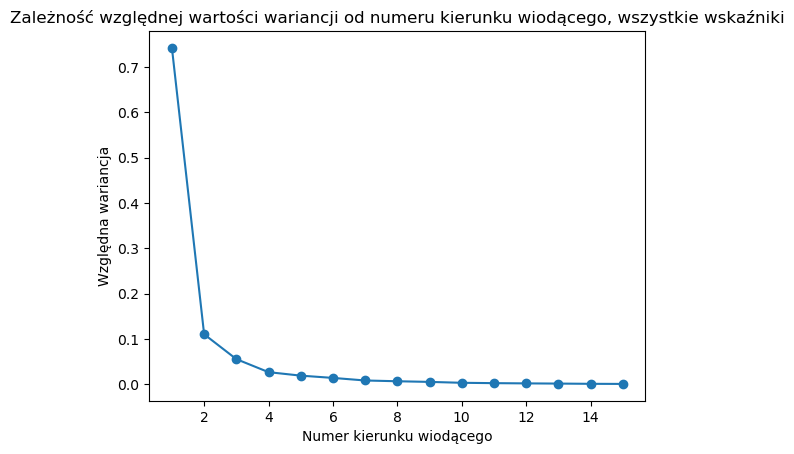

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(df_all_indicators_normalized.values)
# wartość wariancji procentowej dla każdego kierunku wiodącego
variance_percentage = pca.explained_variance_ratio_

# ilość kierunków wiodących
k = np.arange(1, len(variance_percentage) +1) 

plt.plot(k, variance_percentage, marker='o')
plt.xlabel('Numer kierunku wiodącego')
plt.ylabel('Względna wariancja')
plt.title('Zależność względnej wartości wariancji od numeru kierunku wiodącego, wszystkie wskaźniki')
plt.show()

In [32]:
pca = PCA(n_components=6)
df_all_indicators_normalized_reduced = pca.fit_transform(df_all_indicators_normalized.values)
df_all_indicators_reduced = pca.fit_transform(df_all_indicators.values)

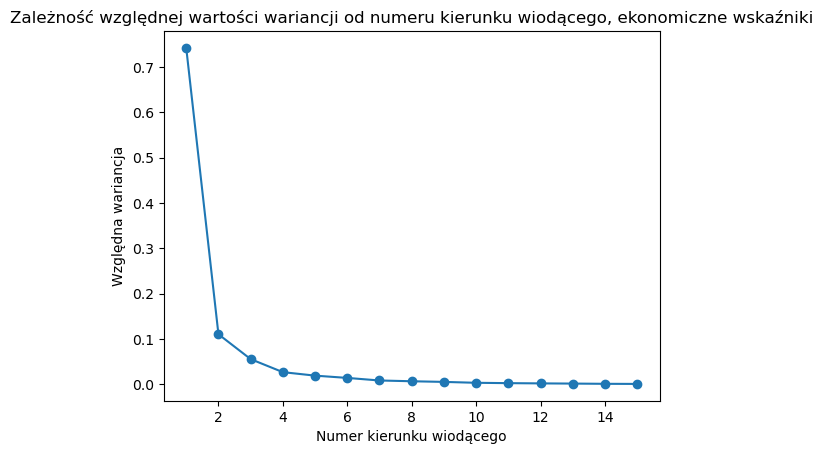

In [33]:
pca = PCA(n_components=15)
pca.fit(df_economic_indicators_normalized.values)
# wartość wariancji procentowej dla każdego kierunku wiodącego
variance_percentage = pca.explained_variance_ratio_

# ilość kierunków wiodących
k = np.arange(1, len(variance_percentage) +1) 

plt.plot(k, variance_percentage, marker='o')
plt.xlabel('Numer kierunku wiodącego')
plt.ylabel('Względna wariancja')
plt.title('Zależność względnej wartości wariancji od numeru kierunku wiodącego, ekonomiczne wskaźniki')
plt.show()

In [34]:
pca = PCA(n_components=6)
df_economic_indicators_normalized_reduced = pca.fit_transform(df_economic_indicators_normalized.values)
df_economic_indicators_reduced = pca.fit_transform(df_economic_indicators.values)

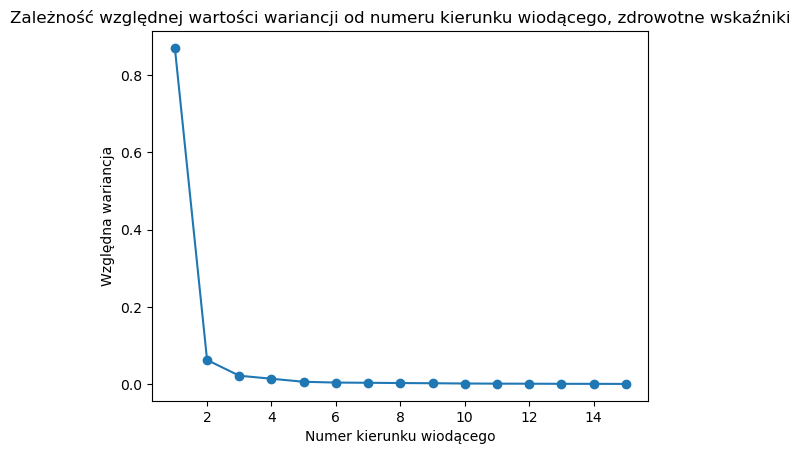

In [35]:
pca = PCA(n_components=15)
pca.fit(df_health_indicators_normalized.values)
# wartość wariancji procentowej dla każdego kierunku wiodącego
variance_percentage = pca.explained_variance_ratio_

# ilość kierunków wiodących
k = np.arange(1, len(variance_percentage) +1) 

plt.plot(k, variance_percentage, marker='o')
plt.xlabel('Numer kierunku wiodącego')
plt.ylabel('Względna wariancja')
plt.title('Zależność względnej wartości wariancji od numeru kierunku wiodącego, zdrowotne wskaźniki')
plt.show()

In [36]:
pca = PCA(n_components=5)
df_health_indicators_normalized_reduced = pca.fit_transform(df_health_indicators_normalized.values)
df_health_indicators_reduced = pca.fit_transform(df_health_indicators.values)

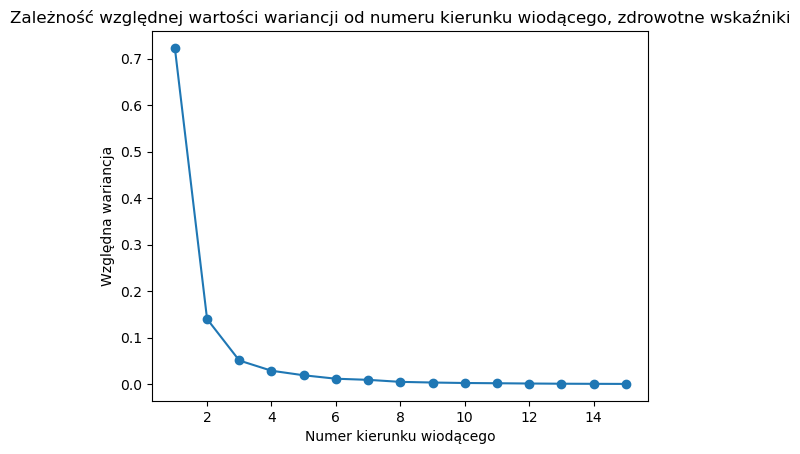

In [37]:
pca = PCA(n_components=15)
pca.fit(df_sociodemographic_indicators_normalized.values)
# wartość wariancji procentowej dla każdego kierunku wiodącego
variance_percentage = pca.explained_variance_ratio_

# ilość kierunków wiodących
k = np.arange(1, len(variance_percentage) +1) 

plt.plot(k, variance_percentage, marker='o')
plt.xlabel('Numer kierunku wiodącego')
plt.ylabel('Względna wariancja')
plt.title('Zależność względnej wartości wariancji od numeru kierunku wiodącego, zdrowotne wskaźniki')
plt.show()

In [38]:
pca = PCA(n_components=6)
df_sociodemographic_indicators_normalized_reduced = pca.fit_transform(df_sociodemographic_indicators_normalized.values)
df_sociodemographic_indicators_reduced = pca.fit_transform(df_sociodemographic_indicators.values)

### Wizualizacja PCA

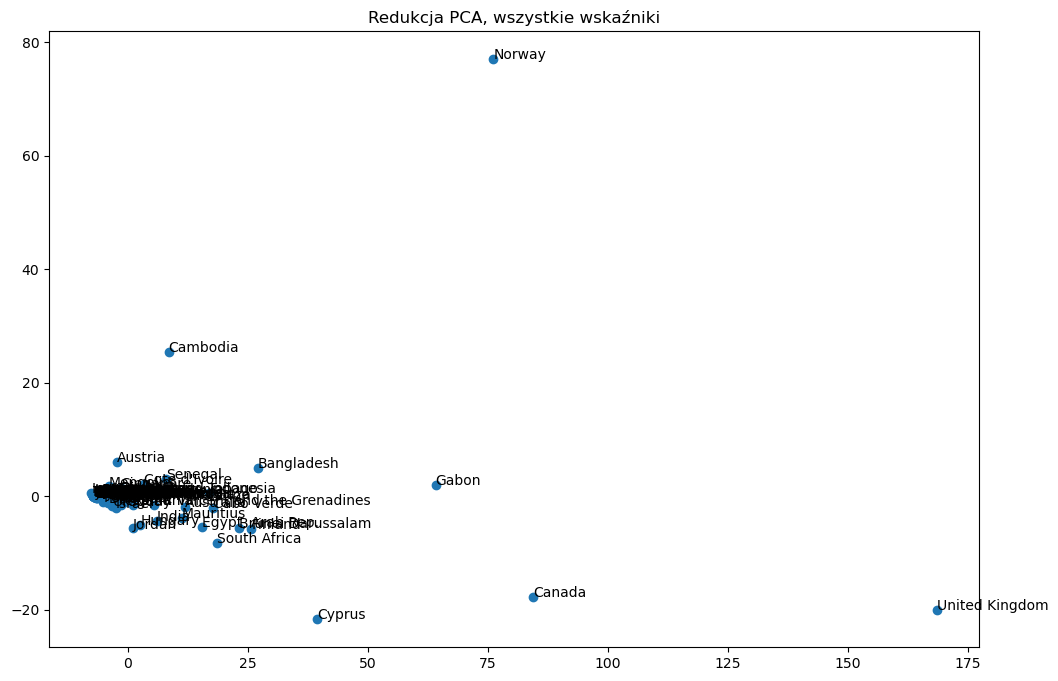

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_all_indicators_normalized_reduced[:,0], df_all_indicators_normalized_reduced[:,1],)

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (df_all_indicators_normalized_reduced[i,0], df_all_indicators_normalized_reduced[i,1]))

plt.title("Redukcja PCA, wszystkie wskaźniki")
plt.show()

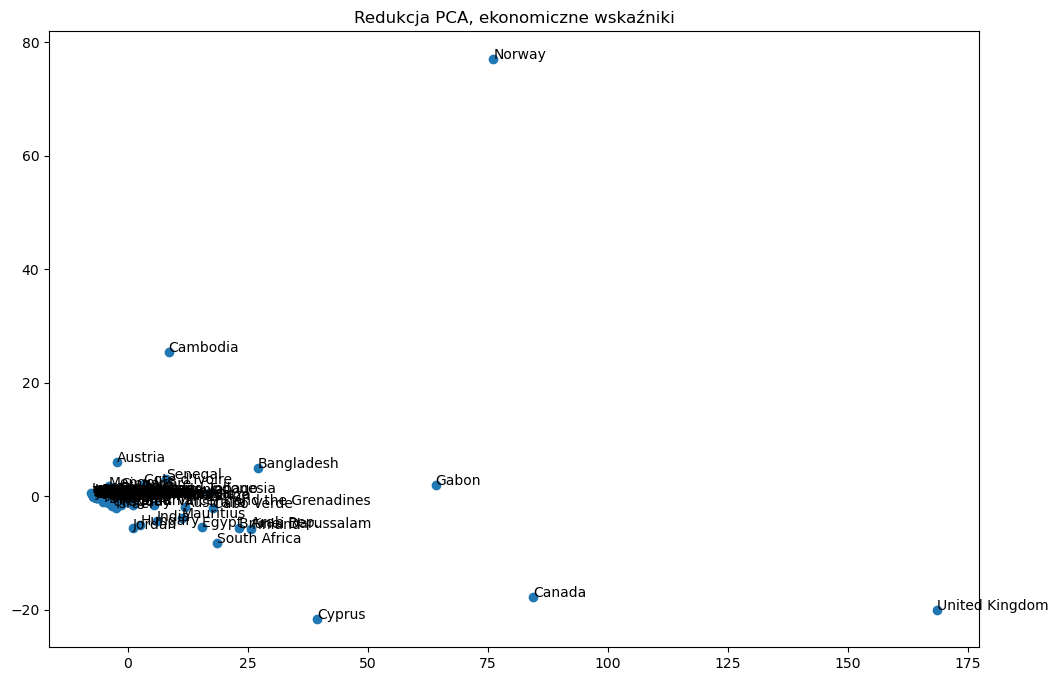

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_economic_indicators_normalized_reduced[:,0], df_economic_indicators_normalized_reduced[:,1],)

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (df_economic_indicators_normalized_reduced[i,0], df_economic_indicators_normalized_reduced[i,1]))

plt.title("Redukcja PCA, ekonomiczne wskaźniki")
plt.show()

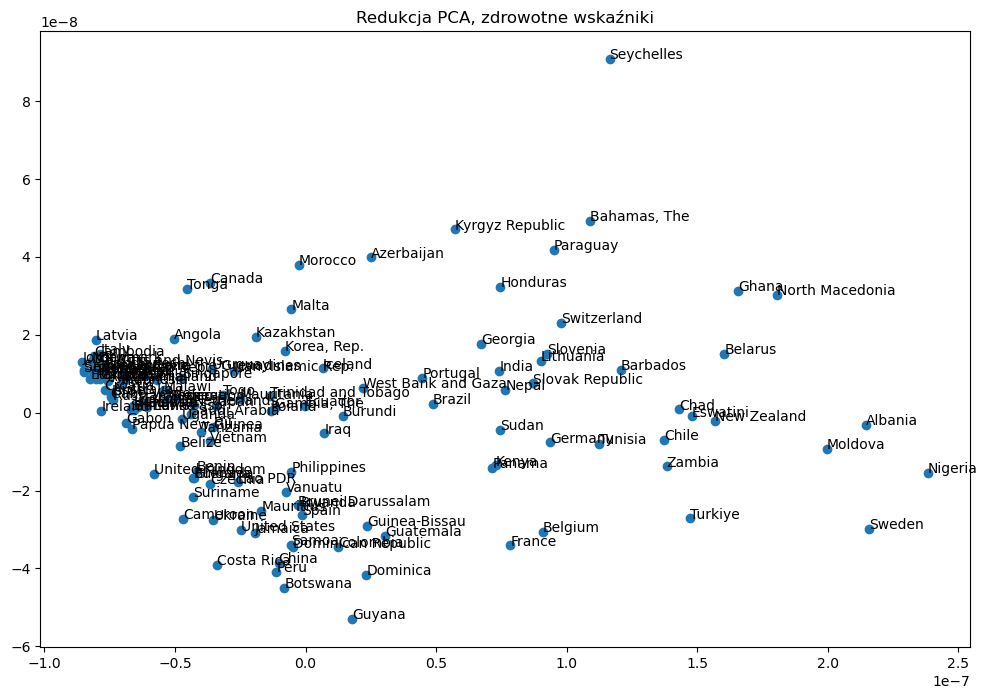

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_health_indicators_normalized_reduced[:,0], df_health_indicators_normalized_reduced[:,1],)

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (df_health_indicators_normalized_reduced[i,0], df_health_indicators_normalized_reduced[i,1]))

plt.title("Redukcja PCA, zdrowotne wskaźniki")
plt.show()

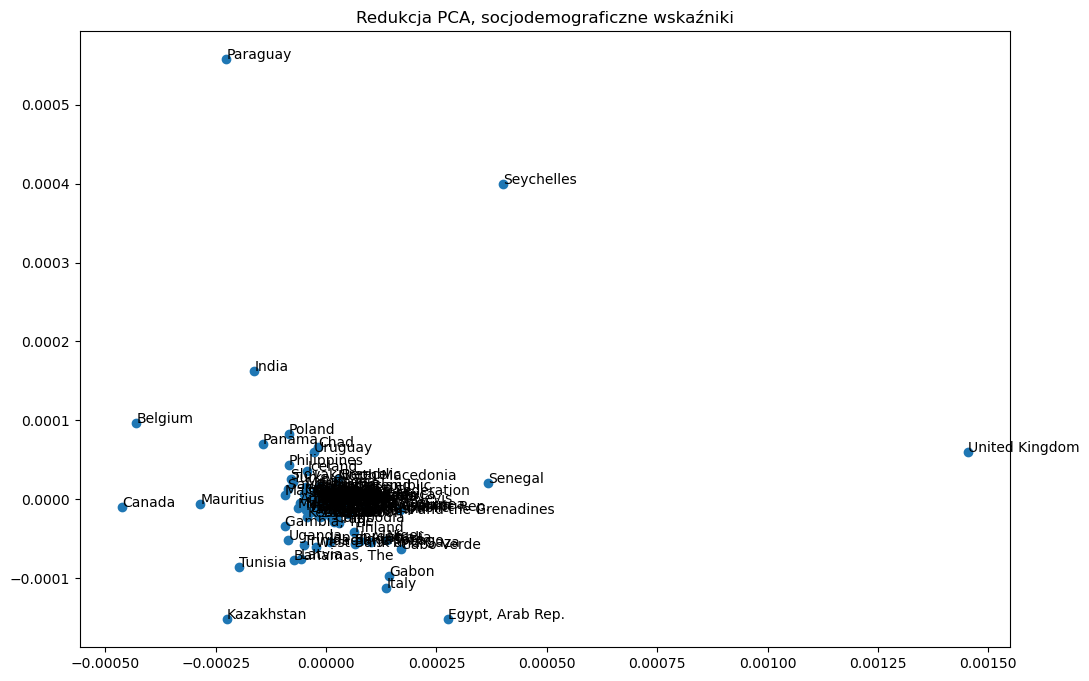

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_sociodemographic_indicators_normalized_reduced[:,0], df_sociodemographic_indicators_normalized_reduced[:,1],)

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (df_sociodemographic_indicators_normalized_reduced[i,0], df_sociodemographic_indicators_normalized_reduced[i,1]))

plt.title("Redukcja PCA, socjodemograficzne wskaźniki")
plt.show()

## TSNE

### Wszystkie wskaźniki

**Dane Znormalizowane**

In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=3, random_state=0)
X_all_normalized_tsne = tsne.fit_transform(df_all_indicators_normalized.values)
X_all_normalized_tsne

array([[-26.95041   ,  21.77857   ],
       [ -4.4354854 ,  28.047781  ],
       [ 31.625856  , -19.61088   ],
       [ 32.96099   ,  16.494488  ],
       [ 30.508842  ,  28.747677  ],
       [-16.972393  , -39.447678  ],
       [ 33.863117  , -36.57712   ],
       [-30.98041   , -10.184011  ],
       [-29.57066   ,  -9.277935  ],
       [ -0.0991375 ,  20.947319  ],
       [ 24.760548  ,  18.513618  ],
       [-29.053398  ,   5.841627  ],
       [ -1.0648197 ,  29.99248   ],
       [-34.287483  , -17.140022  ],
       [-14.217389  ,  18.341604  ],
       [ 27.931139  , -27.856258  ],
       [-26.020945  ,   6.8173685 ],
       [-14.251098  ,  20.069223  ],
       [-24.32989   ,   8.800018  ],
       [ 39.073616  , -36.405624  ],
       [ 46.579803  ,   2.7662003 ],
       [ 36.224617  ,  -6.968178  ],
       [ 27.80924   , -31.237007  ],
       [-14.199141  ,  22.038122  ],
       [ -6.699938  ,  30.23501   ],
       [ 35.523525  ,  -4.9026484 ],
       [-33.838715  , -18.376226  ],
 

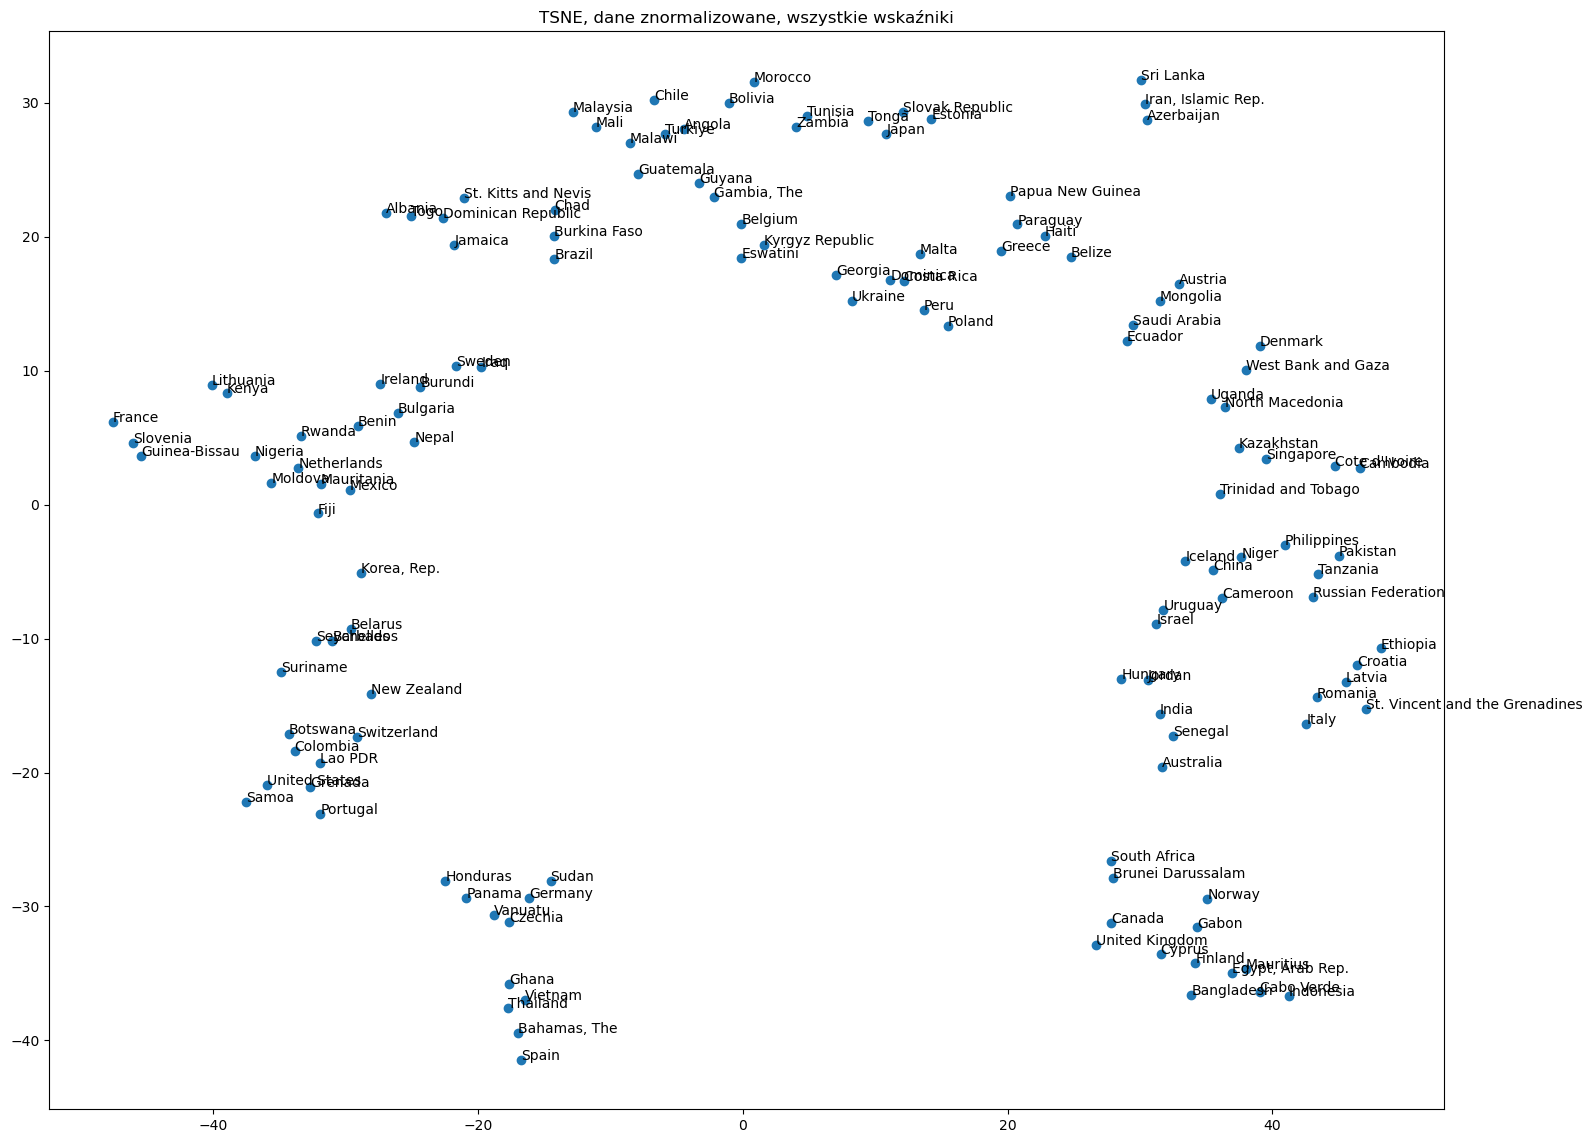

In [64]:
fig, ax = plt.subplots(figsize=(18, 14))
ax.scatter(X_all_normalized_tsne[:,0], X_all_normalized_tsne[:,1])

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (X_all_normalized_tsne[i,0], X_all_normalized_tsne[i,1]))
plt.title("TSNE, dane znormalizowane, wszystkie wskaźniki")
plt.show()

**Wnioski:**
* Niemcy oraz Hiszpania znajdują się wśród państw takich jak Sudan, Panama, Ghana czy Wietnam
* Stanom Zjednoczonym czy Szwajcarii blisko do państw takich jak Samoa, Botswana, Grenada. W grupie tej znajduje się również Portugalia.
* Francja podobna do państw takich jak Kenya, Litwa, Słowenia, czy Gwinea Bissau
* Holandia czy Meksyk podobne do Mołdawi, Nigerii czy Nepalu. W grupie tej znajdują się również Szwecja lub Irlandia.
* Belgia również w grupie państw takich jak Zambia, Tunezja, czy Guyana
* Japonia blisko Słowacji, Estoni i Tonga
* Polska podobna do Peru, Kostaryki, Dominiki czy Malty
* Wielka Brytania i Kanada podobne do Afryki Południowej i Brunei


**Dane oryginalne**

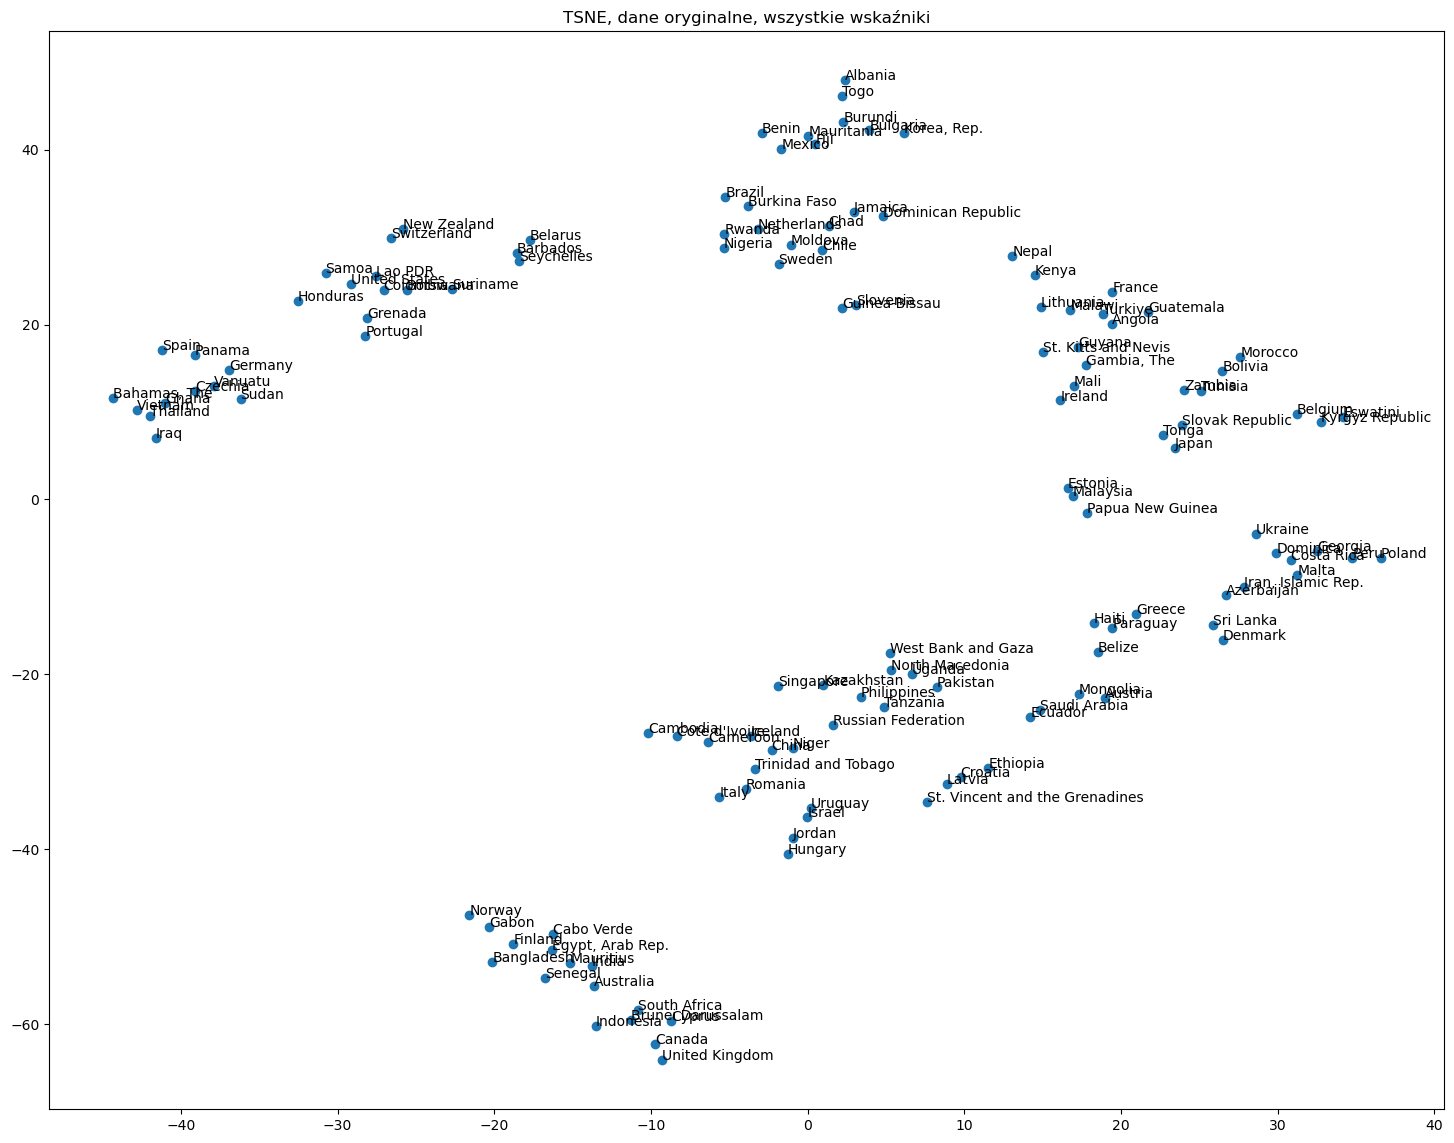

In [65]:
tsne = TSNE(n_components=2, perplexity=3, random_state=0)
X_all_tsne = tsne.fit_transform(df_all_indicators.values)

fig, ax = plt.subplots(figsize=(18, 14))
ax.scatter(X_all_tsne[:,0], X_all_tsne[:,1])

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (X_all_tsne[i,0], X_all_tsne[i,1]))

plt.title("TSNE, dane oryginalne, wszystkie wskaźniki")
plt.show()

Wnioski:

### Wskaźniki ekonomiczne

In [66]:
wb.series.info(economic_indicators)

id                 value
-----------------  ----------------------------------------------------------
NV.AGR.TOTL.ZS     Agriculture, forestry, and fishing, value added (% of GDP)
BX.KLT.DINV.CD.WD  Foreign direct investment, net inflows (BoP, current US$)
NY.GDP.PCAP.CD     GDP per capita (current US$)
NV.IND.TOTL.ZS     Industry (including construction), value added (% of GDP)
FP.CPI.TOTL.ZG     Inflation, consumer prices (annual %)
                   5 elements

Dane znormalizowane:

In [67]:
tsne = TSNE(n_components=2, perplexity=3, random_state=0)
X_economic_normalized_tsne = tsne.fit_transform(df_economic_indicators_normalized.values)
X_economic_normalized_tsne

array([[-1.28922403e+00, -1.51055040e+01],
       [-1.69354191e+01, -2.06415234e+01],
       [-7.95147419e+00,  4.84280739e+01],
       [-2.92216625e+01,  1.89190941e+01],
       [-8.09713840e+00,  1.06998253e+01],
       [ 4.37196770e+01, -7.45790911e+00],
       [ 9.10855675e+00,  5.45874214e+01],
       [ 2.68906555e+01, -3.11742630e+01],
       [ 2.56903286e+01, -3.00706196e+01],
       [-1.41009064e+01, -1.29838076e+01],
       [-2.57328453e+01,  9.70641136e+00],
       [ 1.23605957e+01, -3.18798199e+01],
       [-2.04016895e+01, -1.92354298e+01],
       [ 3.37421608e+01, -3.37464752e+01],
       [ 6.33729744e+00, -1.76200771e+01],
       [-1.58436775e+00,  5.62112923e+01],
       [ 1.10813694e+01, -2.93529625e+01],
       [ 5.14909172e+00, -1.88346691e+01],
       [ 8.43222141e+00, -2.92902355e+01],
       [ 4.05630112e+00,  5.09450264e+01],
       [-4.78339195e+00,  4.24334030e+01],
       [-1.32761564e+01,  3.63898964e+01],
       [ 9.44176614e-01,  5.84908714e+01],
       [ 3.

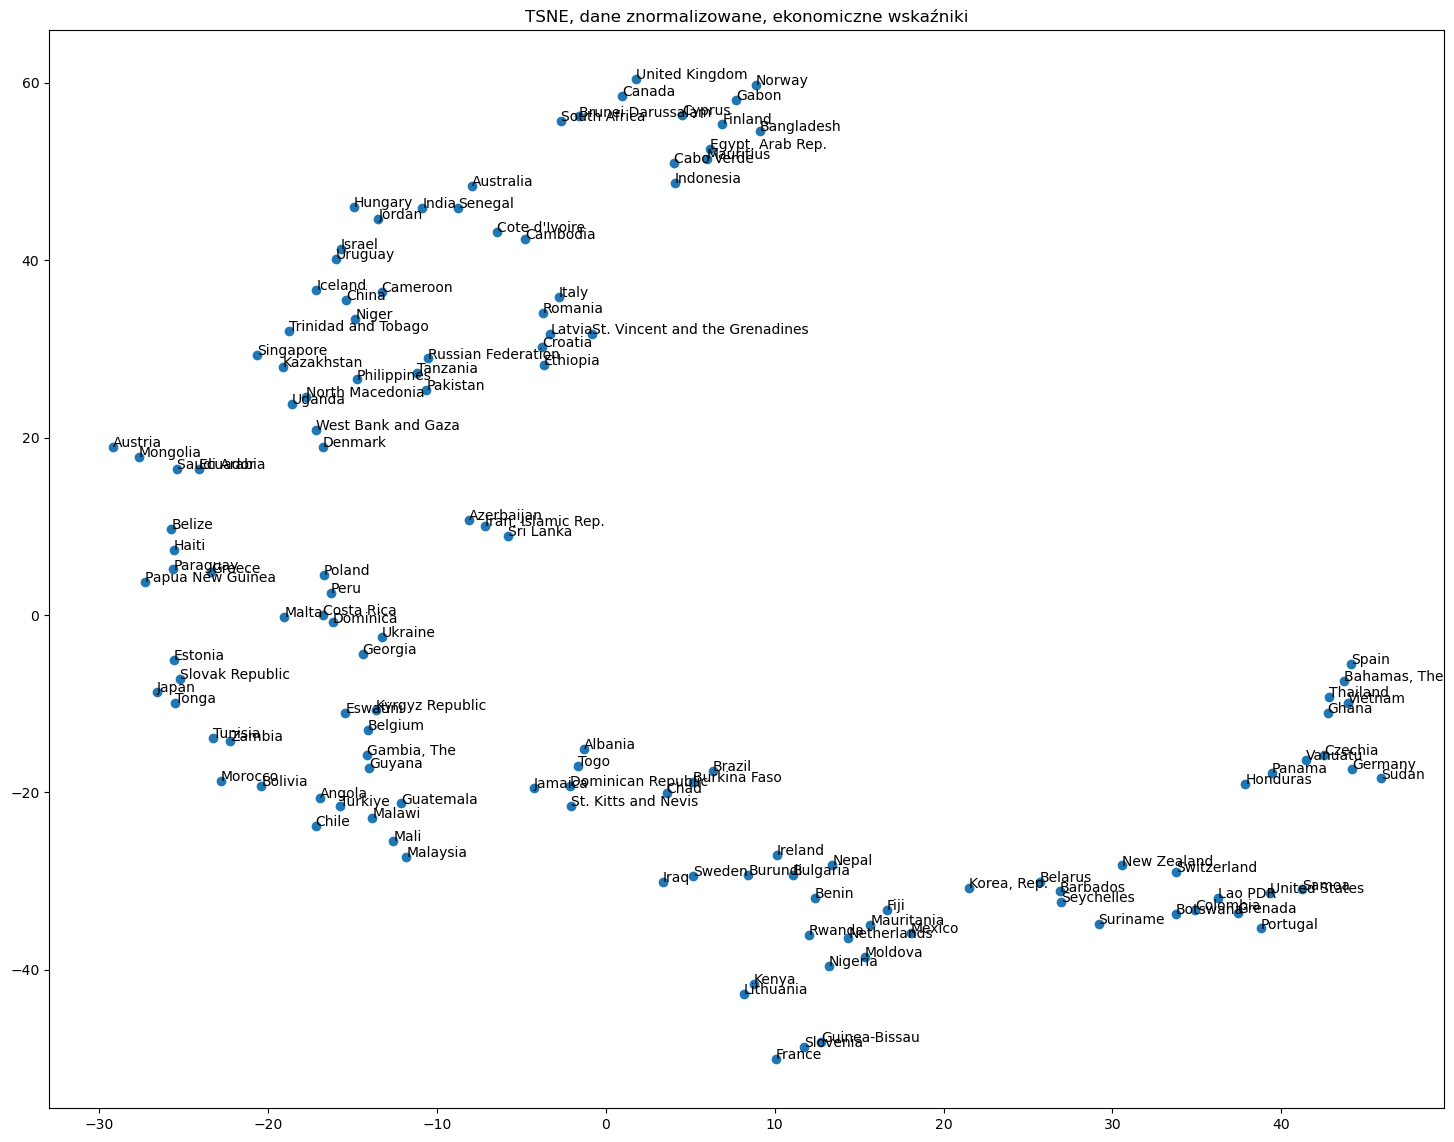

In [68]:
fig, ax = plt.subplots(figsize=(18, 14))
ax.scatter(X_economic_normalized_tsne[:,0], X_economic_normalized_tsne[:,1],)

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (X_economic_normalized_tsne[i,0], X_economic_normalized_tsne[i,1]))

plt.title("TSNE, dane znormalizowane, ekonomiczne wskaźniki")
plt.show()

**WNIOSKI:**
Podobnie do wszystkich wskaźników (dodaj coś do wniosków)




Dane oryginalne

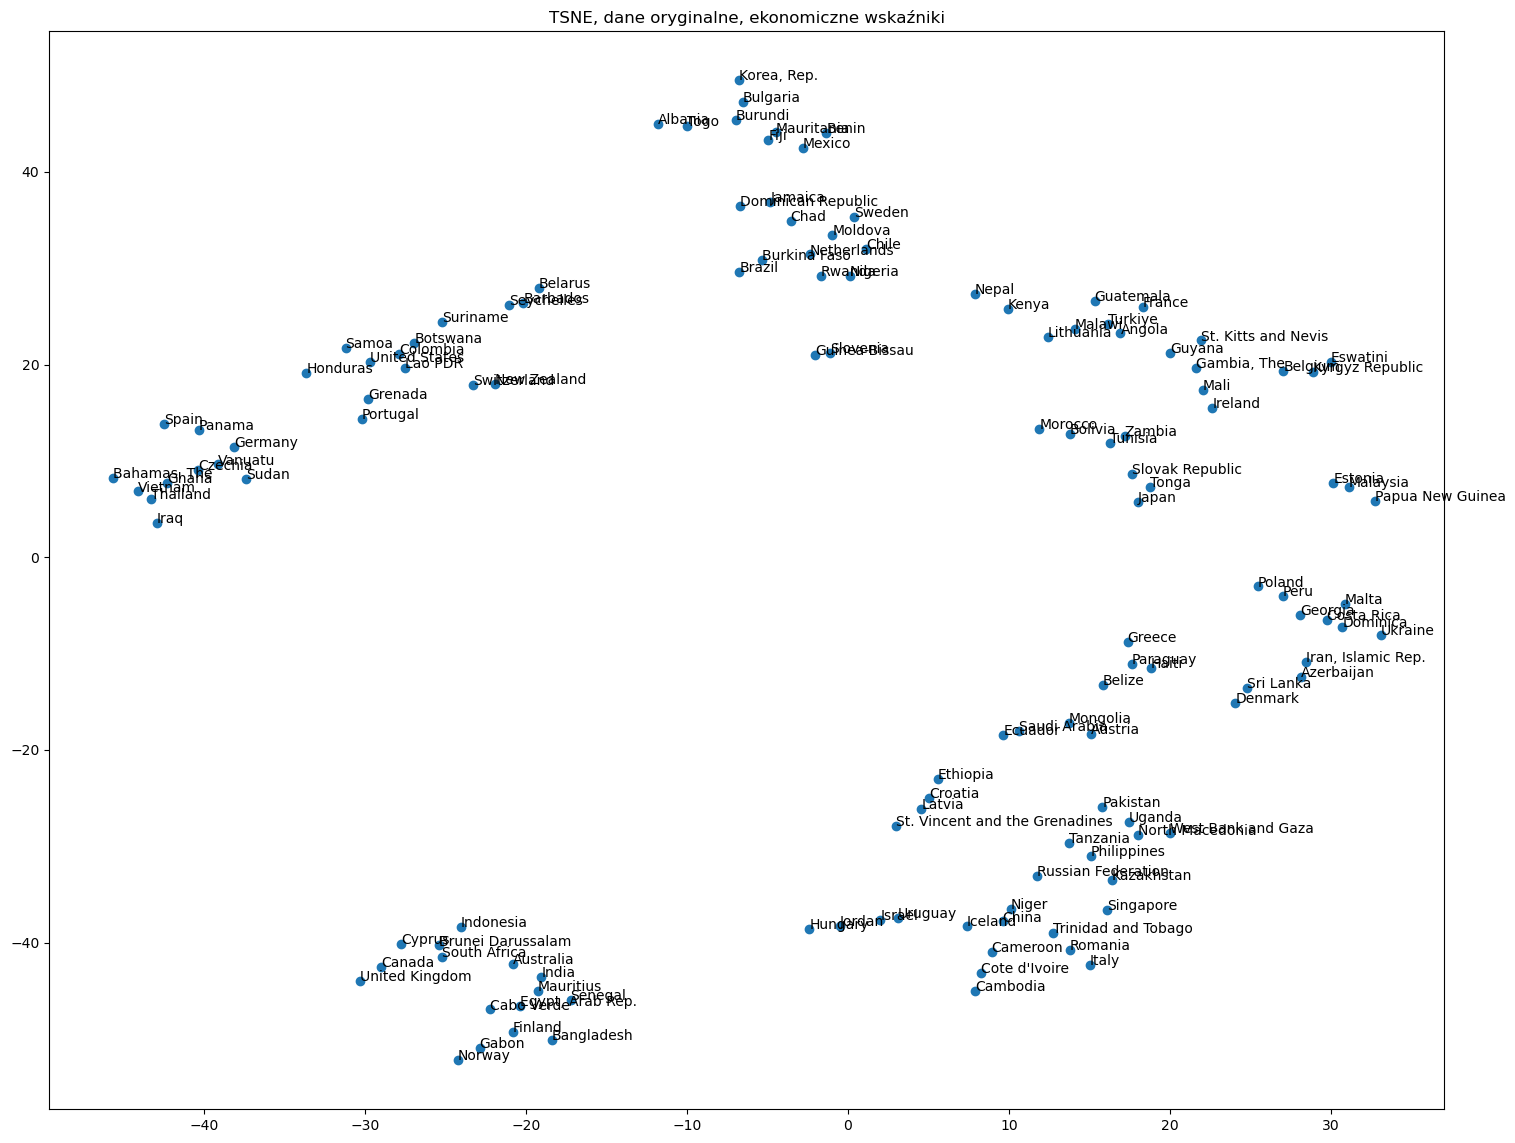

In [69]:
tsne = TSNE(n_components=2, perplexity=3, random_state=0)
X_economic_normalized_tsne = tsne.fit_transform(df_economic_indicators.values)

fig, ax = plt.subplots(figsize=(18, 14))
ax.scatter(X_economic_normalized_tsne[:,0], X_economic_normalized_tsne[:,1])

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (X_economic_normalized_tsne[i,0], X_economic_normalized_tsne[i,1]))

plt.title("TSNE, dane oryginalne, ekonomiczne wskaźniki")
plt.show()

WNIOKI:

### Wskaźniki zdrowotne

In [52]:
wb.series.info(health_indicators)

id                 value
-----------------  -------------------------------------------------------------
SP.ADO.TFRT        Adolescent fertility rate (births per 1,000 women ages 15-19)
SP.DYN.CBRT.IN     Birth rate, crude (per 1,000 people)
SP.DYN.CDRT.IN     Death rate, crude (per 1,000 people)
SP.DYN.TFRT.IN     Fertility rate, total (births per woman)
SH.IMM.IDPT        Immunization, DPT (% of children ages 12-23 months)
SH.IMM.MEAS        Immunization, measles (% of children ages 12-23 months)
SP.DYN.LE00.FE.IN  Life expectancy at birth, female (years)
SP.DYN.LE00.MA.IN  Life expectancy at birth, male (years)
SP.DYN.LE00.IN     Life expectancy at birth, total (years)
SP.DYN.IMRT.IN     Mortality rate, infant (per 1,000 live births)
SH.DYN.NMRT        Mortality rate, neonatal (per 1,000 live births)
SH.DYN.MORT        Mortality rate, under-5 (per 1,000 live births)
                   12 elements

Dane znormalizowane:

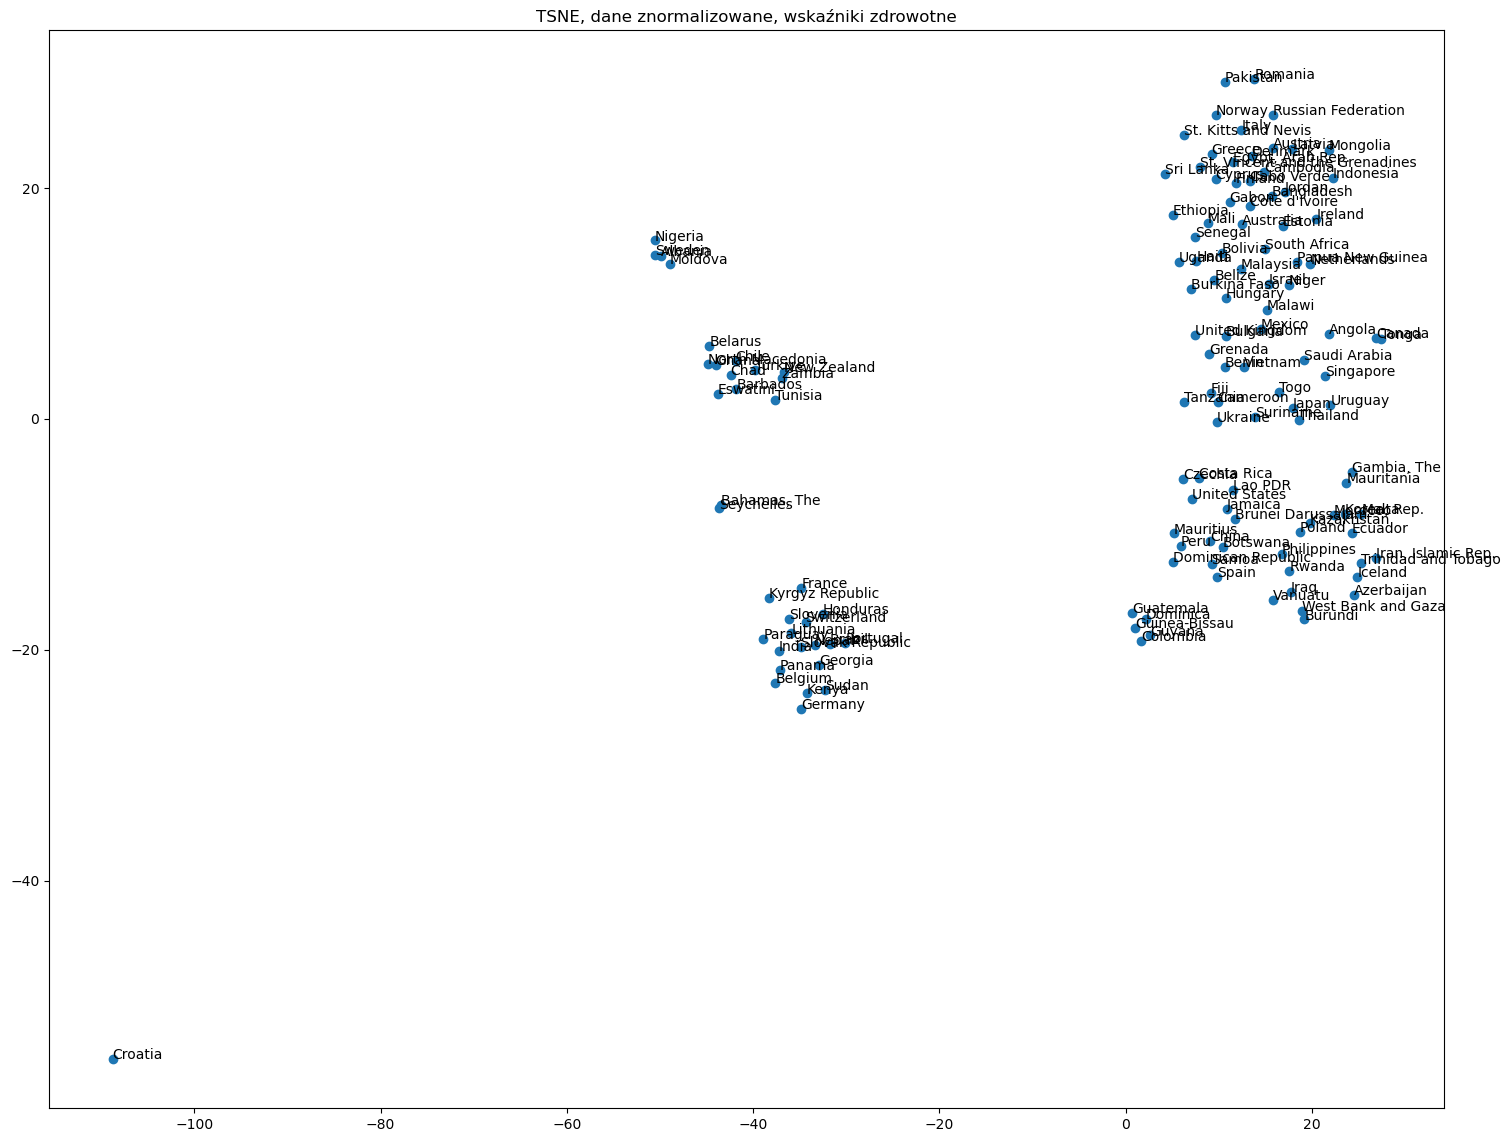

In [70]:
tsne = TSNE(n_components=2, perplexity=3, random_state=0)
X_health_normalized_tsne = tsne.fit_transform(df_health_indicators_normalized.values)


fig, ax = plt.subplots(figsize=(18, 14))
ax.scatter(X_health_normalized_tsne[:, 0], X_health_normalized_tsne[:, 1])

for i, txt in enumerate(countries_full_names):
    ax.annotate(txt, (X_health_normalized_tsne[i, 0], X_health_normalized_tsne[i, 1]))

plt.title("TSNE, dane znormalizowane, wskaźniki zdrowotne")
plt.show()

WNIOSKI:
* Francja znacznie oddalona od pozostałych państw
* Szwecja podobna do Mołdawi, Albani i Nigerii
* dodaj więcej


Dane oryginalne

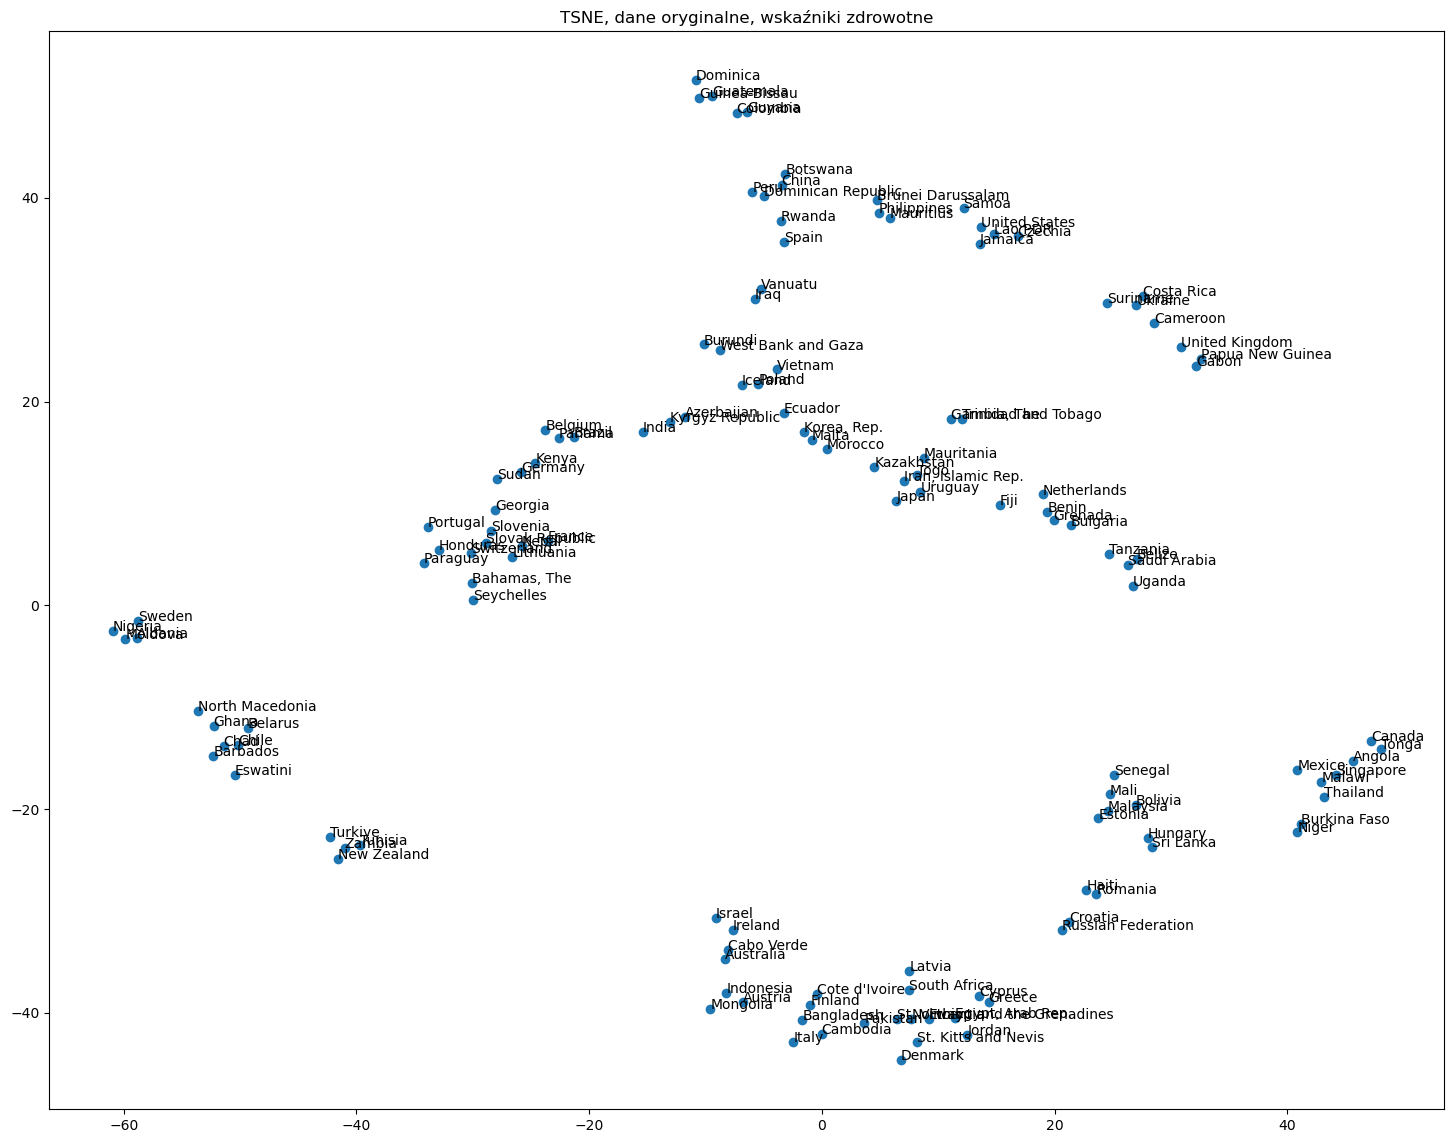

In [71]:
tsne = TSNE(n_components=2, perplexity=3, random_state=0)
X_health_tsne = tsne.fit_transform(df_health_indicators.values)


fig, ax = plt.subplots(figsize=(18, 14))
ax.scatter(X_health_tsne[:, 0], X_health_tsne[:, 1])

for i, txt in enumerate(countries_full_names):
    ax.annotate(txt, (X_health_tsne[i, 0], X_health_tsne[i, 1]))

plt.title("TSNE, dane oryginalne, wskaźniki zdrowotne")
plt.show()

Wnioski

### Wskaźniki socjologiczne

In [61]:
wb.series.info(sociodemographic_indicators)

id                 value
-----------------  ----------------------------------------------------
SP.DYN.CDRT.IN     Death rate, crude (per 1,000 people)
SP.DYN.TFRT.IN     Fertility rate, total (births per woman)
SM.POP.NETM        Net migration
SP.POP.0014.TO.ZS  Population ages 0-14 (% of total population)
SP.POP.1564.TO.ZS  Population ages 15-64 (% of total population)
SP.POP.65UP.TO.ZS  Population ages 65 and above (% of total population)
SP.POP.GROW        Population growth (annual %)
SP.POP.TOTL.FE.ZS  Population, female (% of total population)
SP.URB.TOTL.IN.ZS  Urban population (% of total population)
                   9 elements

Dane znormalizowane:

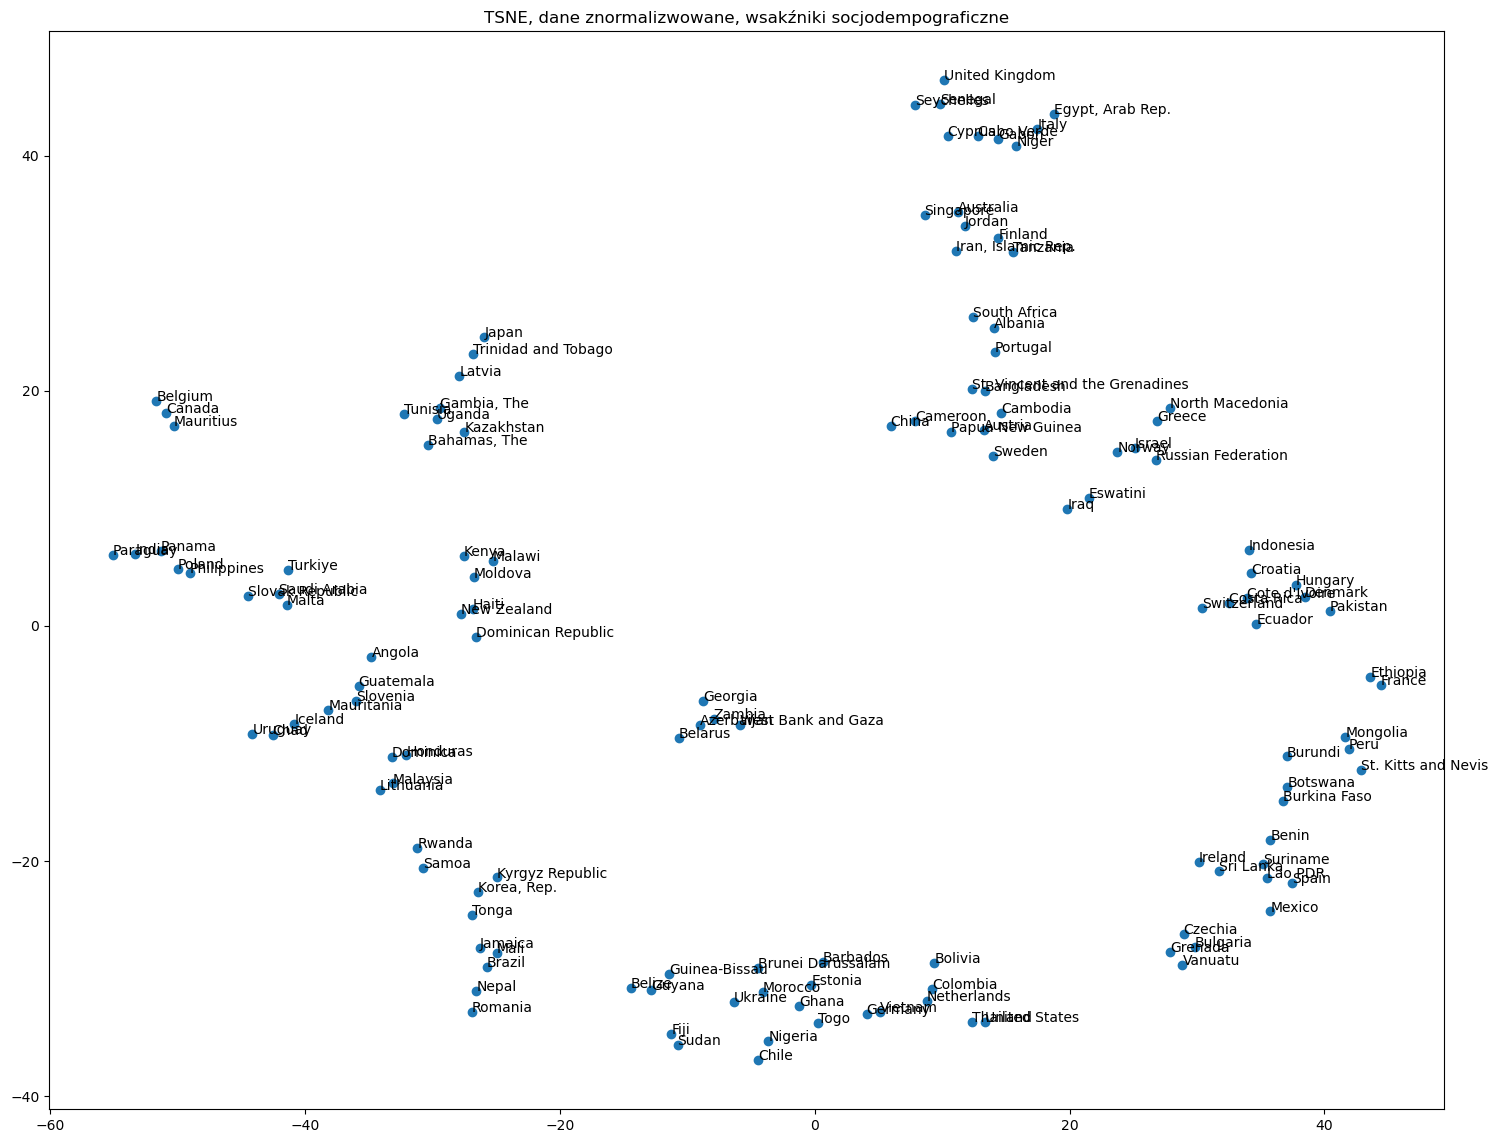

In [72]:
tsne = TSNE(n_components=2, perplexity=3, random_state=0)
X_sociodemographic_normalized_tsne = tsne.fit_transform(df_sociodemographic_indicators_normalized.values)

fig, ax = plt.subplots(figsize=(18, 14))
ax.scatter(X_sociodemographic_normalized_tsne[:, 0], X_sociodemographic_normalized_tsne[:, 1])

for i, txt in enumerate(countries_full_names):
    ax.annotate(txt, (X_sociodemographic_normalized_tsne[i, 0], X_sociodemographic_normalized_tsne[i, 1]))

plt.title("TSNE, dane znormalizwowane, wsakźniki socjodempograficzne")
plt.show()

**Wnioski:**
* Ethiopia podobna do Francji
* Meksyk podobny do Hiszpani (to raczej potwierdzenie)
* Mauritius podobny do Kanady i Belgii
* Polska i Słowacja blisko Indii, Panamy, Arabi Saudyjskiej czy Turcji
* Dodaj więcej wniosków



Dane oryginalne:

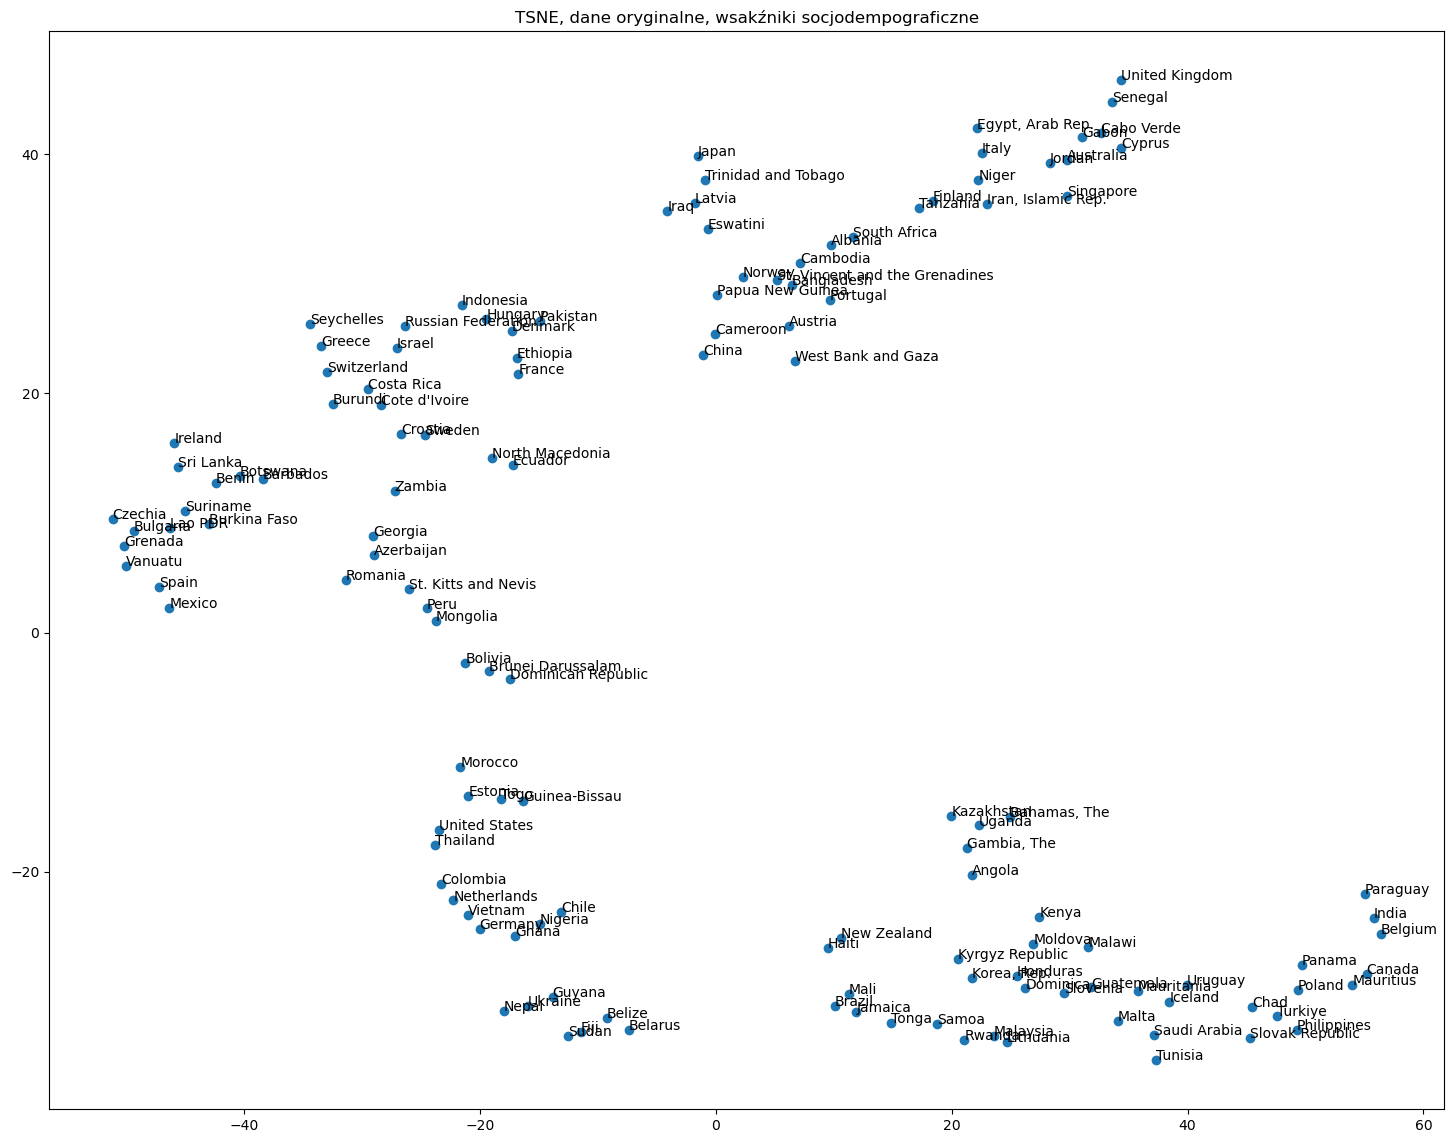

In [73]:
tsne = TSNE(n_components=2, perplexity=3, random_state=0)
X_sociodemographic_tsne = tsne.fit_transform(df_sociodemographic_indicators.values)

fig, ax = plt.subplots(figsize=(18, 14))
ax.scatter(X_sociodemographic_tsne[:, 0], X_sociodemographic_tsne[:, 1])

for i, txt in enumerate(countries_full_names):
    ax.annotate(txt, (X_sociodemographic_tsne[i, 0], X_sociodemographic_tsne[i, 1]))

plt.title("TSNE, dane oryginalne, wsakźniki socjodempograficzne")
plt.show()

Wnioski

## Klasteryzacja hierarchiczna

### Wszystkie wskaźniki

In [74]:
wb.series.info(all_indicators)

id                 value
-----------------  -------------------------------------------------------------
SP.ADO.TFRT        Adolescent fertility rate (births per 1,000 women ages 15-19)
NV.AGR.TOTL.ZS     Agriculture, forestry, and fishing, value added (% of GDP)
SP.DYN.CBRT.IN     Birth rate, crude (per 1,000 people)
SP.DYN.CDRT.IN     Death rate, crude (per 1,000 people)
SP.DYN.TFRT.IN     Fertility rate, total (births per woman)
BX.KLT.DINV.CD.WD  Foreign direct investment, net inflows (BoP, current US$)
NY.GDP.PCAP.CD     GDP per capita (current US$)
SH.IMM.IDPT        Immunization, DPT (% of children ages 12-23 months)
SH.IMM.MEAS        Immunization, measles (% of children ages 12-23 months)
NV.IND.TOTL.ZS     Industry (including construction), value added (% of GDP)
FP.CPI.TOTL.ZG     Inflation, consumer prices (annual %)
SP.DYN.LE00.FE.IN  Life expectancy at birth, female (years)
SP.DYN.LE00.MA.IN  Life expectancy at birth, male (years)
SP.DYN.LE00.IN     Life expectancy at birth, total (years)
SP.DYN.IMRT.IN     Mortality rate, infant (per 1,000 live births)
SH.DYN.NMRT        Mortality rate, neonatal (per 1,000 live births)
SH.DYN.MORT        Mortality rate, under-5 (per 1,000 live births)
SM.POP.NETM        Net migration
SP.POP.0014.TO.ZS  Population ages 0-14 (% of total population)
SP.POP.1564.TO.ZS  Population ages 15-64 (% of total population)
SP.POP.65UP.TO.ZS  Population ages 65 and above (% of total population)
SP.POP.GROW        Population growth (annual %)
SP.POP.TOTL.FE.ZS  Population, female (% of total population)
SP.URB.TOTL.IN.ZS  Urban population (% of total population)
                   24 elements

(133, 4)


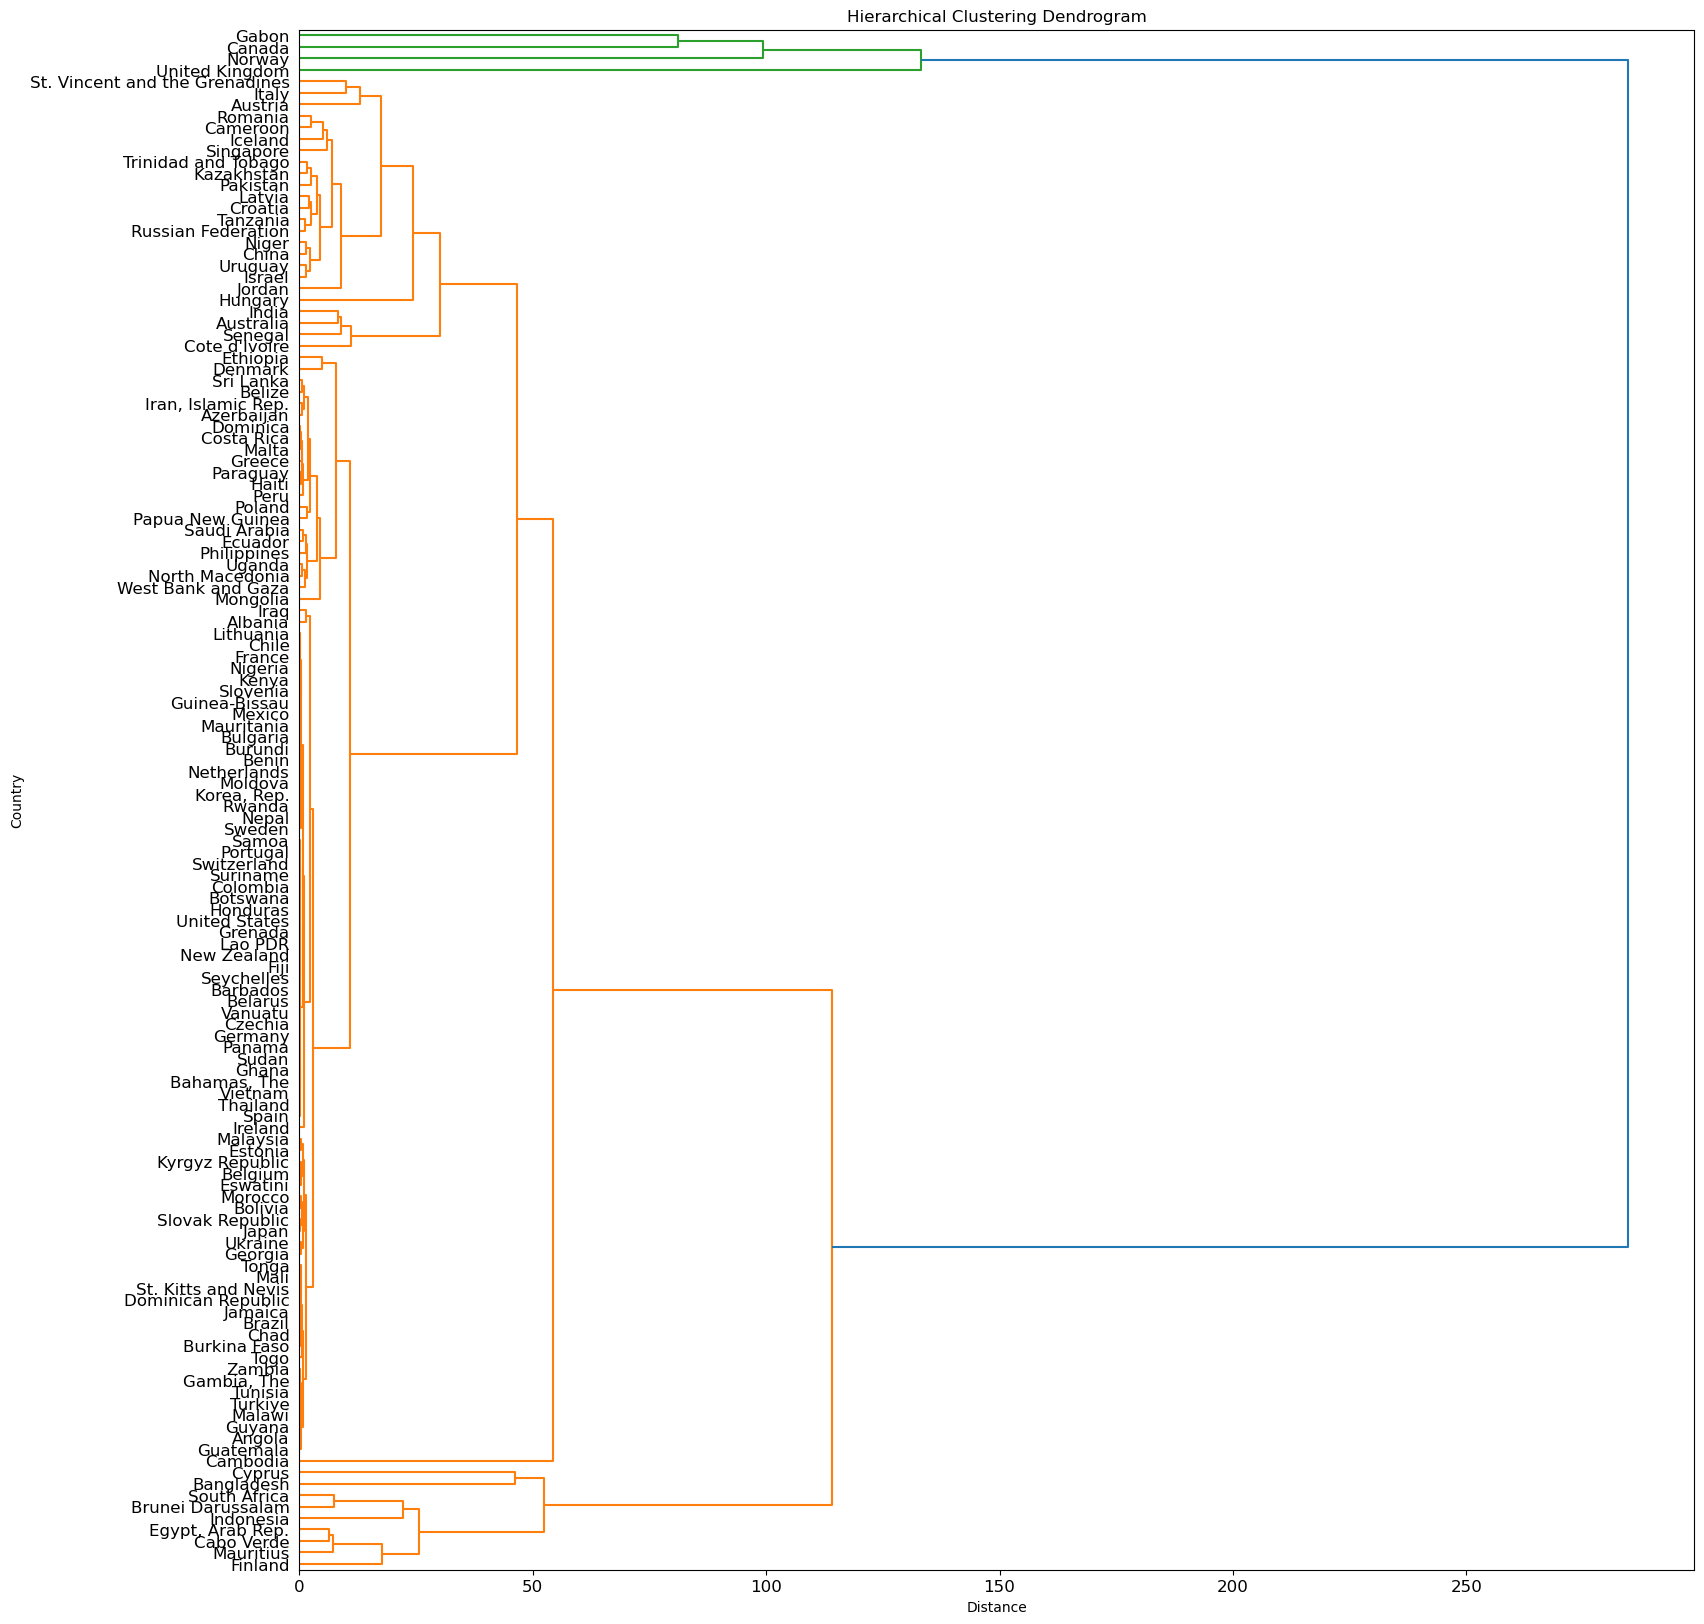

In [76]:
# funckja fcluster

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Calculate the distance matrix using the 'euclidean' metric
distance_matrix = sch.distance.pdist(df_all_indicators_normalized_reduced, metric='euclidean')

# Perform hierarchical clustering using the 'ward' linkage method
# ward method minimalize the variance of clusters being merged at each step
Z = sch.linkage(distance_matrix, method='ward')
print(Z.shape)
# Plot a dendrogram of the hierarchical clustering results
plt.figure(figsize=(18, 20))
sch.dendrogram(Z, labels=countries_full_names,  orientation = 'right')
plt.xlabel('Distance')
plt.ylabel('Country')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.grid(False)
plt.show()

Wnioski
* Gabon, Kanada, Norwegia i Wielka Brytania znalazły się w jednym klastrze do drugieo trafiła reszta państw. Pomimo przynależności przytoczonych państw do jednego klastra ich odległości (pozioma oś) są duże co oznacza że kraje te się znacząco różnią.
* więcej wniosków


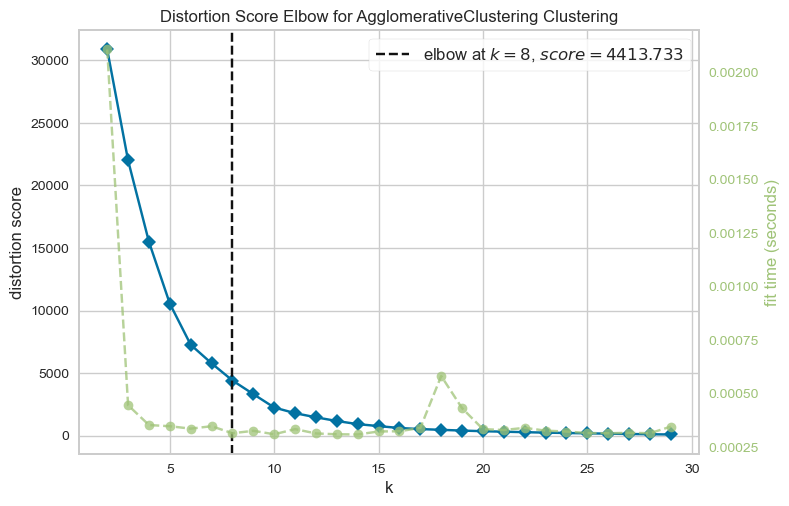

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering( metric='euclidean', linkage='ward')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df_all_indicators_normalized_reduced)        # Fit data to visualizer
visualizer.show() 

In [78]:
import numpy as np
from collections import Counter

# Perform hierarchical clustering using the 'ward' linkage method
n_clusters = 8
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
model.fit(df_all_indicators_normalized_reduced)
cluster_labels = model.labels_
cluster_counts = dict(Counter(cluster_labels))

for i in range(n_clusters):
    cluster_countries = [countries_full_names[j] for j in range(len(countries_full_names)) if cluster_labels[j] == i]
    num_countries = len(cluster_countries)
    print(f"Cluster {i+1}: {num_countries} countries\n{', '.join(cluster_countries)}\n")


Cluster 1: 120 countries
Albania, Angola, Australia, Austria, Azerbaijan, Bahamas, The, Barbados, Belarus, Belgium, Belize, Benin, Bolivia, Botswana, Brazil, Bulgaria, Burkina Faso, Burundi, Cameroon, Chad, Chile, China, Colombia, Costa Rica, Cote d'Ivoire, Croatia, Czechia, Denmark, Dominica, Dominican Republic, Ecuador, Estonia, Eswatini, Ethiopia, Fiji, France, Gambia, The, Georgia, Germany, Ghana, Greece, Grenada, Guatemala, Guinea-Bissau, Guyana, Haiti, Honduras, Hungary, Iceland, India, Iran, Islamic Rep., Iraq, Ireland, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Korea, Rep., Kyrgyz Republic, Lao PDR, Latvia, Lithuania, Malawi, Malaysia, Mali, Malta, Mauritania, Mexico, Moldova, Mongolia, Morocco, Nepal, Netherlands, New Zealand, Niger, Nigeria, North Macedonia, Pakistan, Panama, Papua New Guinea, Paraguay, Peru, Philippines, Poland, Portugal, Romania, Russian Federation, Rwanda, Samoa, Saudi Arabia, Senegal, Seychelles, Singapore, Slovak Republic, Slovenia, Spain,

### Wskaźniki ekonomiczne

In [151]:
wb.series.info(economic_indicators)

id                 value
-----------------  ----------------------------------------------------------
NV.AGR.TOTL.ZS     Agriculture, forestry, and fishing, value added (% of GDP)
BX.KLT.DINV.CD.WD  Foreign direct investment, net inflows (BoP, current US$)
NY.GDP.PCAP.CD     GDP per capita (current US$)
NV.IND.TOTL.ZS     Industry (including construction), value added (% of GDP)
FP.CPI.TOTL.ZG     Inflation, consumer prices (annual %)
                   5 elements

(133, 4)


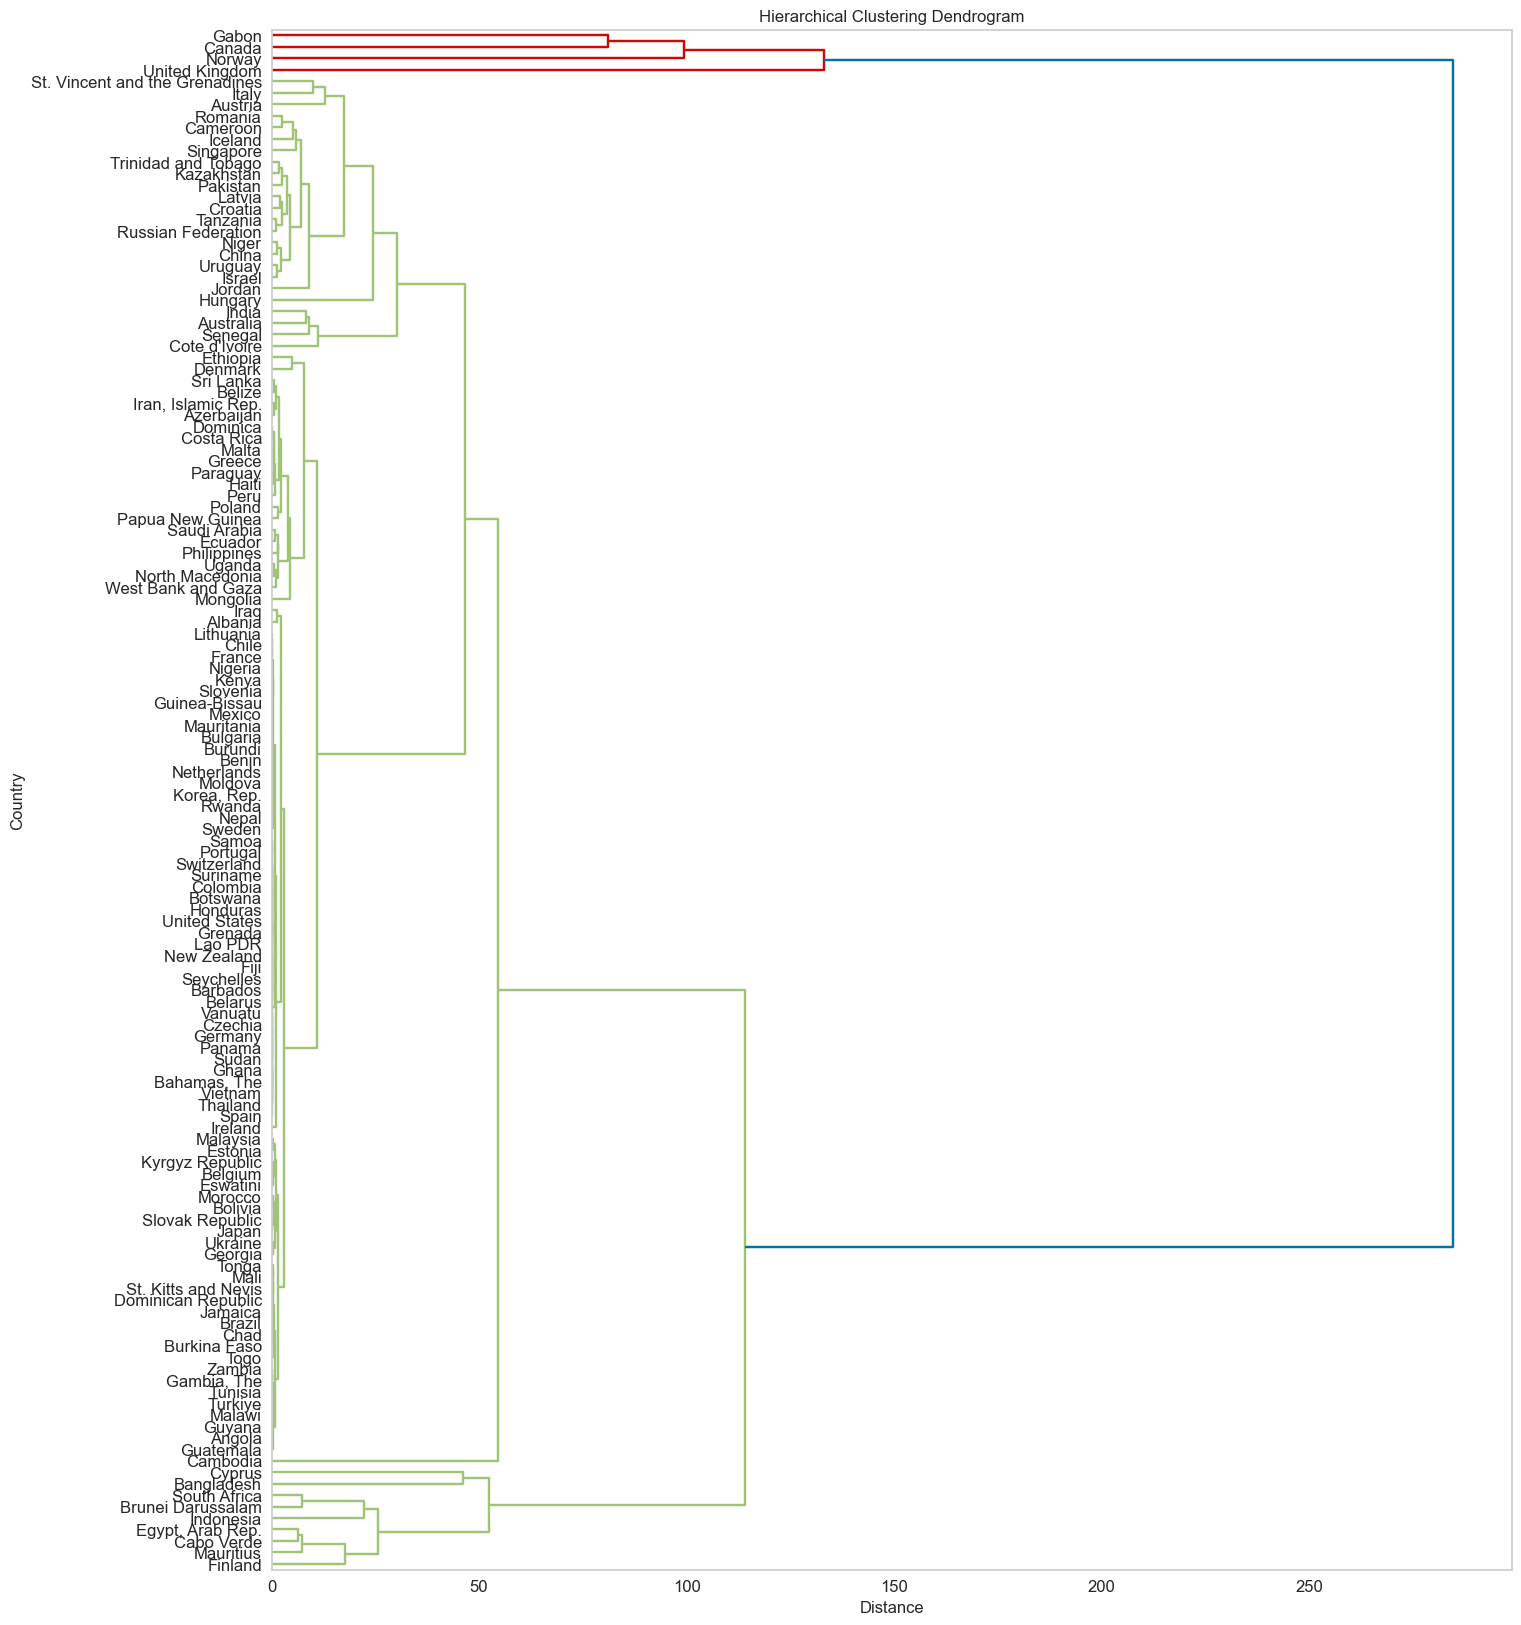

In [79]:
# Calculate the distance matrix using the 'euclidean' metric
distance_matrix = sch.distance.pdist(df_economic_indicators_normalized_reduced, metric='euclidean')

# Perform hierarchical clustering using the 'ward' linkage method
# ward method minimalize the variance of clusters being merged at each step
Z = sch.linkage(distance_matrix, method='ward')
print(Z.shape)
# Plot a dendrogram of the hierarchical clustering results
plt.figure(figsize=(16, 20))
sch.dendrogram(Z, labels=countries_full_names,  orientation = 'right')
plt.xlabel('Distance')
plt.ylabel('Country')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.grid(False)
plt.show()

Wnioski <br/>
Sytuacja wygląda tak samo jak we wszytskich wskaźnikach


### Szukanie optymalnej liczby klustrów

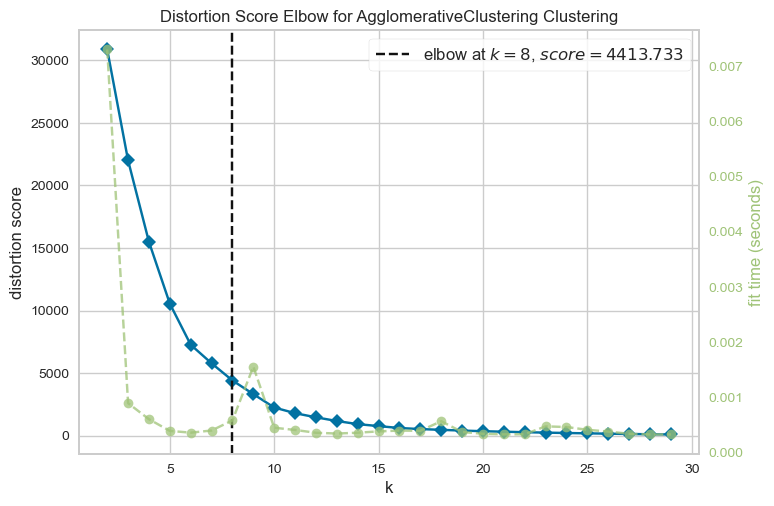

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering( metric='euclidean', linkage='ward')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df_economic_indicators_normalized_reduced)        # Fit data to visualizer
visualizer.show() 

In [86]:
import numpy as np
from collections import Counter

# Perform hierarchical clustering using the 'ward' linkage method
n_clusters = 8
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
model.fit(df_economic_indicators_normalized_reduced)
cluster_labels = model.labels_
cluster_counts = dict(Counter(cluster_labels))

for i in range(n_clusters):
    cluster_countries = [countries_full_names[j] for j in range(len(countries_full_names)) if cluster_labels[j] == i]
    num_countries = len(cluster_countries)
    print(f"Cluster {i+1}: {num_countries} countries\n{', '.join(cluster_countries)}\n")


Cluster 1: 120 countries
Albania, Angola, Australia, Austria, Azerbaijan, Bahamas, The, Barbados, Belarus, Belgium, Belize, Benin, Bolivia, Botswana, Brazil, Bulgaria, Burkina Faso, Burundi, Cameroon, Chad, Chile, China, Colombia, Costa Rica, Cote d'Ivoire, Croatia, Czechia, Denmark, Dominica, Dominican Republic, Ecuador, Estonia, Eswatini, Ethiopia, Fiji, France, Gambia, The, Georgia, Germany, Ghana, Greece, Grenada, Guatemala, Guinea-Bissau, Guyana, Haiti, Honduras, Hungary, Iceland, India, Iran, Islamic Rep., Iraq, Ireland, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Korea, Rep., Kyrgyz Republic, Lao PDR, Latvia, Lithuania, Malawi, Malaysia, Mali, Malta, Mauritania, Mexico, Moldova, Mongolia, Morocco, Nepal, Netherlands, New Zealand, Niger, Nigeria, North Macedonia, Pakistan, Panama, Papua New Guinea, Paraguay, Peru, Philippines, Poland, Portugal, Romania, Russian Federation, Rwanda, Samoa, Saudi Arabia, Senegal, Seychelles, Singapore, Slovak Republic, Slovenia, Spain,

### Wskaźniki zdrowotne

In [82]:
wb.series.info(health_indicators)

id                 value
-----------------  -------------------------------------------------------------
SP.ADO.TFRT        Adolescent fertility rate (births per 1,000 women ages 15-19)
SP.DYN.CBRT.IN     Birth rate, crude (per 1,000 people)
SP.DYN.CDRT.IN     Death rate, crude (per 1,000 people)
SP.DYN.TFRT.IN     Fertility rate, total (births per woman)
SH.IMM.IDPT        Immunization, DPT (% of children ages 12-23 months)
SH.IMM.MEAS        Immunization, measles (% of children ages 12-23 months)
SP.DYN.LE00.FE.IN  Life expectancy at birth, female (years)
SP.DYN.LE00.MA.IN  Life expectancy at birth, male (years)
SP.DYN.LE00.IN     Life expectancy at birth, total (years)
SP.DYN.IMRT.IN     Mortality rate, infant (per 1,000 live births)
SH.DYN.NMRT        Mortality rate, neonatal (per 1,000 live births)
SH.DYN.MORT        Mortality rate, under-5 (per 1,000 live births)
                   12 elements

In [83]:
health_indicators

['SP.ADO.TFRT',
 'SP.DYN.CBRT.IN',
 'SP.DYN.CDRT.IN',
 'SP.DYN.TFRT.IN',
 'SP.DYN.LE00.FE.IN',
 'SP.DYN.LE00.IN',
 'SP.DYN.LE00.MA.IN',
 'SH.IMM.IDPT',
 'SH.IMM.MEAS',
 'SH.DYN.NMRT',
 'SP.DYN.IMRT.IN',
 'SH.DYN.MORT',
 'SH.DYN.NMRT']

In [84]:
df_health_indicators_normalized.shape

(134, 425)

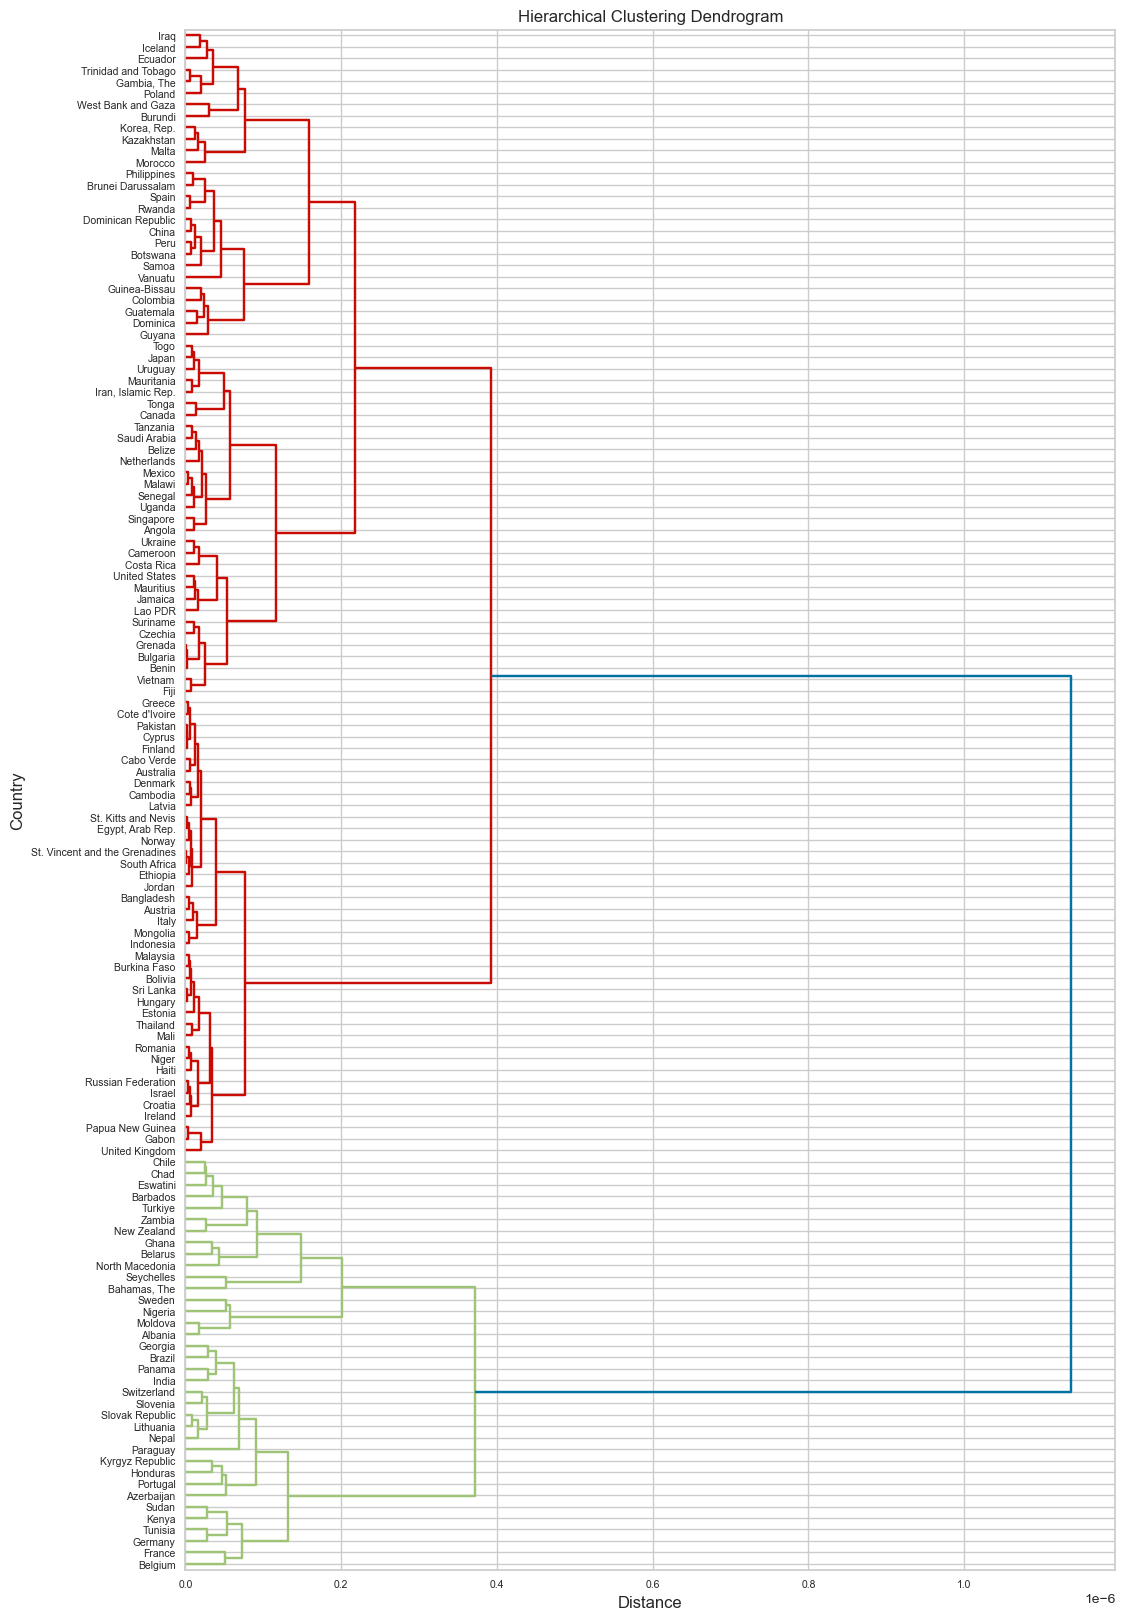

In [85]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Calculate the distance matrix using the 'euclidean' metric
distance_matrix = sch.distance.pdist(df_health_indicators_normalized_reduced, metric='euclidean')

# Perform hierarchical clustering using the 'ward' linkage method
# ward method minimalize the variance of clusters being merged at each step
Z = sch.linkage(distance_matrix, method='ward')

# Plot a dendrogram of the hierarchical clustering results
plt.figure(figsize=(12, 20))
sch.dendrogram(Z, labels=countries_full_names, orientation = 'right')
plt.xlabel('Distance')
plt.ylabel('Country')
plt.tick_params(axis='both', which='major', labelsize=7.5)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Wnioski


### Szukanie optymalnej liczby klustrów

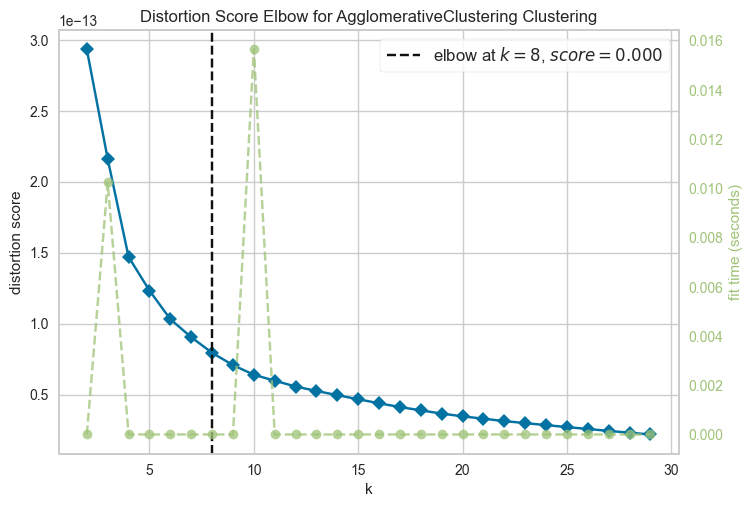

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [160]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering( metric='euclidean', linkage='ward')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df_health_indicators_normalized_reduced)        # Fit data to visualizer
visualizer.show() 

In [161]:
import numpy as np
from collections import Counter

# Perform hierarchical clustering using the 'ward' linkage method
n_clusters = 8
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
model.fit(df_health_indicators_normalized_reduced)
cluster_labels = model.labels_
cluster_counts = dict(Counter(cluster_labels))

for i in range(n_clusters):
    cluster_countries = [countries_full_names[j] for j in range(len(countries_full_names)) if cluster_labels[j] == i]
    num_countries = len(cluster_countries)
    print(f"Cluster {i+1}: {num_countries} countries\n{', '.join(cluster_countries)}\n")


Cluster 1: 20 countries
Azerbaijan, Belgium, Brazil, France, Georgia, Germany, Honduras, India, Kenya, Kyrgyz Republic, Lithuania, Nepal, Panama, Paraguay, Portugal, Slovak Republic, Slovenia, Sudan, Switzerland, Tunisia

Cluster 2: 31 countries
Angola, Belize, Benin, Bulgaria, Cameroon, Canada, Costa Rica, Czechia, Fiji, Grenada, Iran, Islamic Rep., Jamaica, Japan, Lao PDR, Malawi, Mauritania, Mauritius, Mexico, Netherlands, Saudi Arabia, Senegal, Singapore, Suriname, Tanzania, Togo, Tonga, Uganda, Ukraine, United States, Uruguay, Vietnam

Cluster 3: 40 countries
Australia, Austria, Bangladesh, Bolivia, Burkina Faso, Cabo Verde, Cambodia, Cote d'Ivoire, Croatia, Cyprus, Denmark, Egypt, Arab Rep., Estonia, Ethiopia, Finland, Gabon, Greece, Haiti, Hungary, Indonesia, Ireland, Israel, Italy, Jordan, Latvia, Malaysia, Mali, Mongolia, Niger, Norway, Pakistan, Papua New Guinea, Romania, Russian Federation, South Africa, Sri Lanka, St. Kitts and Nevis, St. Vincent and the Grenadines, Thailan

### Wskaźniki socjodemograficzne

In [163]:
wb.series.info(sociodemographic_indicators)

id                 value
-----------------  ----------------------------------------------------
SP.DYN.CDRT.IN     Death rate, crude (per 1,000 people)
SP.DYN.TFRT.IN     Fertility rate, total (births per woman)
SM.POP.NETM        Net migration
SP.POP.0014.TO.ZS  Population ages 0-14 (% of total population)
SP.POP.1564.TO.ZS  Population ages 15-64 (% of total population)
SP.POP.65UP.TO.ZS  Population ages 65 and above (% of total population)
SP.POP.GROW        Population growth (annual %)
SP.POP.TOTL.FE.ZS  Population, female (% of total population)
SP.URB.TOTL.IN.ZS  Urban population (% of total population)
                   9 elements

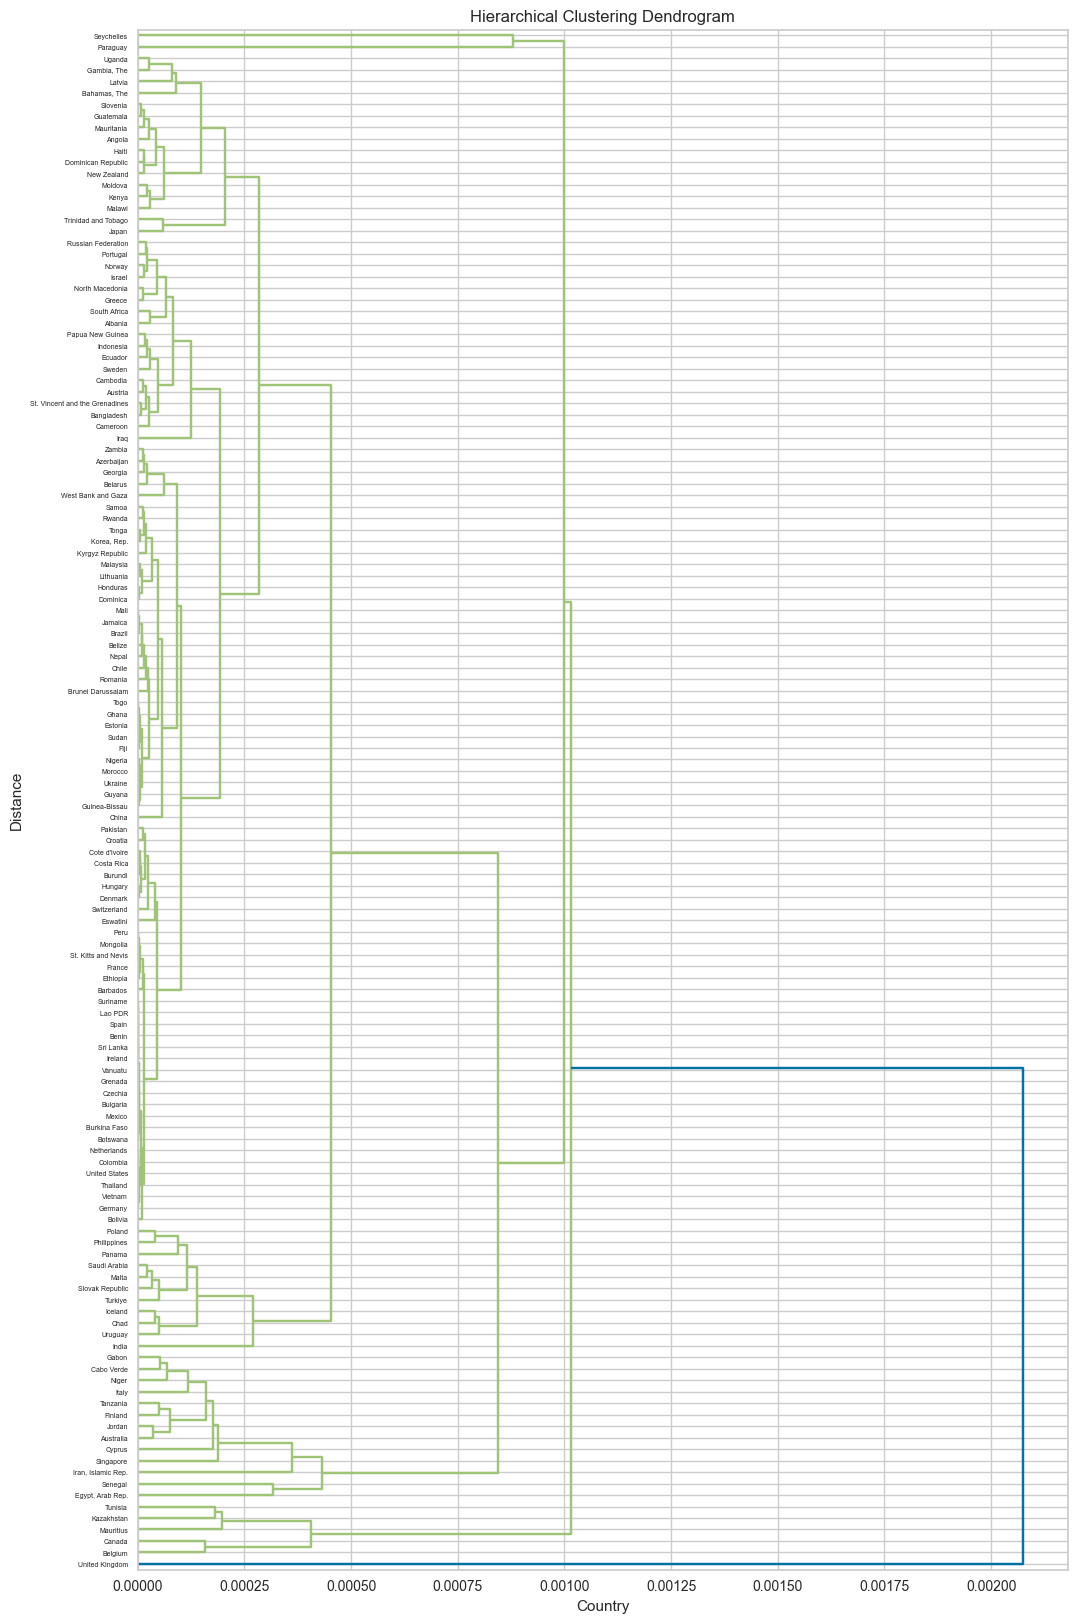

In [164]:
# Calculate the distance matrix using the 'euclidean' metric
distance_matrix_economic = sch.distance.pdist(df_sociodemographic_indicators_normalized_reduced, metric='euclidean')

# Perform hierarchical clustering using the 'ward' linkage method
# ward method minimalize the variance of clusters being merged at each step
Z = sch.linkage(distance_matrix_economic, method='ward')

# Plot a dendrogram of the hierarchical clustering results
plt.figure(figsize=(12, 20))
sch.dendrogram(Z, labels=countries_full_names, orientation = 'right')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Wnioski
* Wielka Brytania znajduje się w osobnym klastrze do reszty państw co oznacza że państwo to znacząco się wyróżnia od pozostałych



### Szukanie optymalnej liczby klustrów

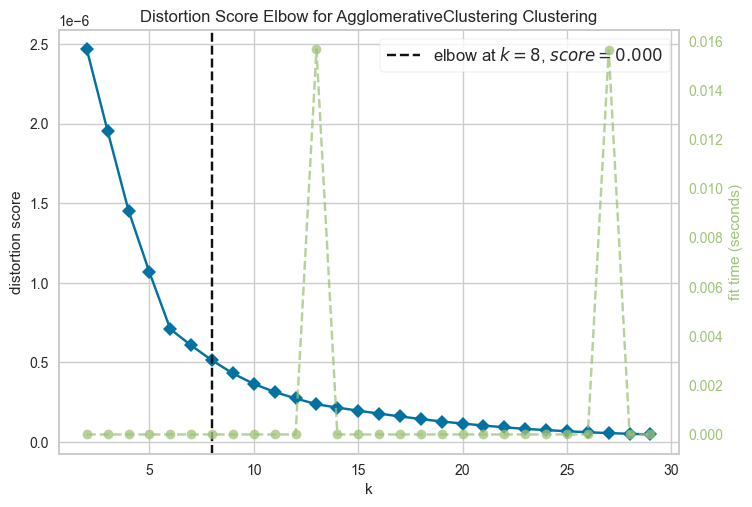

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [165]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering( metric='euclidean', linkage='ward')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df_sociodemographic_indicators_normalized_reduced)        # Fit data to visualizer
visualizer.show() 

In [166]:
import numpy as np
from collections import Counter

# Perform hierarchical clustering using the 'ward' linkage method
n_clusters = 8
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
model.fit(df_sociodemographic_indicators_normalized_reduced)
cluster_labels = model.labels_
cluster_counts = dict(Counter(cluster_labels))

for i in range(n_clusters):
    cluster_countries = [countries_full_names[j] for j in range(len(countries_full_names)) if cluster_labels[j] == i]
    num_countries = len(cluster_countries)
    print(f"Cluster {i+1}: {num_countries} countries\n{', '.join(cluster_countries)}\n")


Cluster 1: 5 countries
Belgium, Canada, Kazakhstan, Mauritius, Tunisia

Cluster 2: 2 countries
Egypt, Arab Rep., Senegal

Cluster 3: 11 countries
Australia, Cabo Verde, Cyprus, Finland, Gabon, Iran, Islamic Rep., Italy, Jordan, Niger, Singapore, Tanzania

Cluster 4: 1 countries
United Kingdom

Cluster 5: 1 countries
Paraguay

Cluster 6: 102 countries
Albania, Angola, Austria, Azerbaijan, Bahamas, The, Bangladesh, Barbados, Belarus, Belize, Benin, Bolivia, Botswana, Brazil, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Chile, China, Colombia, Costa Rica, Cote d'Ivoire, Croatia, Czechia, Denmark, Dominica, Dominican Republic, Ecuador, Estonia, Eswatini, Ethiopia, Fiji, France, Gambia, The, Georgia, Germany, Ghana, Greece, Grenada, Guatemala, Guinea-Bissau, Guyana, Haiti, Honduras, Hungary, Indonesia, Iraq, Ireland, Israel, Jamaica, Japan, Kenya, Korea, Rep., Kyrgyz Republic, Lao PDR, Latvia, Lithuania, Malawi, Malaysia, Mali, Mauritania, Mexico, Moldova, Mongoli

## KMeans na zredukowanych danych przez PCA

In [87]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def kmeans_five_clusters(X, countries):
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(X)
    labels = kmeans.labels_
    df_countrys = pd.DataFrame({'name': countries, 'color':labels})
    return df_countrys


def plot_map_five_clusters(df_countrys, title):
    countries = gpd.read_file("world_countries.geojson")

    k0 = [row['name'] for index, row in df_countrys.iterrows() if row['color'] == 0]
    k1 = [row['name'] for index, row in df_countrys.iterrows() if row['color'] == 1]
    k2 = [row['name'] for index, row in df_countrys.iterrows() if row['color'] == 2]
    k3 = [row['name'] for index, row in df_countrys.iterrows() if row['color'] == 3]
    k4 = [row['name'] for index, row in df_countrys.iterrows() if row['color'] == 4]

    conditions = [
        countries['ISO_A3'].isin(k0),
        countries['ISO_A3'].isin(k1),
        countries['ISO_A3'].isin(k2),
        countries['ISO_A3'].isin(k3),
        countries['ISO_A3'].isin(k4),
    ]
    values = [0, 1, 2, 3, 4]

    # Dodaj nową kolumnę na podstawie warunków i wartości
    countries['color'] = np.select(conditions, values, 5)

    print(k0)
    print(k1)
    print(k2)
    print(k3)
    print(k4)

    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_title('Tytuł wykresu', fontsize=30)
    countries.plot(ax=ax, cmap='Set1', column='color')
    ax.set_title(f'{title}')
    plt.show()

### Wszystkie wskaźniki

/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['ALB', 'AGO', 'AUS', 'AUT', 'AZE', 'BHS', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BOL', 'BWA', 'BRA', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'TCD', 'CHL', 'CHN', 'COL', 'CRI', 'CIV', 'HRV', 'CZE', 'DNK', 'DMA', 'DOM', 'ECU', 'EST', 'SWZ', 'ETH', 'FJI', 'FRA', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'ISL', 'IND', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KOR', 'KGZ', 'LAO', 'LVA', 'LTU', 'MWI', 'MYS', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR', 'NPL', 'NLD', 'NZL', 'NER', 'NGA', 'MKD', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'RWA', 'WSM', 'SAU', 'SEN', 'SYC', 'SGP', 'SVK', 'SVN', 'ESP', 'LKA', 'KNA', 'VCT', 'SDN', 'SUR', 'SWE', 'CHE', 'TZA', 'THA', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'UGA', 'UKR', 'USA', 'URY', 'VUT', 'VNM', 'PSE', 'ZMB']
['CAN']
['GBR']
['NOR']
['BGD', 'BRN', 'CPV', 'CYP', 'EGY', 'FIN', 'GAB', 'IDN', 'ZAF']


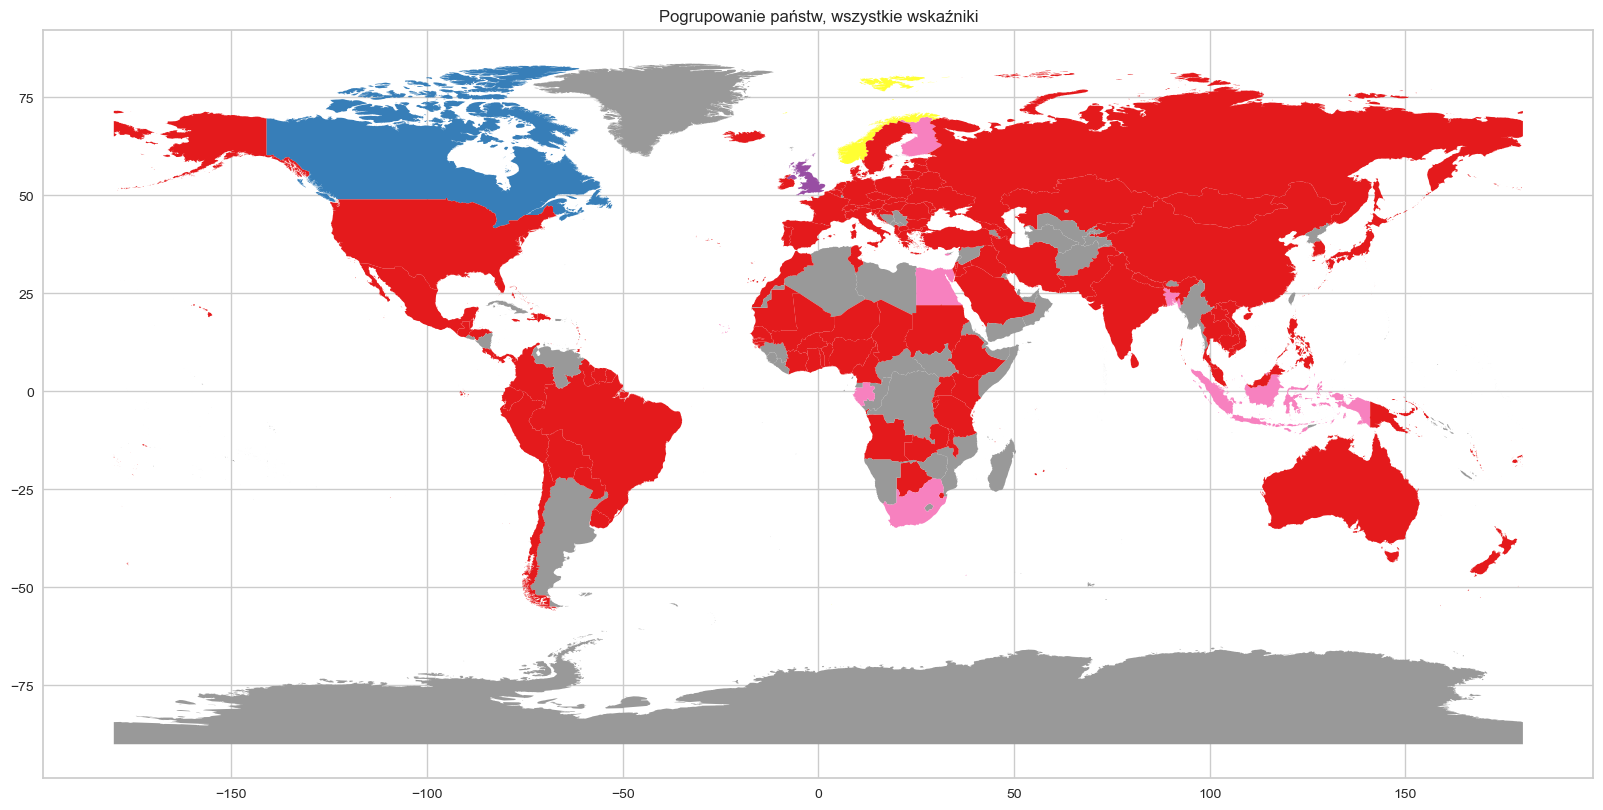

In [90]:
df_countrys = kmeans_five_clusters(df_all_indicators_normalized_reduced, countries)
plot_map_five_clusters(df_countrys, 'Pogrupowanie państw, wszystkie wskaźniki')

WNIOSKI:
* Wielka Brytania, Norwegia oraz Kanada znacząco się wyróżnia (osobne klastry)
* W kolejnej grupie Bangladesz, Brunei, Cabo, Cypr, Egipt, Finlandia, Gabon, Indonezja oraz Afryka Południowa. Szczególnie ciekawym wydaje się być w tym zestawieniu Finlandia jako kraj Europejski oraz leżący w znacznie innej strefie geograficznnej (z innym klimatem)
* Kolejny klaster reszta państw

In [91]:
wb.economy.info(['BGD', 'BRN', 'CPV', 'CYP', 'EGY', 'FIN', 'GAB', 'IDN', 'ZAF'])

id    value              region    incomeLevel
----  -----------------  --------  -------------
BGD   Bangladesh         SAS       LMC
BRN   Brunei Darussalam  EAS       HIC
CPV   Cabo Verde         SSF       LMC
CYP   Cyprus             ECS       HIC
EGY   Egypt, Arab Rep.   MEA       LMC
FIN   Finland            ECS       HIC
GAB   Gabon              SSF       UMC
IDN   Indonesia          EAS       LMC
ZAF   South Africa       SSF       UMC
      9 elements

### Wskaźniki ekonomiczne

/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['ALB', 'AGO', 'AUS', 'AUT', 'AZE', 'BHS', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BOL', 'BWA', 'BRA', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'TCD', 'CHL', 'CHN', 'COL', 'CRI', 'CIV', 'HRV', 'CZE', 'DNK', 'DMA', 'DOM', 'ECU', 'EST', 'SWZ', 'ETH', 'FJI', 'FRA', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'ISL', 'IND', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KOR', 'KGZ', 'LAO', 'LVA', 'LTU', 'MWI', 'MYS', 'MLI', 'MLT', 'MRT', 'MEX', 'MDA', 'MNG', 'MAR', 'NPL', 'NLD', 'NZL', 'NER', 'NGA', 'MKD', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'RWA', 'WSM', 'SAU', 'SEN', 'SYC', 'SGP', 'SVK', 'SVN', 'ESP', 'LKA', 'KNA', 'VCT', 'SDN', 'SUR', 'SWE', 'CHE', 'TZA', 'THA', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'UGA', 'UKR', 'USA', 'URY', 'VUT', 'VNM', 'PSE', 'ZMB']
['GBR']
['CAN']
['BGD', 'BRN', 'CPV', 'CYP', 'EGY', 'FIN', 'GAB', 'IDN', 'MUS', 'ZAF']
['NOR']


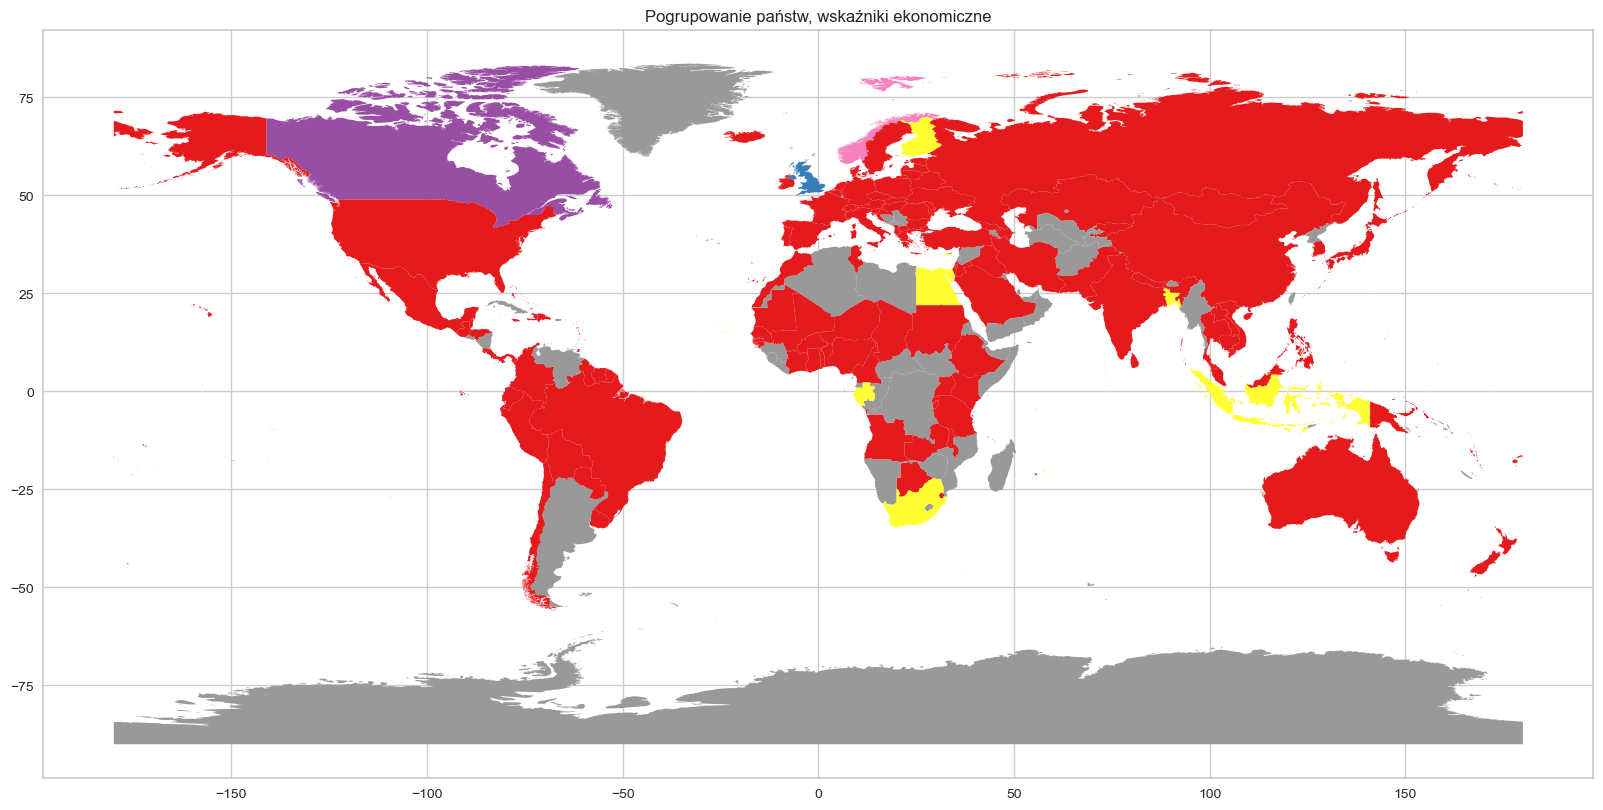

In [92]:
df_countrys = kmeans_five_clusters(df_economic_indicators_normalized_reduced, countries)
plot_map_five_clusters(df_countrys, 'Pogrupowanie państw, wskaźniki ekonomiczne')

WNIOSKI:
wyniki takie same jak we wszystkich wskaźnikach

### Wskaźniki zdrowotne

/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['AGO', 'BLZ', 'BEN', 'BGR', 'CMR', 'CAN', 'CZE', 'FJI', 'GMB', 'GRD', 'IRN', 'JPN', 'KAZ', 'KOR', 'LAO', 'MWI', 'MLT', 'MRT', 'MEX', 'MAR', 'NLD', 'POL', 'SAU', 'SEN', 'SGP', 'SUR', 'TZA', 'TGO', 'TON', 'TTO', 'UGA', 'UKR', 'URY', 'VNM']
['AZE', 'BHS', 'BRB', 'BEL', 'BRA', 'FRA', 'GEO', 'DEU', 'HND', 'IND', 'KEN', 'KGZ', 'LTU', 'NPL', 'PAN', 'PRY', 'PRT', 'SYC', 'SVK', 'SVN', 'SDN', 'CHE', 'TUN']
['ALB', 'BLR', 'TCD', 'CHL', 'SWZ', 'GHA', 'MDA', 'NZL', 'NGA', 'MKD', 'SWE', 'TUR', 'ZMB']
['BWA', 'BRN', 'BDI', 'CHN', 'COL', 'CRI', 'DMA', 'DOM', 'ECU', 'GTM', 'GNB', 'GUY', 'ISL', 'IRQ', 'JAM', 'MUS', 'PER', 'PHL', 'RWA', 'WSM', 'ESP', 'USA', 'VUT', 'PSE']
['AUS', 'AUT', 'BGD', 'BOL', 'BFA', 'CPV', 'KHM', 'CIV', 'HRV', 'CYP', 'DNK', 'EGY', 'EST', 'ETH', 'FIN', 'GAB', 'GRC', 'HTI', 'HUN', 'IDN', 'IRL', 'ISR', 'ITA', 'JOR', 'LVA', 'MYS', 'MLI', 'MNG', 'NER', 'NOR', 'PAK', 'PNG', 'ROU', 'RUS', 'ZAF', 'LKA', 'KNA', 'VCT', 'THA', 'GBR']


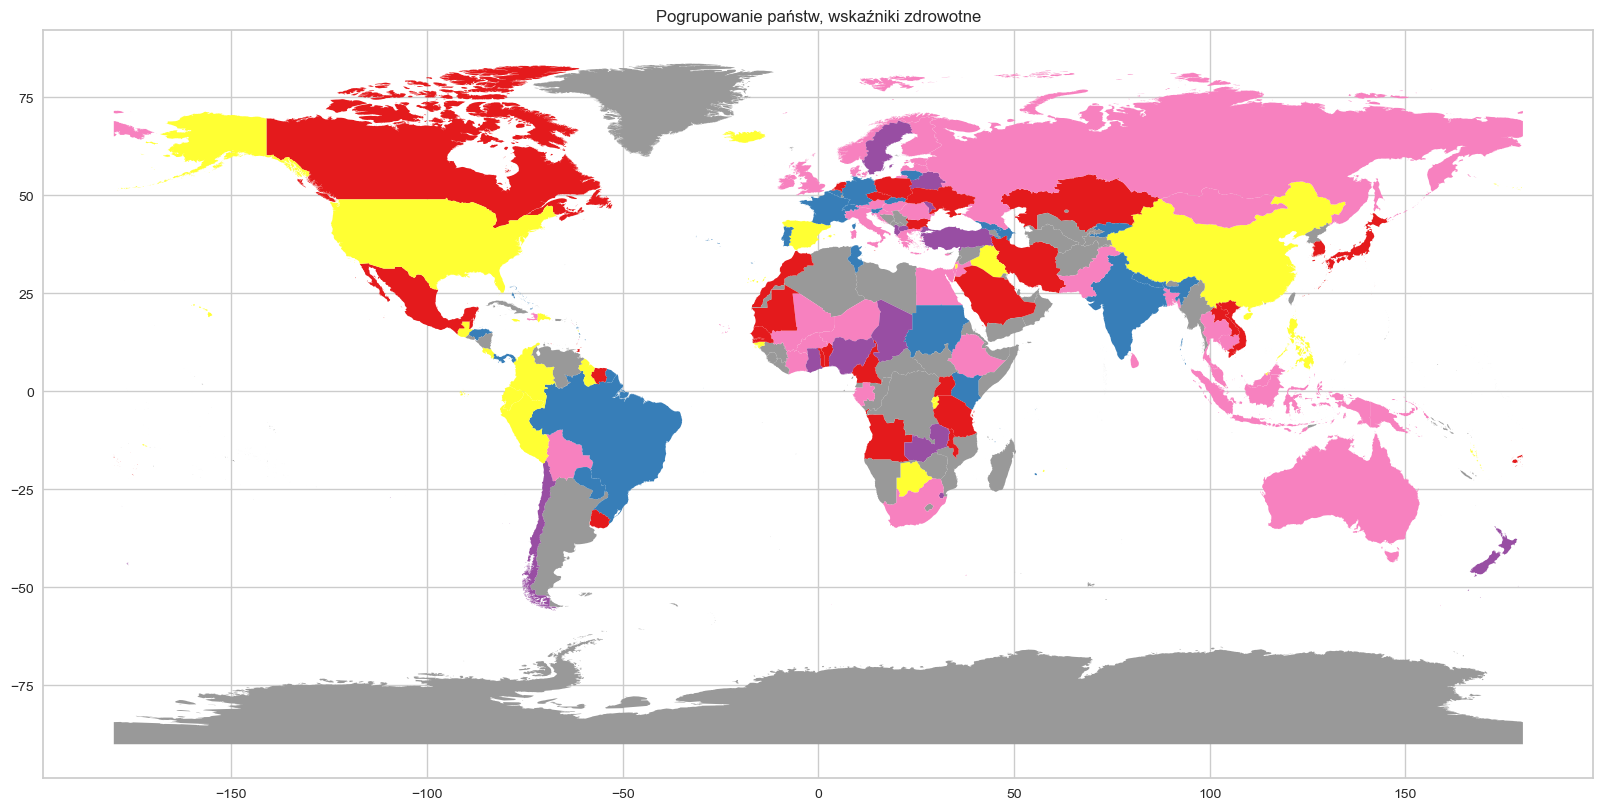

In [93]:
df_countrys = kmeans_five_clusters(df_health_indicators_normalized_reduced, countries)
plot_map_five_clusters(df_countrys, 'Pogrupowanie państw, wskaźniki zdrowotne')

### Wskaźniki socjo-demograficzne

/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['ALB', 'AGO', 'AUT', 'AZE', 'BHS', 'BGD', 'BRB', 'BLR', 'BLZ', 'BEN', 'BOL', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'TCD', 'CHL', 'CHN', 'COL', 'CRI', 'CIV', 'HRV', 'CZE', 'DNK', 'DMA', 'DOM', 'ECU', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN', 'FRA', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'ISL', 'IDN', 'IRQ', 'IRL', 'ISR', 'JAM', 'KAZ', 'KEN', 'KOR', 'KGZ', 'LAO', 'LVA', 'LTU', 'MWI', 'MYS', 'MLI', 'MLT', 'MRT', 'MEX', 'MDA', 'MNG', 'MAR', 'NPL', 'NLD', 'NZL', 'NGA', 'MKD', 'NOR', 'PAK', 'PNG', 'PER', 'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'RWA', 'WSM', 'SAU', 'SYC', 'SVK', 'SVN', 'ZAF', 'ESP', 'LKA', 'KNA', 'VCT', 'SDN', 'SUR', 'SWE', 'CHE', 'TZA', 'THA', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'UGA', 'UKR', 'USA', 'URY', 'VUT', 'VNM', 'PSE', 'ZMB']
['PRY']
['GBR']
['BEL', 'CAN', 'IND', 'MUS', 'PAN']
['AUS', 'CPV', 'CYP', 'EGY', 'GAB', 'IRN', 'ITA', 'JPN', 'JOR', 'NER', 'SEN', 'SGP']


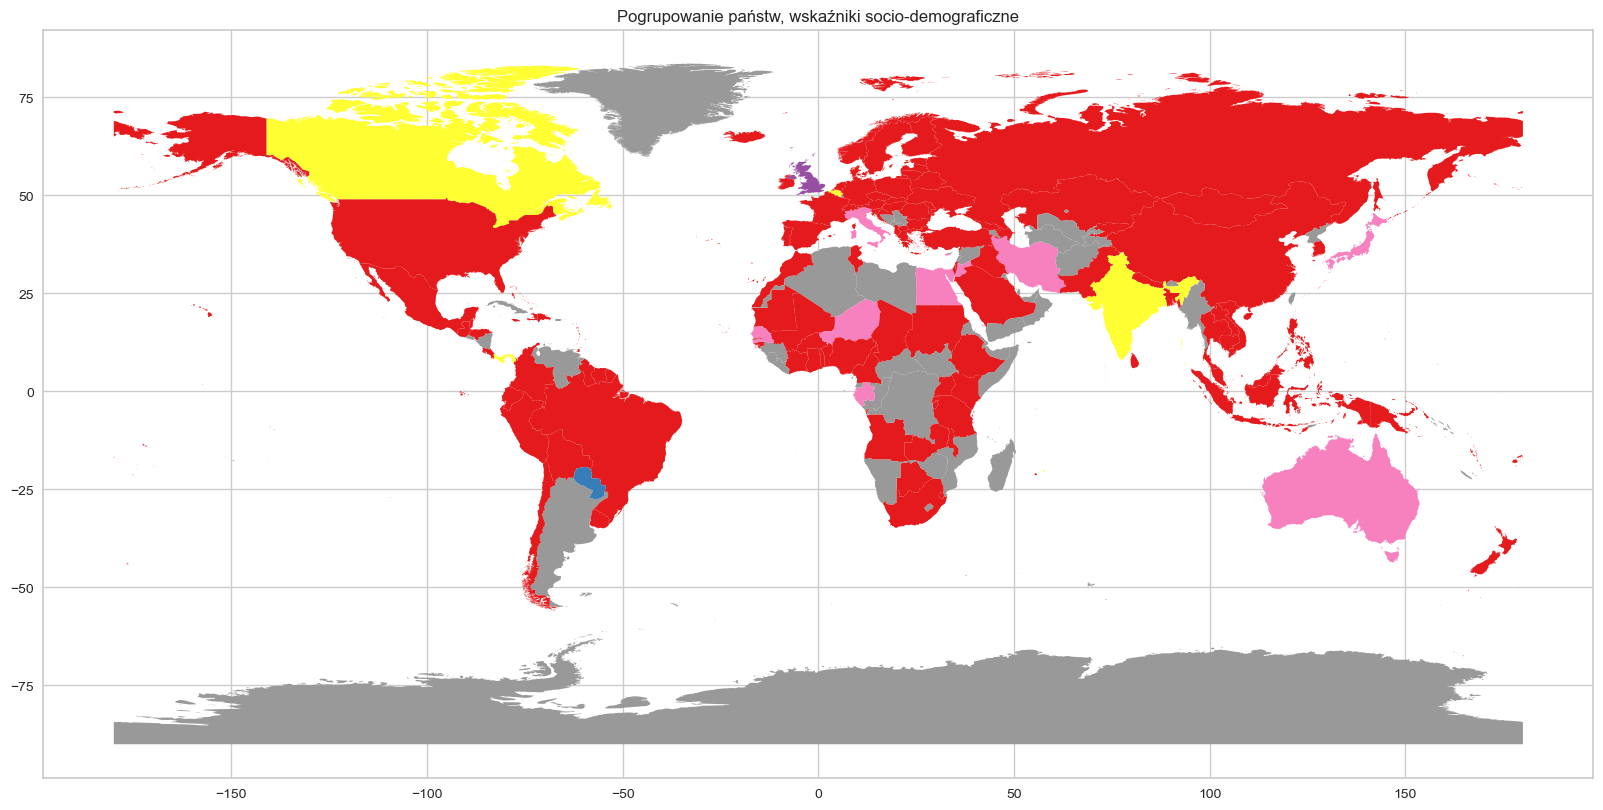

In [94]:
df_countrys = kmeans_five_clusters(df_sociodemographic_indicators_reduced, countries)
plot_map_five_clusters(df_countrys, 'Pogrupowanie państw, wskaźniki socio-demograficzne')

## Transformata Fouriera Test

In [96]:
df_melted = df_filled.reset_index(level=['economy','series'])
def make_ftt(df_melted, indicators):
    output_df = pd.DataFrame()
    for indicator in indicators:
        data_frame = df_melted.loc[df_melted['series'] == indicator]
        temp = []
        for i in range(data_frame.shape[0]):
            df_new = data_frame.iloc[[i], 2:]
            y = df_new.values
            y = y.reshape(-1)

            # apply fast fourier transform and take absolute values
            f=abs(np.fft.fft(y))

            # get the list of spectrums
            spectrum=f.real*f.real+f.imag*f.imag
            nspectrum=spectrum/spectrum[0]
            temp.append(nspectrum)
        df_ftt = pd.DataFrame(temp)
        # Dodanie DataFrame'u jako kolejnych kolumn do istniejącego DataFrame'u
        output_df = pd.concat([output_df, df_ftt], axis=1)

    return output_df

def visualize_FFT_on_map(df_melted, indicators, pca_components_number, countries, title ):
    df_fft = make_ftt(df_melted, indicators)
    pca = PCA(n_components=pca_components_number)
    df_ftt_reduced = pca.fit_transform(df_fft.values)
    df_countrys = kmeans_five_clusters(df_ftt_reduced, countries)
    plot_map_five_clusters(df_countrys, title)

### Wszystkie wskaźniki

/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['ALB', 'AUS', 'AUT', 'BHS', 'BGD', 'BRB', 'BEL', 'BLZ', 'BEN', 'BOL', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'TCD', 'CHL', 'CHN', 'COL', 'CRI', 'CIV', 'HRV', 'CYP', 'CZE', 'DNK', 'DMA', 'DOM', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRD', 'GTM', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KOR', 'KGZ', 'LAO', 'LVA', 'LTU', 'MWI', 'MYS', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR', 'NPL', 'NLD', 'NZL', 'NER', 'NGA', 'MKD', 'NOR', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'RWA', 'WSM', 'SAU', 'SEN', 'SYC', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'LKA', 'KNA', 'VCT', 'SDN', 'SWE', 'CHE', 'TZA', 'THA', 'TGO', 'TON', 'TTO', 'TUN', 'UGA', 'UKR', 'GBR', 'USA', 'URY', 'VUT', 'VNM', 'PSE', 'ZMB']
['SUR']
['EGY', 'IRQ']
['AZE', 'BLR', 'ECU', 'GRC', 'TUR']
['AGO']


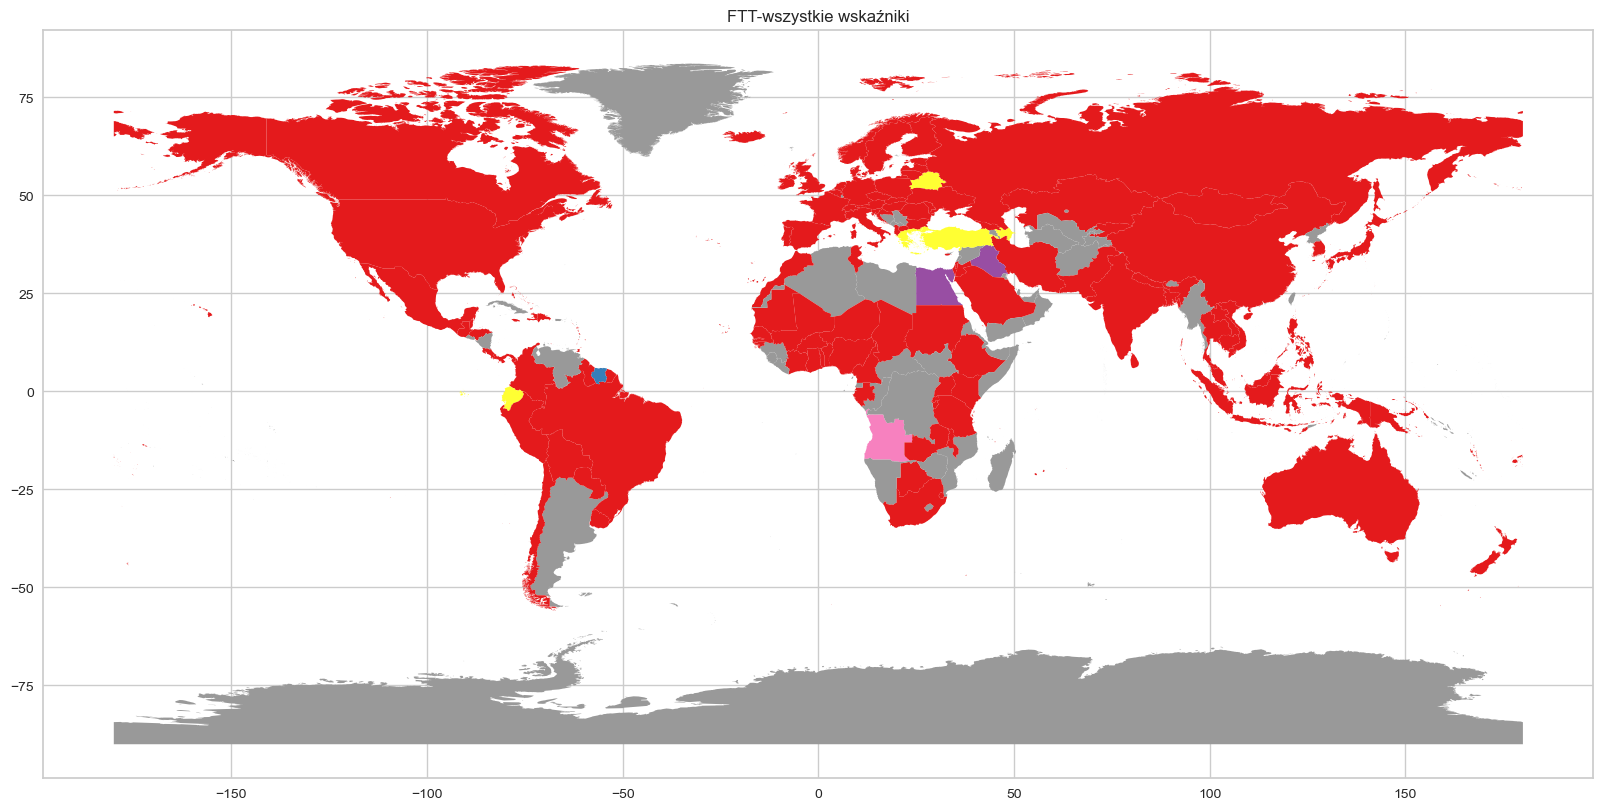

In [97]:
visualize_FFT_on_map(df_melted, all_indicators, 15, countries, 'FTT-wszystkie wskaźniki')

# Wskaźniki ekonomiczne

/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['ALB', 'AUS', 'AZE', 'BHS', 'BGD', 'BLR', 'BEL', 'BLZ', 'BEN', 'BOL', 'BWA', 'BRA', 'BRN', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'TCD', 'CHL', 'CHN', 'COL', 'CRI', 'CIV', 'HRV', 'CYP', 'CZE', 'DNK', 'DMA', 'DOM', 'ECU', 'EGY', 'EST', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JOR', 'KAZ', 'KEN', 'KOR', 'KGZ', 'LAO', 'LVA', 'LTU', 'MWI', 'MYS', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR', 'NPL', 'NLD', 'NZL', 'NER', 'NGA', 'MKD', 'NOR', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'RWA', 'WSM', 'SAU', 'SEN', 'SYC', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'LKA', 'KNA', 'VCT', 'SDN', 'SWE', 'TZA', 'THA', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'UGA', 'UKR', 'GBR', 'USA', 'URY', 'VUT', 'VNM', 'ZMB']
['SUR']
['AGO']
['BRB', 'BGR', 'SWZ', 'JPN', 'PSE']
['AUT', 'ISL', 'CHE']


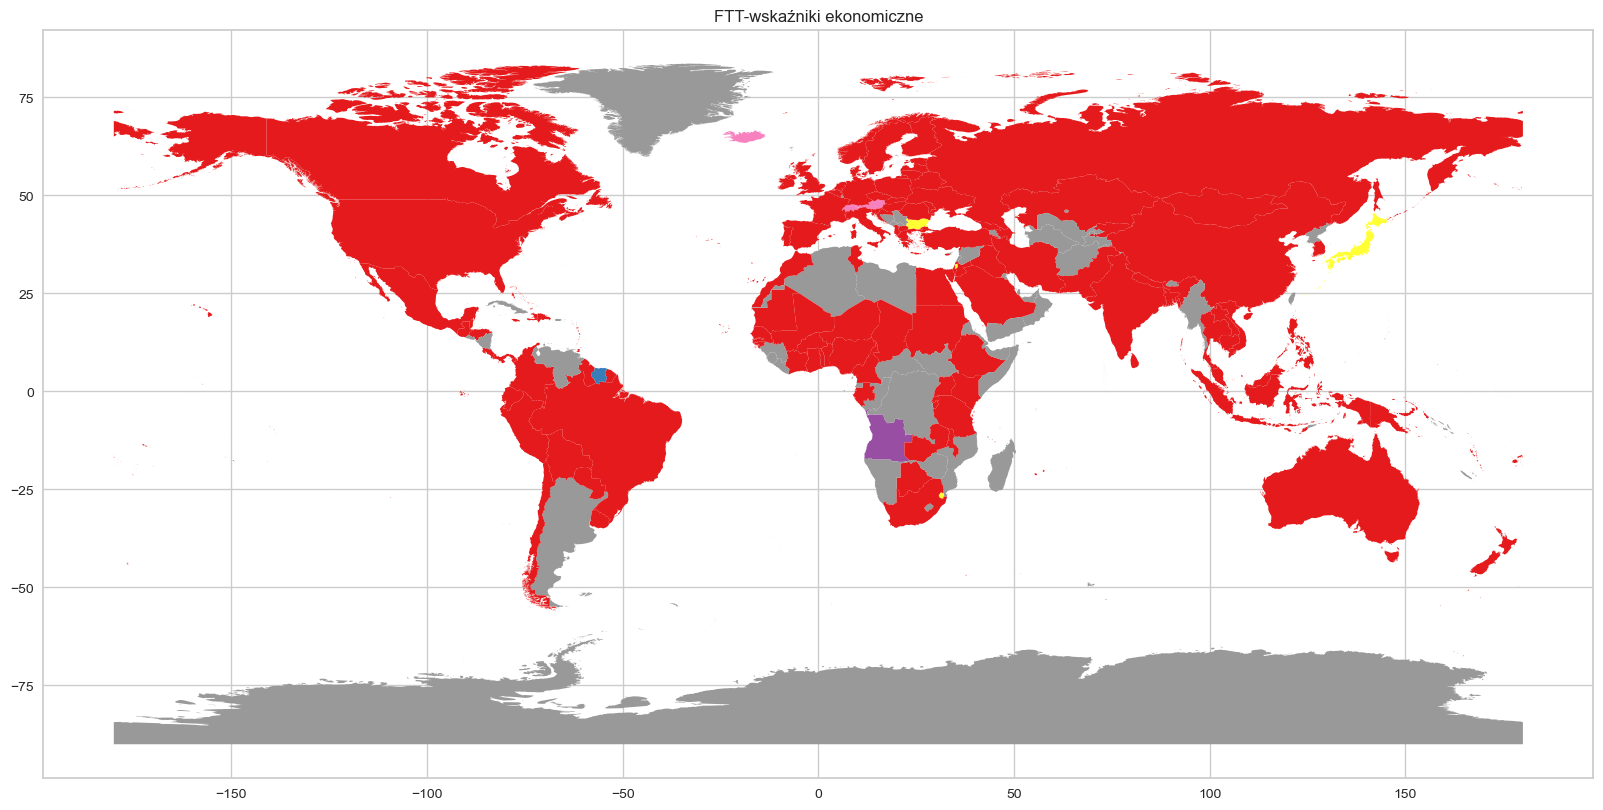

In [98]:
visualize_FFT_on_map(df_melted, economic_indicators, 15, countries, 'FTT-wskaźniki ekonomiczne')

### Wskaźniki Zdrowotne

C:\Users\szcze\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['AUS', 'AUT', 'BHS', 'BRB', 'BEL', 'BLZ', 'BEN', 'BRN', 'BFA', 'CMR', 'CAN', 'TCD', 'CHL', 'COL', 'CRI', 'CIV', 'DNK', 'DOM', 'SWZ', 'FJI', 'FRA', 'GAB', 'GMB', 'DEU', 'GHA', 'GRD', 'GUY', 'HTI', 'IRQ', 'ITA', 'JAM', 'JOR', 'MYS', 'MLI', 'MLT', 'MUS', 'NLD', 'NZL', 'NER', 'NGA', 'MKD', 'PAK', 'PAN', 'PNG', 'PRY', 'PHL', 'WSM', 'SGP', 'SVK', 'ESP', 'KNA', 'VCT', 'SDN', 'SUR', 'SWE', 'CHE', 'TGO', 'TON', 'TTO', 'GBR', 'USA', 'VUT', 'VNM', 'PSE']
['SYC']
['AGO', 'BGD', 'BOL', 'BWA', 'BRA', 'BGR', 'BDI', 'CPV', 'HRV', 'CZE', 'DMA', 'ECU', 'EGY', 'ETH', 'FIN', 'GRC', 'GTM', 'GNB', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL', 'ISR', 'JPN', 'KEN', 'KGZ', 'LAO', 'LTU', 'MRT', 'MEX', 'MDA', 'MAR', 'NPL', 'NOR', 'POL', 'PRT', 'SEN', 'SVN', 'ZAF', 'LKA', 'TZA', 'THA', 'TUN', 'UGA', 'UKR', 'URY', 'ZMB']
['BLR', 'CHN', 'EST', 'GEO', 'KAZ']
['ALB', 'AZE', 'KHM', 'CYP', 'KOR', 'LVA', 'MWI', 'MNG', 'PER', 'ROU', 'RUS', 'RWA', 'SAU', 'TUR']


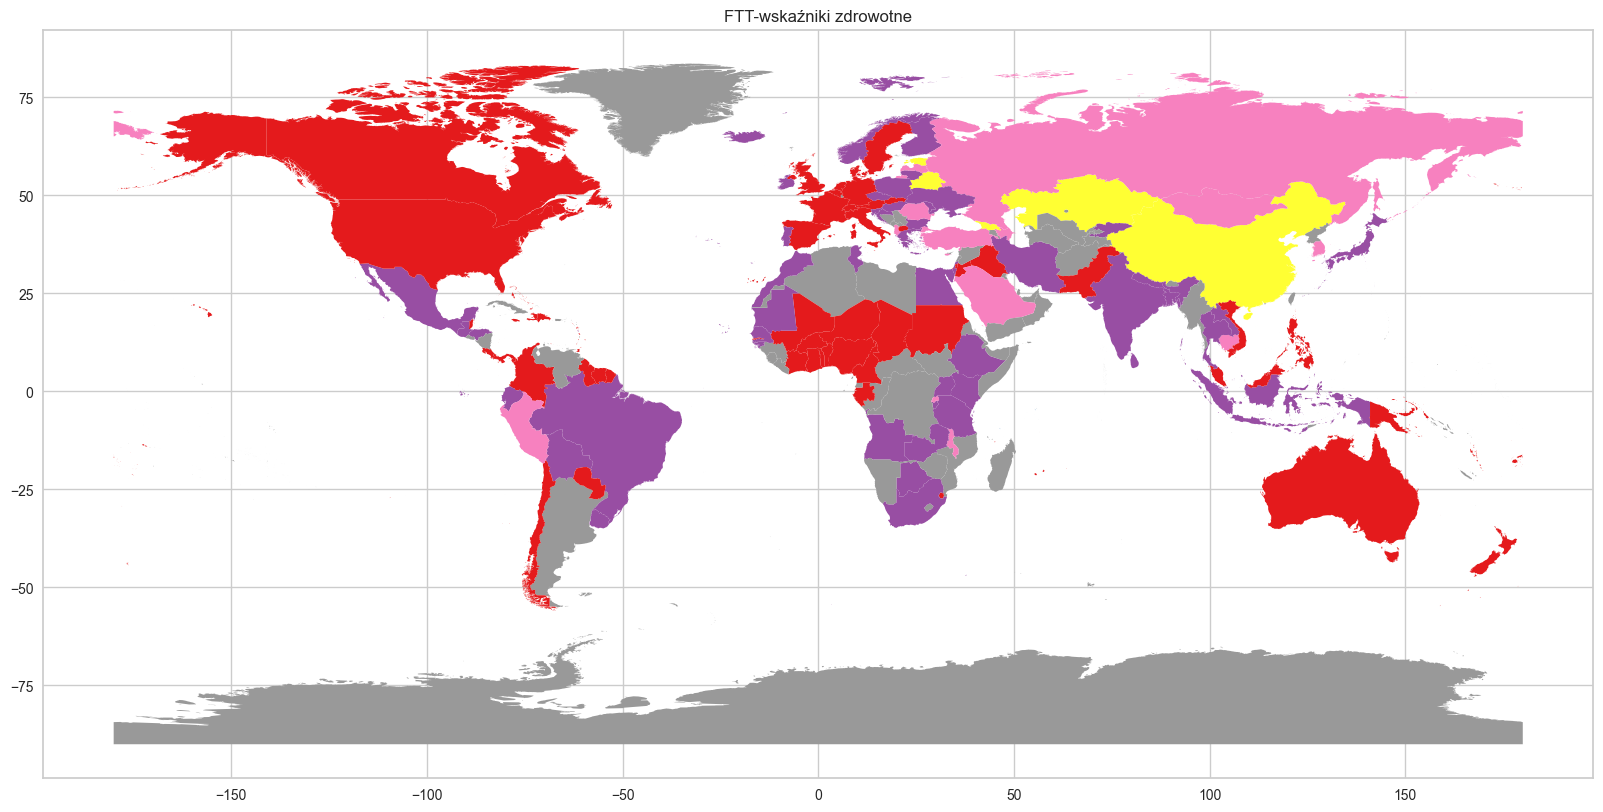

In [209]:
visualize_FFT_on_map(df_melted, health_indicators, 15, countries, 'FTT-wskaźniki zdrowotne')

### Wskaźniki socjo-demograficzne

C:\Users\szcze\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['ALB', 'AGO', 'AUS', 'AUT', 'BHS', 'BGD', 'BRB', 'BEL', 'BLZ', 'BEN', 'BOL', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'TCD', 'CHL', 'CHN', 'COL', 'CRI', 'CIV', 'HRV', 'CYP', 'CZE', 'DNK', 'DMA', 'DOM', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRD', 'GTM', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KOR', 'KGZ', 'LAO', 'LVA', 'LTU', 'MWI', 'MYS', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR', 'NPL', 'NLD', 'NZL', 'NER', 'NGA', 'MKD', 'NOR', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'PRT', 'ROU', 'RUS', 'RWA', 'WSM', 'SAU', 'SEN', 'SYC', 'SGP', 'SVK', 'SVN', 'ESP', 'LKA', 'KNA', 'VCT', 'SDN', 'SUR', 'SWE', 'CHE', 'TZA', 'THA', 'TGO', 'TON', 'TTO', 'TUN', 'UGA', 'UKR', 'GBR', 'USA', 'URY', 'VUT', 'VNM', 'PSE', 'ZMB']
['POL', 'ZAF']
['ECU', 'GRC']
['EGY', 'IRQ']
['AZE', 'BLR', 'TUR']


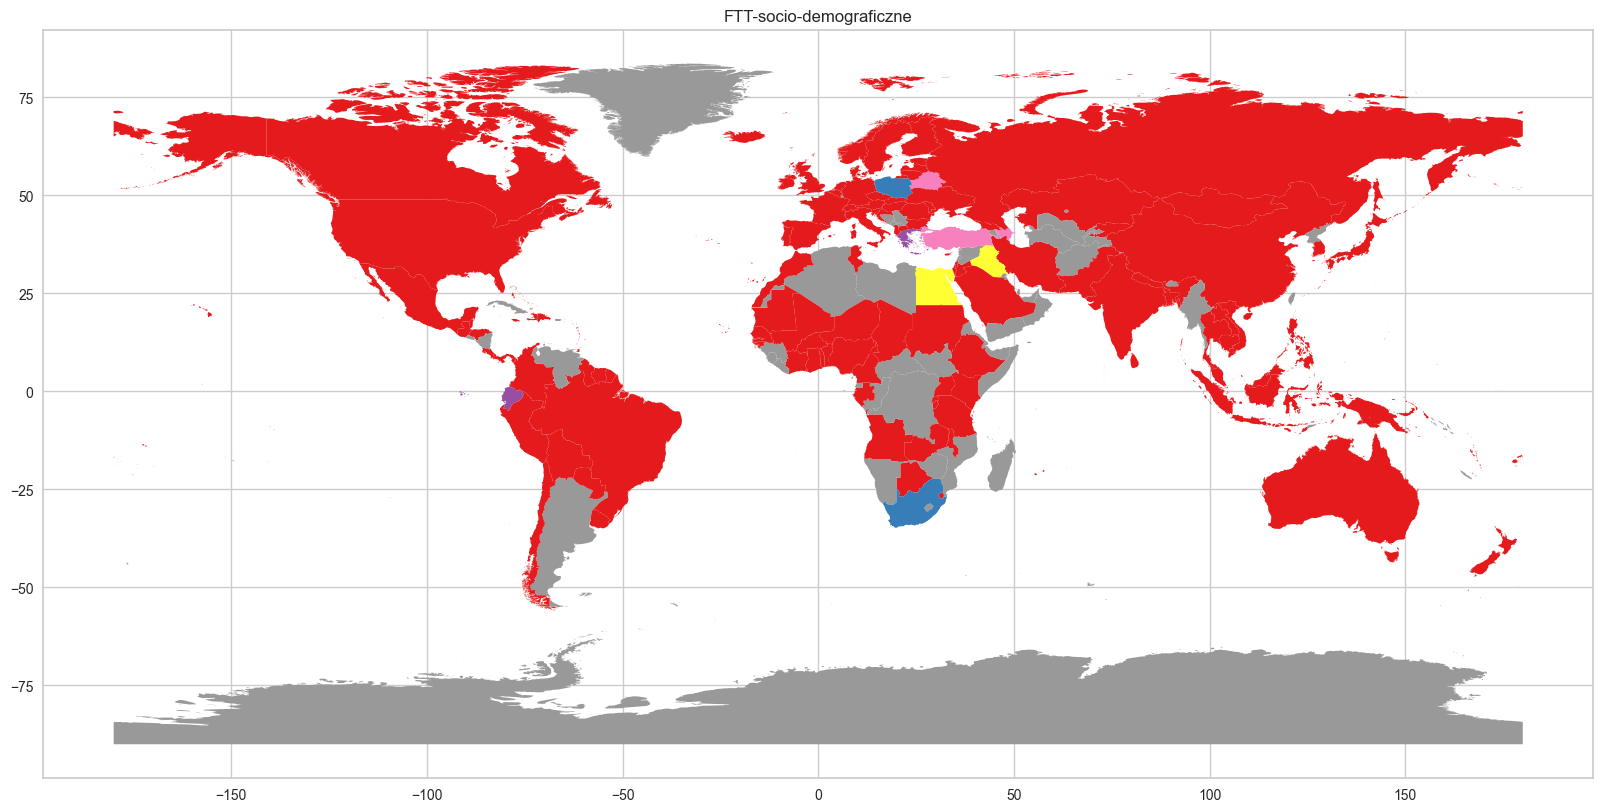

In [210]:
visualize_FFT_on_map(df_melted, sociodemographic_indicators, 15, countries, 'FTT-socio-demograficzne')

## MDS

### Wszystkie wskaźniki

In [99]:
num_countries = len(countries)
distances = np.zeros((num_countries, num_countries))

# Perform DTW on all pairs of time series
for i, c1 in enumerate(countries):
    ts1 = df_scaled.loc[c1].values.T
    for j, c2 in enumerate(countries):
        ts2 = df_scaled.loc[c2].values.T
        d, _ = fastdtw(ts1, ts2, dist=euclidean)
        distances[i, j] = d
        distances[j, i] = d

In [100]:
from sklearn.manifold import MDS

# Create an instance of MDS
mds = MDS(n_components=2, random_state=0)

# Apply MDS to the distance matrix
embedding = mds.fit_transform(distances)

# The 'embedding' variable now contains the coordinates of each data point in the reduced 2D space

# Access the coordinates of the points
x_coords = embedding[:, 0]
y_coords = embedding[:, 1]

/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


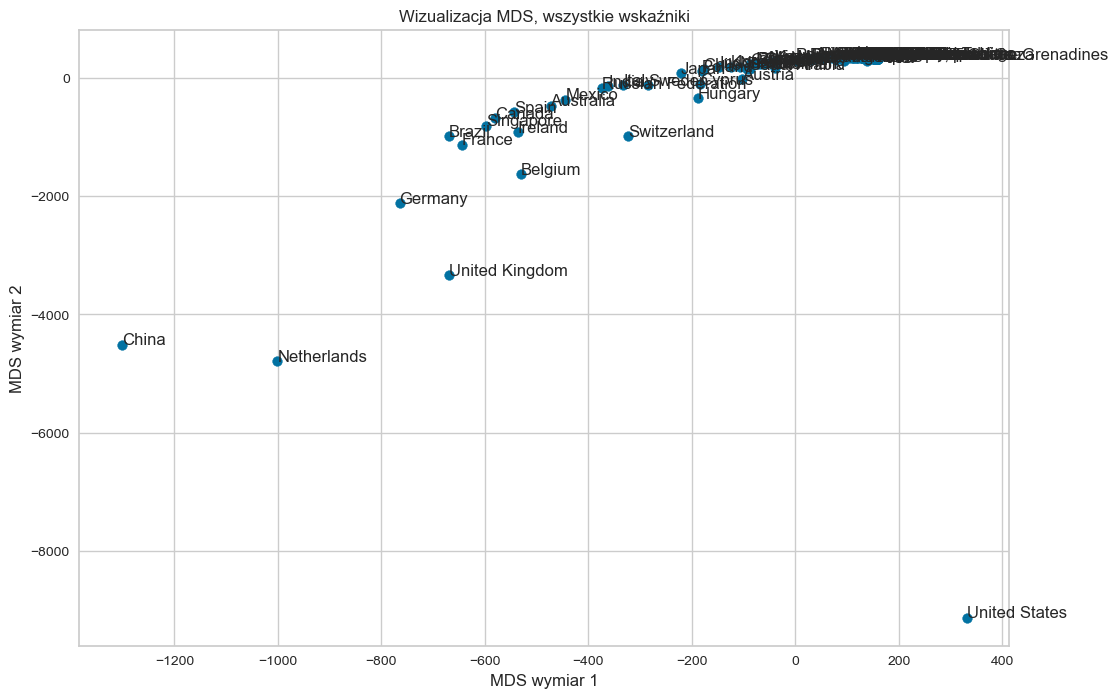

In [102]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x_coords, y_coords)

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (x_coords[i], y_coords[i]))

plt.xlabel('MDS wymiar 1')
plt.ylabel('MDS wymiar 2')
plt.title('Wizualizacja MDS, wszystkie wskaźniki')
plt.show()

### Wskaźniki ekonomiczne

In [103]:
df_scaled.index

MultiIndex([('ALB', 'BX.KLT.DINV.CD.WD'),
            ('ALB',    'FP.CPI.TOTL.ZG'),
            ('ALB',    'NV.AGR.TOTL.ZS'),
            ('ALB',    'NV.IND.TOTL.ZS'),
            ('ALB',    'NY.GDP.PCAP.CD'),
            ('ALB',       'SH.DYN.MORT'),
            ('ALB',       'SH.DYN.NMRT'),
            ('ALB',       'SH.IMM.IDPT'),
            ('ALB',       'SH.IMM.MEAS'),
            ('ALB',       'SM.POP.NETM'),
            ...
            ('ZMB', 'SP.DYN.LE00.FE.IN'),
            ('ZMB',    'SP.DYN.LE00.IN'),
            ('ZMB', 'SP.DYN.LE00.MA.IN'),
            ('ZMB',    'SP.DYN.TFRT.IN'),
            ('ZMB', 'SP.POP.0014.TO.ZS'),
            ('ZMB', 'SP.POP.1564.TO.ZS'),
            ('ZMB', 'SP.POP.65UP.TO.ZS'),
            ('ZMB',       'SP.POP.GROW'),
            ('ZMB', 'SP.POP.TOTL.FE.ZS'),
            ('ZMB', 'SP.URB.TOTL.IN.ZS')],
           names=['economy', 'series'], length=3216)

In [104]:
country = 'AZE'
indicator = 'BX.KLT.DINV.CD.WD'

# Extract the time series data
data = df_scaled.loc[(country, economic_indicators),:]
data

YR1996    YR1997    YR1998    YR1999    YR2000  \
economy series                                                                
AZE     BX.KLT.DINV.CD.WD  0.240612  0.364583  0.175003  0.023317 -0.036903   
        NV.IND.TOTL.ZS    -0.057533 -0.058187 -0.051664 -0.051555 -0.052027   
        FP.CPI.TOTL.ZG    -0.057533 -0.058187 -0.051664 -0.051555 -0.052027   
        NV.AGR.TOTL.ZS    -0.057533 -0.058187 -0.051664 -0.051555 -0.052027   
        NY.GDP.PCAP.CD    -0.057533 -0.058187 -0.051664 -0.051555 -0.052027   

                             YR2001    YR2002    YR2003    YR2004    YR2005  \
economy series                                                                
AZE     BX.KLT.DINV.CD.WD  0.134550  0.550556  1.251339  0.852281  0.556693   
        NV.IND.TOTL.ZS    -0.062035 -0.067752 -0.068302 -0.054957 -0.063624   
        FP.CPI.TOTL.ZG    -0.062035 -0.067752 -0.068302 -0.054958 -0.063624   
        NV.AGR.TOTL.ZS    -0.062035 -0.067752 -0.068302 -0.054958 -0.063624   
        NY.GDP.PCAP.CD    -0.062035 -0.067752 -0.068301 -0.054957 -0.063624   

                             YR2006    YR2007    YR2008    YR2009    YR2010  \
economy series                                                                
AZE     BX.KLT.DINV.CD.WD  0.385015  0.233411  0.326519  0.503784  0.364861   
        NV.IND.TOTL.ZS    -0.061628 -0.057495 -0.069203 -0.076033 -0.065540   
        FP.CPI.TOTL.ZG    -0.061628 -0.057495 -0.069203 -0.076033 -0.065540   
        NV.AGR.TOTL.ZS    -0.061628 -0.057495 -0.069203 -0.076033 -0.065540   
        NY.GDP.PCAP.CD    -0.061627 -0.057495 -0.069202 -0.076032 -0.065540   

                             YR2011    YR2012    YR2013    YR2014    YR2015  \
economy series                                                                
AZE     BX.KLT.DINV.CD.WD  0.379545  0.570915  0.203921  0.505468  0.260507   
        NV.IND.TOTL.ZS    -0.064343 -0.067193 -0.058013 -0.065427 -0.054522   
        FP.CPI.TOTL.ZG    -0.064343 -0.067193 -0.058013 -0.065427 -0.054522   
        NV.AGR.TOTL.ZS    -0.064343 -0.067193 -0.058013 -0.065427 -0.054522   
        NY.GDP.PCAP.CD    -0.064342 -0.067192 -0.058013 -0.065426 -0.054522   

                             YR2016    YR2017    YR2018    YR2019    YR2020  
economy series                                                               
AZE     BX.KLT.DINV.CD.WD  0.302361  0.232172  0.115187  0.134509  0.022864  
        NV.IND.TOTL.ZS    -0.060324 -0.062370 -0.027149 -0.061854 -0.030448  
        FP.CPI.TOTL.ZG    -0.060324 -0.062370 -0.027149 -0.061854 -0.030448  
        NV.AGR.TOTL.ZS    -0.060324 -0.062370 -0.027149 -0.061854 -0.030448  
        NY.GDP.PCAP.CD    -0.060324 -0.062370 -0.027149 -0.061854 -0.030448

In [105]:
distances = np.zeros((num_countries, num_countries))

# Perform DTW on all pairs of time series
for i, c1 in enumerate(countries):
    ts1 = df_scaled.loc[(c1, economic_indicators),:].values.T
    for j, c2 in enumerate(countries):
        ts2 = df_scaled.loc[(c2, economic_indicators),:].values.T
        d, _ = fastdtw(ts1, ts2, dist=euclidean)
        distances[i, j] = d
        distances[j, i] = d

In [106]:
distances

array([[  0.        ,   9.7079219 , 101.21071824, ...,  18.89150691,
          1.88311692,   1.02772071],
       [  9.7079219 ,   0.        ,  99.73132805, ...,  19.00061044,
          9.00488223,   9.39063955],
       [101.21071824,  99.73132805,   0.        , ...,  68.68794399,
        102.73746377, 101.00255665],
       ...,
       [ 18.89150691,  19.00061044,  68.68794399, ...,   0.        ,
         20.6990196 ,  18.66949309],
       [  1.88311692,   9.00488223, 102.73746377, ...,  20.6990196 ,
          0.        ,   1.90843116],
       [  1.02772071,   9.39063955, 101.00255665, ...,  18.66949309,
          1.90843116,   0.        ]])

In [107]:
# Create an instance of MDS
mds = MDS(n_components=2, random_state=0)

# Apply MDS to the distance matrix
embedding = mds.fit_transform(distances)

# The 'embedding' variable now contains the coordinates of each data point in the reduced 2D space

# Access the coordinates of the points
x_coords = embedding[:, 0]
y_coords = embedding[:, 1]

/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


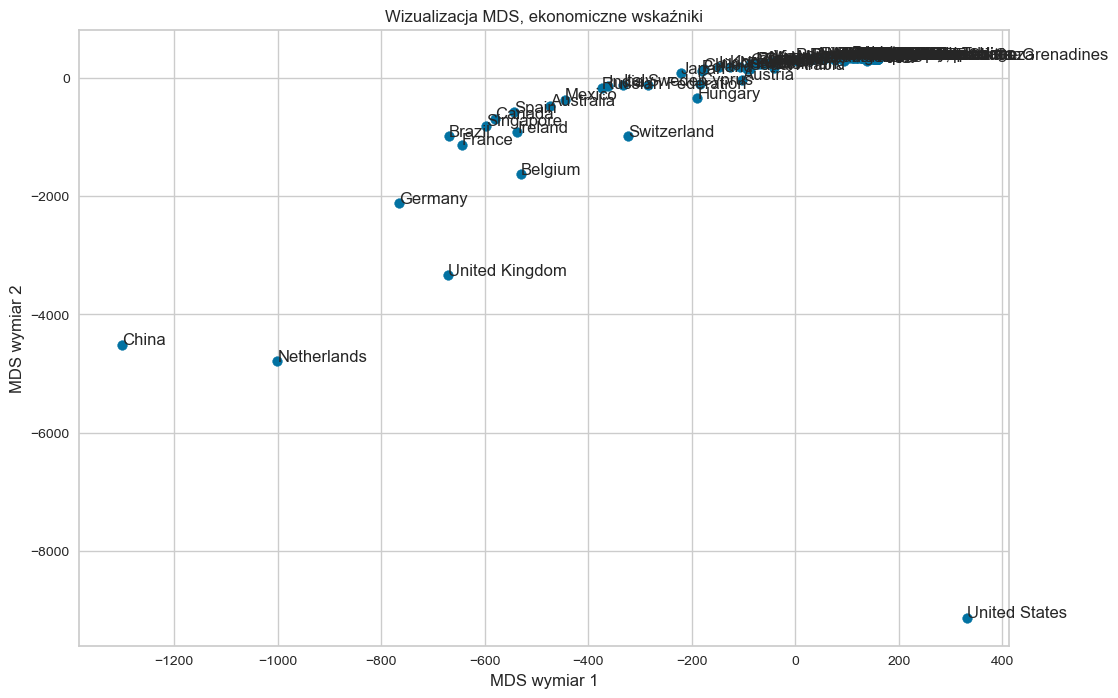

In [109]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x_coords, y_coords)

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (x_coords[i], y_coords[i]))

plt.xlabel('MDS wymiar 1')
plt.ylabel('MDS wymiar 2')
plt.title('Wizualizacja MDS, ekonomiczne wskaźniki')

plt.show()


### Wskaźniki zdrowotne

In [110]:
distances = np.zeros((num_countries, num_countries))

# Perform DTW on all pairs of time series
for i, c1 in enumerate(countries):
    ts1 = df_scaled.loc[(c1, health_indicators),:].values.T
    for j, c2 in enumerate(countries):
        ts2 = df_scaled.loc[(c2, health_indicators),:].values.T
        d, _ = fastdtw(ts1, ts2, dist=euclidean)
        distances[i, j] = d
        distances[j, i] = d

In [111]:
# Create an instance of MDS
mds = MDS(n_components=2, random_state=0)

# Apply MDS to the distance matrix
embedding = mds.fit_transform(distances)

# The 'embedding' variable now contains the coordinates of each data point in the reduced 2D space

# Access the coordinates of the points
x_coords = embedding[:, 0]
y_coords = embedding[:, 1]


/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


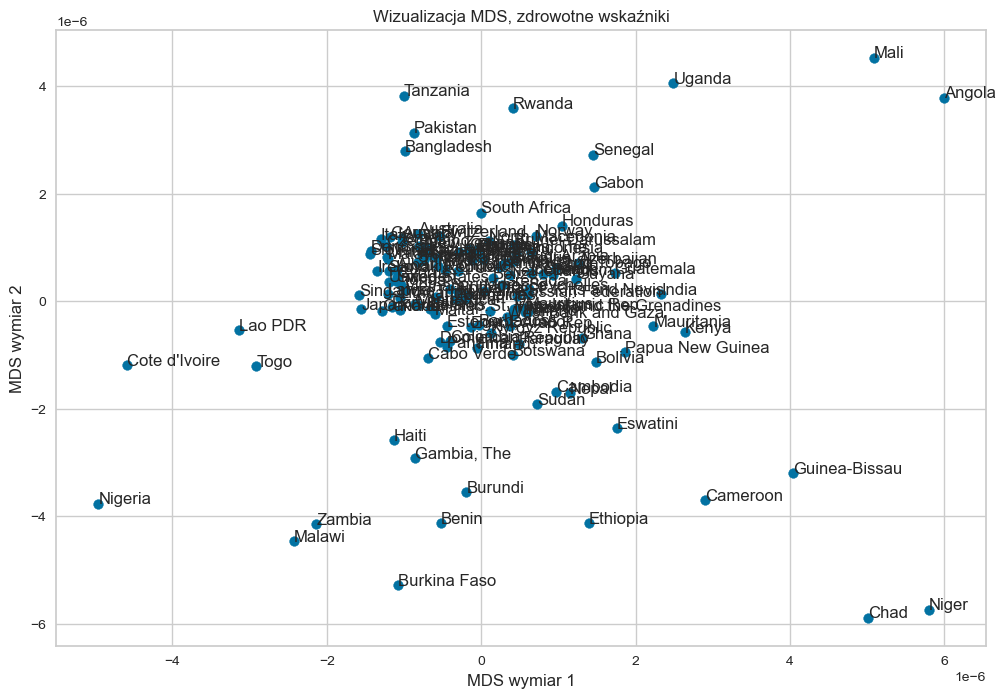

In [112]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x_coords, y_coords)

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (x_coords[i], y_coords[i]))

plt.xlabel('MDS wymiar 1')
plt.ylabel('MDS wymiar 2')
plt.title('Wizualizacja MDS, zdrowotne wskaźniki')

plt.show()

### Wskaźniki socjodemograficzne

In [113]:
distances = np.zeros((num_countries, num_countries))

# Perform DTW on all pairs of time series
for i, c1 in enumerate(countries):
    ts1 = df_scaled.loc[(c1, sociodemographic_indicators),:].values.T
    for j, c2 in enumerate(countries):
        ts2 = df_scaled.loc[(c2, sociodemographic_indicators),:].values.T
        d, _ = fastdtw(ts1, ts2, dist=euclidean)
        distances[i, j] = d
        distances[j, i] = d

In [114]:
# Create an instance of MDS
mds = MDS(n_components=2, random_state=0)

# Apply MDS to the distance matrix
embedding = mds.fit_transform(distances)

# The 'embedding' variable now contains the coordinates of each data point in the reduced 2D space

# Access the coordinates of the points
x_coords = embedding[:, 0]
y_coords = embedding[:, 1]


/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/agatadratwa/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


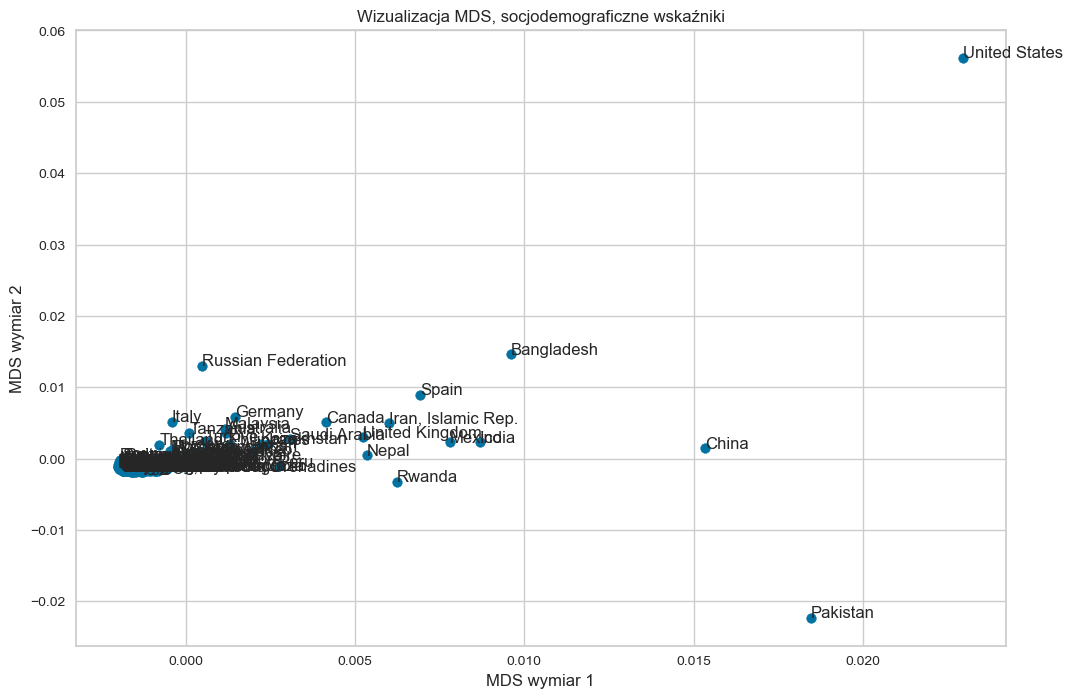

In [115]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x_coords, y_coords)

for i, txt in enumerate(countries_full_names):
  ax.annotate(txt, (x_coords[i], y_coords[i]))

plt.xlabel('MDS wymiar 1')
plt.ylabel('MDS wymiar 2')
plt.title('Wizualizacja MDS, socjodemograficzne wskaźniki')

plt.show()
